# Table of Contents

[Libraries](#Libraries) <br>
[Variables](#Variables)
1. [Data Import & Manipulation](#1.-Data-Import-&-Manipulation) 
    1. [Fuel Output & Demand Data](#A.-Fuel-Output-&-Demand-Data)
    2. [HOEP Data](#B.-HOEP-Data)
    3. [NG Production & Demand Data](#C.-NG-Production-&-Demand-Data)
    4. [Transportation Demand Data](#D.-Transportation-Demand-Data)
    5. [Industry Demand Data](#E.-Industry-Demand-Data)
    6. [Emission Factor Calculation](#F.-Emission-Factor-Calculation)
    7. [Input Data to MILP](#G.-Input-Data-to-MILP)
2. [Mixed Integer Linear Programming](#2.-Mixed-Integer-Linear-Programming)
    1. [RNG MILP](#A.-RNG-MILP)
    2. [HENG MILP](#B.-HENG-MILP)
    3. [Transportation MILP](#C.-Transportation-MILP)
    4. [Industry MILP](#D.-Industry-MILP)
    5. [Combined MILP](#E.-Combined-MILP)
3. [Results](#3.-Results)
    1. [Individual Result](#A.-Individual-Result)
    2. [Combined Result](#B.-Combined-Result)


# Libraries

In [1]:
import pandas as pd

# Variables 

Import the csv file with variables 

In [2]:
raw=pd.read_csv('Variables.csv')
raw2=raw.dropna(axis='columns',how='all')
var=raw2.dropna(axis='rows',how='all')
var.set_index("variable_name",inplace=True)

In [3]:
var

,value,unit,source,comment
variable_name,,,,
MW_H2,1.008000e+00,kg/kmol,internet,NaN
density_H2,8.990000e-02,kg/m^3,ushnik,NaN
electrolyzer_eff,7.667000e-01,dimensionless,eqtn 3.1,NaN
E_hhv_h2,3.550000e+00,kWh/m^3 H2,eqtn 3.1,NaN
E_rated_h2,4.630000e+00,kWh/m^3 H2,eqtn 3.1,NaN
min_E_cap,0.000000e+00,kWh,eqtn 3.3,NaN
max_E_cap,1.000000e+03,kWh,eqtn 3.3,NaN
water_cons_rate,4.000000e-01,L H2O/m^3 H2,eqtn 3.4,NaN
meth_reactor_eff,7.700000e-01,dimensionless,eqtn 3.13,NaN


# 1. Data Import & Manipuation

## A. Fuel Output & Demand Data

Import the fuel output data by sources (i.e. nuclear, gas, hydro)

In [4]:
fuel_output = pd.read_csv('on_fuel_source_output_2017.csv', keep_default_na=False, na_values=[""])

In [5]:
fuel_output.head()

,Date,Hour,Fuel,Output
0,2017-01-01,1,NUCLEAR,11592
1,2017-01-01,1,GAS,234
2,2017-01-01,1,HYDRO,2455
3,2017-01-01,1,WIND,2433
4,2017-01-01,1,SOLAR,0


Impor the fuel demand in Onatrio data 

In [6]:
fuel_demand = pd.read_csv('on_demand_2017.csv', keep_default_na=False, na_values=[""])

Subtract 1 hour from the hour because we want 0 to 23 hr 

In [7]:
fuel_output['Hour'] = fuel_output['Hour'] - 1

In [8]:
fuel_output.head()

,Date,Hour,Fuel,Output
0,2017-01-01,0,NUCLEAR,11592
1,2017-01-01,0,GAS,234
2,2017-01-01,0,HYDRO,2455
3,2017-01-01,0,WIND,2433
4,2017-01-01,0,SOLAR,0


In [9]:
fuel_demand['Hour'] = fuel_demand['Hour'] -1

In [10]:
fuel_demand.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2017-01-01,0,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
1,2017-01-01,1,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2,2017-01-01,2,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"
3,2017-01-01,3,12605,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,186"
4,2017-01-01,4,12563,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,227"


Create Datetime columns in both dataframes

In [11]:
fuel_output['Datetime'] = pd.to_datetime(fuel_output['Date']) + pd.to_timedelta(fuel_output['Hour'], unit='h')

In [12]:
fuel_output.head(15)

,Date,Hour,Fuel,Output,Datetime
0,2017-01-01,0,NUCLEAR,11592,2017-01-01 00:00:00
1,2017-01-01,0,GAS,234,2017-01-01 00:00:00
2,2017-01-01,0,HYDRO,2455,2017-01-01 00:00:00
3,2017-01-01,0,WIND,2433,2017-01-01 00:00:00
4,2017-01-01,0,SOLAR,0,2017-01-01 00:00:00
5,2017-01-01,0,BIOFUEL,1,2017-01-01 00:00:00
6,2017-01-01,1,NUCLEAR,11591,2017-01-01 01:00:00
7,2017-01-01,1,GAS,235,2017-01-01 01:00:00
8,2017-01-01,1,HYDRO,2523,2017-01-01 01:00:00
9,2017-01-01,1,WIND,1994,2017-01-01 01:00:00


In [13]:
fuel_demand['Datetime'] = pd.to_datetime(fuel_demand['Date']) + pd.to_timedelta(fuel_demand['Hour'], unit='h')

In [14]:
fuel_demand.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Datetime
0,2017-01-01,0,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268",2017-01-01 00:00:00
1,2017-01-01,1,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673",2017-01-01 01:00:00
2,2017-01-01,2,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974",2017-01-01 02:00:00
3,2017-01-01,3,12605,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,186",2017-01-01 03:00:00
4,2017-01-01,4,12563,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,227",2017-01-01 04:00:00


Groupby the fuel data dataframe by Datetime

In [15]:
fuel_output_total = pd.DataFrame(fuel_output.groupby('Datetime')['Output'].sum())
fuel_output_total.columns = ['fuel_total']

In [16]:
fuel_output_total.head()

,fuel_total
Datetime,
2017-01-01 00:00:00,16715
2017-01-01 01:00:00,16344
2017-01-01 02:00:00,15942
2017-01-01 03:00:00,15727
2017-01-01 04:00:00,15653


Set index of the demand dataframe using Datetime

In [17]:
fuel_demand.set_index('Datetime',inplace=True)

In [18]:
fuel_demand.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
Datetime,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01,0,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
2017-01-01 01:00:00,2017-01-01,1,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2017-01-01 02:00:00,2017-01-01,2,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"
2017-01-01 03:00:00,2017-01-01,3,12605,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,186"
2017-01-01 04:00:00,2017-01-01,4,12563,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"3,227"


Create SBG data by joining the two data demand and output data and taking the difference between the two 

In [19]:
SBG = pd.merge(fuel_output_total[['fuel_total']],fuel_demand[['Ontario Demand']], how='inner',left_index=True, right_index=True)

In [20]:
SBG.head()

,fuel_total,Ontario Demand
Datetime,,
2017-01-01 00:00:00,16715,13522
2017-01-01 01:00:00,16344,13117
2017-01-01 02:00:00,15942,12816
2017-01-01 03:00:00,15727,12605
2017-01-01 04:00:00,15653,12563


In [21]:
SBG['Difference'] = SBG['fuel_total'] - SBG['Ontario Demand']

In [22]:
SBG.tail()

,fuel_total,Ontario Demand,Difference
Datetime,,,
2017-12-31 19:00:00,21032,18706,2326
2017-12-31 20:00:00,20692,18284,2408
2017-12-31 21:00:00,20142,17772,2370
2017-12-31 22:00:00,19475,17228,2247
2017-12-31 23:00:00,18997,16842,2155


Check if there's any cell with difference less than 0

In [23]:
SBG[SBG['Difference']<0].count()

fuel_total        697
Ontario Demand    697
Difference        697
dtype: int64

Assign negative numbers with 0's 

In [24]:
SBG.loc[SBG['Difference']<=0,'Difference'] = 0

In [25]:
SBG[SBG['Difference']<0].count()

fuel_total        0
Ontario Demand    0
Difference        0
dtype: int64

Convert SBG from MWh to kWh

In [26]:
SBG['Difference'] = SBG['Difference']*1000

Change the column names of the SBG dataframe 

In [27]:
SBG.columns = ['fuel_output','fuel_demand','SBG(kWh)']

In [28]:
SBG.head()

,fuel_output,fuel_demand,SBG(kWh)
Datetime,,,
2017-01-01 00:00:00,16715,13522,3193000
2017-01-01 01:00:00,16344,13117,3227000
2017-01-01 02:00:00,15942,12816,3126000
2017-01-01 03:00:00,15727,12605,3122000
2017-01-01 04:00:00,15653,12563,3090000


## B. HOEP Data

Import the HOEP data <br>
Note: HOEP values are reported as $/MWh

In [29]:
hoep_data = pd.read_csv('HOEP_2017.csv', keep_default_na=False, na_values=[""])

In [30]:
hoep_data.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
0,2017-01-01,1,0.0,5.94,0.0,0.0,NaN,NaN,NaN
1,2017-01-01,2,0.0,0.00,2.2,0.0,NaN,NaN,NaN
2,2017-01-01,3,0.0,0.00,0.0,0.0,NaN,NaN,NaN
3,2017-01-01,4,0.0,0.00,0.0,0.0,NaN,NaN,NaN
4,2017-01-01,5,0.0,0.00,0.0,0.0,NaN,NaN,NaN


Change the hour to hour-1

In [31]:
hoep_data['Hour'] = hoep_data['Hour'] -1

Create datetime column

In [32]:
hoep_data['Datetime'] = pd.to_datetime(hoep_data['Date']) + pd.to_timedelta(hoep_data['Hour'], unit='h')

In [33]:
hoep_data.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min,Datetime
0,2017-01-01,0,0.0,5.94,0.0,0.0,NaN,NaN,NaN,2017-01-01 00:00:00
1,2017-01-01,1,0.0,0.00,2.2,0.0,NaN,NaN,NaN,2017-01-01 01:00:00
2,2017-01-01,2,0.0,0.00,0.0,0.0,NaN,NaN,NaN,2017-01-01 02:00:00
3,2017-01-01,3,0.0,0.00,0.0,0.0,NaN,NaN,NaN,2017-01-01 03:00:00
4,2017-01-01,4,0.0,0.00,0.0,0.0,NaN,NaN,NaN,2017-01-01 04:00:00


Set the index of the hoep data using the datetime

In [34]:
hoep_data.set_index('Datetime',inplace=True)

In [35]:
hoep_data.head(10)

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
Datetime,,,,,,,,,
2017-01-01 00:00:00,2017-01-01,0,0.00,5.94,0.00,0.00,NaN,NaN,NaN
2017-01-01 01:00:00,2017-01-01,1,0.00,0.00,2.20,0.00,NaN,NaN,NaN
2017-01-01 02:00:00,2017-01-01,2,0.00,0.00,0.00,0.00,NaN,NaN,NaN
2017-01-01 03:00:00,2017-01-01,3,0.00,0.00,0.00,0.00,NaN,NaN,NaN
2017-01-01 04:00:00,2017-01-01,4,0.00,0.00,0.00,0.00,NaN,NaN,NaN
2017-01-01 05:00:00,2017-01-01,5,0.00,0.01,0.00,1.99,NaN,NaN,NaN
2017-01-01 06:00:00,2017-01-01,6,0.00,5.94,6.04,6.02,NaN,NaN,NaN
2017-01-01 07:00:00,2017-01-01,7,1.71,6.74,8.42,6.74,NaN,NaN,NaN
2017-01-01 08:00:00,2017-01-01,8,0.00,5.74,5.70,5.84,NaN,NaN,NaN


HOEP data is dollar/Mwh so need to convert to dollar/kWh

In [36]:
hoep_data['HOEP']= hoep_data['HOEP']/1000

Merge the SBG data and HOEP data

In [37]:
input_df = pd.merge(SBG[['SBG(kWh)']],hoep_data[['HOEP']], how='inner',left_index=True, right_index=True)

In [38]:
input_df

,SBG(kWh),HOEP
Datetime,,
2017-01-01 00:00:00,3193000,0.00000
2017-01-01 01:00:00,3227000,0.00000
2017-01-01 02:00:00,3126000,0.00000
2017-01-01 03:00:00,3122000,0.00000
2017-01-01 04:00:00,3090000,0.00000
2017-01-01 05:00:00,2898000,0.00000
2017-01-01 06:00:00,2739000,0.00000
2017-01-01 07:00:00,2726000,0.00171
2017-01-01 08:00:00,2267000,0.00000


## C. NG Production & Demand Data

Import the NG hourly distribution data

In [39]:
NG_hourly_distribution = pd.read_csv('NG_hourly_distribution.csv')

In [40]:
NG_hourly_distribution.head(24)

,hour,hourly_distribution
0,1,105
1,2,100
2,3,95
3,4,95
4,5,100
5,6,110
6,7,140
7,8,145
8,9,125
9,10,120


Calculate the ratio of the distribution each hour using hourly distribution divided by the sum of the hourly distribution 

In [41]:
NG_hourly_distribution['ratio'] = NG_hourly_distribution['hourly_distribution']/sum(NG_hourly_distribution['hourly_distribution'])

In [42]:
NG_hourly_distribution

,hour,hourly_distribution,ratio
0,1,105,0.033113
1,2,100,0.031536
2,3,95,0.029959
3,4,95,0.029959
4,5,100,0.031536
5,6,110,0.034689
6,7,140,0.044150
7,8,145,0.045727
8,9,125,0.039420
9,10,120,0.037843


Substract 1 from the hour

In [43]:
NG_hourly_distribution['hour'] = NG_hourly_distribution['hour']-1

Import the NG monthly production data (the data itself is average daily production in each month; obtained from Statistics Canada)

In [44]:
NG_monthly_production = pd.read_csv('NG_monthly_production.csv')

In [45]:
NG_monthly_production

,month,NG_production(e3m3/d)
0,1,199.481446
1,2,220.179477
2,3,198.975008
3,4,199.277688
4,5,199.023394
5,6,198.671039
6,7,198.871786
7,8,198.365348
8,9,258.955997
9,10,261.618395


Create NG demand column in the input_df

In [46]:
input_df['NG_demand(m^3)'] = 0
input_df['NG_demand(m^3)'] = input_df['NG_demand(m^3)'].astype(float)
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3)
Datetime,,,
2017-01-01 00:00:00,3193000,0.0,0.0
2017-01-01 01:00:00,3227000,0.0,0.0
2017-01-01 02:00:00,3126000,0.0,0.0
2017-01-01 03:00:00,3122000,0.0,0.0
2017-01-01 04:00:00,3090000,0.0,0.0


NG demand calculation: hourly NG demand = ratio at that hour * production in that month

In [47]:
for index, row in input_df.iterrows():
   
    curr_hour = index.hour
    curr_month = index.month 
    ratio = NG_hourly_distribution[NG_hourly_distribution['hour']==curr_hour]['ratio'].iloc[0]
    NG_prod = NG_monthly_production[NG_monthly_production['month']==curr_month]['NG_production(e3m3/d)'].iloc[0]
  
    input_df.loc[index,'NG_demand(m^3)'] = (ratio * NG_prod)*1000
    

In [48]:
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3)
Datetime,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885
2017-01-01 01:00:00,3227000,0.0,6290.805605
2017-01-01 02:00:00,3126000,0.0,5976.265325
2017-01-01 03:00:00,3122000,0.0,5976.265325
2017-01-01 04:00:00,3090000,0.0,6290.805605


## D. Transportation Demand Data

Import the mobility demand data 

In [49]:
mobility_hourly_distribution = pd.read_csv('mobility_hourly_distribution.csv')

In [50]:
mobility_hourly_distribution.head()

,hour,% of daily demand
0,1,1.05
1,2,0.80
2,3,0.70
3,4,0.40
4,5,0.90


Change the hour to hour-1

In [51]:
mobility_hourly_distribution['hour'] = mobility_hourly_distribution['hour'] -1

In [52]:
mobility_hourly_distribution

,hour,% of daily demand
0,0,1.05
1,1,0.80
2,2,0.70
3,3,0.40
4,4,0.90
5,5,1.10
6,6,2.05
7,7,3.05
8,8,4.05
9,9,5.60


mobility monthly hour distribution = mobility hourly distribution * 264000 kg demand * 1m^3/0.0899kg H2 

In [53]:
mobility_hourly_distribution['demand(m^3)'] = mobility_hourly_distribution['% of daily demand'] / 100 * 264000 /0.0899

In [54]:
mobility_hourly_distribution.head()

,hour,% of daily demand,demand(m^3)
0,0,1.05,30834.260289
1,1,0.80,23492.769744
2,2,0.70,20556.173526
3,3,0.40,11746.384872
4,4,0.90,26429.365962


Weekly profile according to the mobility Excel workbook

In [55]:
# weekday number 6= Sunday, 0 = Monday,... 5 = Saturday 
week_profile_dict = {'weekday': [6,0,1,2,3,4,5],
         'factor': [101,94,96,100,105,108,96]}

week_profile_df = pd.DataFrame.from_dict(week_profile_dict)

week_profile_df['factor_fraction'] = week_profile_df['factor']/100
week_profile_df

,factor,weekday,factor_fraction
0,101,6,1.01
1,94,0,0.94
2,96,1,0.96
3,100,2,1.00
4,105,3,1.05
5,108,4,1.08
6,96,5,0.96


Create mobility demand column in the input data

In [56]:
input_df['mobility_demand(m^3)'] = 0
input_df['mobility_demand(m^3)'] = input_df['mobility_demand(m^3)'].astype(float)
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3)
Datetime,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,0.0
2017-01-01 01:00:00,3227000,0.0,6290.805605,0.0
2017-01-01 02:00:00,3126000,0.0,5976.265325,0.0
2017-01-01 03:00:00,3122000,0.0,5976.265325,0.0
2017-01-01 04:00:00,3090000,0.0,6290.805605,0.0


Calculate mobility demand hourly profile = weekday factor * hourly mobility demand

In [57]:
for index, row in input_df.iterrows():
    curr_weekday = index.weekday()
    curr_hour = index.hour 
    week_factor = week_profile_df[week_profile_df['weekday']==curr_weekday]['factor_fraction'].iloc[0]
    mob_demand = mobility_hourly_distribution[mobility_hourly_distribution['hour']==curr_hour]['demand(m^3)'].iloc[0]
    input_df.loc[index,'mobility_demand(m^3)'] = mob_demand * week_factor 

In [58]:
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3)
Datetime,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,31142.602892
2017-01-01 01:00:00,3227000,0.0,6290.805605,23727.697442
2017-01-01 02:00:00,3126000,0.0,5976.265325,20761.735261
2017-01-01 03:00:00,3122000,0.0,5976.265325,11863.848721
2017-01-01 04:00:00,3090000,0.0,6290.805605,26693.659622


## E. Industry Demand Data

Total industry production capacity (e6m^3/day)

In [59]:
total_daily_production = 6.3 #e6m^3/day

Total yearly production

In [60]:
total_yearly_production = total_daily_production * 365

print(total_yearly_production)

2299.5


Industry monthly demand according to the paper = monthly demand hydrogen percetnage * total yearly production 

In [61]:
ind_demand_dic = {'month': [1,2,3,4,5,6,7,8,9,10,11,12],
         'monthly_demand_hydrogen[kg]': [3.2,2.7,2.4,2.1,2,1.8,1.7,2,2.1,2.7,3,3.3]
         }
monthly_hydrogen_demand = pd.DataFrame.from_dict(ind_demand_dic)
total_hydrogen_demand = monthly_hydrogen_demand['monthly_demand_hydrogen[kg]'].sum()
monthly_hydrogen_demand['percentage'] = monthly_hydrogen_demand['monthly_demand_hydrogen[kg]']/total_hydrogen_demand
monthly_hydrogen_demand['production_capacity[m^3/day]'] = total_yearly_production * monthly_hydrogen_demand['percentage'] * (10**6)
monthly_hydrogen_demand

,month,monthly_demand_hydrogen[kg],percentage,production_capacity[m^3/day]
0,1,3.2,0.110345,2.537379e+08
1,2,2.7,0.093103,2.140914e+08
2,3,2.4,0.082759,1.903034e+08
3,4,2.1,0.072414,1.665155e+08
4,5,2.0,0.068966,1.585862e+08
5,6,1.8,0.062069,1.427276e+08
6,7,1.7,0.058621,1.347983e+08
7,8,2.0,0.068966,1.585862e+08
8,9,2.1,0.072414,1.665155e+08
9,10,2.7,0.093103,2.140914e+08


Creating empty column in the input df for industry demand

In [62]:
input_df['industry_demand(m^3)'] = 0
input_df['industry_demand(m^3)'] = input_df['industry_demand(m^3)'].astype(float)
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3)
Datetime,,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,31142.602892,0.0
2017-01-01 01:00:00,3227000,0.0,6290.805605,23727.697442,0.0
2017-01-01 02:00:00,3126000,0.0,5976.265325,20761.735261,0.0
2017-01-01 03:00:00,3122000,0.0,5976.265325,11863.848721,0.0
2017-01-01 04:00:00,3090000,0.0,6290.805605,26693.659622,0.0


number of days in each month

In [63]:
num_days_dic = {'month': [1,2,3,4,5,6,7,8,9,10,11,12],
         'number_of_days': [31,28,31,30,31,30,31,31,30,31,30,31]}
num_days_df = pd.DataFrame.from_dict(num_days_dic)
num_days_df

,month,number_of_days
0,1,31
1,2,28
2,3,31
3,4,30
4,5,31
5,6,30
6,7,31
7,8,31
8,9,30
9,10,31


Create hourly profile for industry demand = monthly production capacity / number of days in the month * 24 hours in month * __0.05 (5% demand supply criteria)__

In [64]:
for index, row in input_df.iterrows():
    curr_month = index.month 
    num_days = num_days_df[num_days_df['month']==curr_month]['number_of_days'].iloc[0]
    ind_prod = monthly_hydrogen_demand[monthly_hydrogen_demand['month']==curr_month]['production_capacity[m^3/day]'].iloc[0]
    input_df.loc[index,'industry_demand(m^3)'] = ind_prod / (num_days * 24) * 0.05

In [65]:
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3)
Datetime,,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,31142.602892,17052.280311
2017-01-01 01:00:00,3227000,0.0,6290.805605,23727.697442,17052.280311
2017-01-01 02:00:00,3126000,0.0,5976.265325,20761.735261,17052.280311
2017-01-01 03:00:00,3122000,0.0,5976.265325,11863.848721,17052.280311
2017-01-01 04:00:00,3090000,0.0,6290.805605,26693.659622,17052.280311


## F. Emission Factor Calculation

Hourly average emission factor calculated using the fuel output 

In [66]:
#EMF(tonne/kWh)

emission_factor = fuel_output.copy()
emission_factor['Emission'] = 0
emission_factor['Emission'] = emission_factor['Emission'].astype(float)
emission_factor.head()


#all in kgCO2/MWh 
EMF_nuclear = 17 
EMF_gas = 622
EMF_hydro = 18
EMF_wind = 14
EMF_solar = 39
EMF_biofuel = 177


for index, row in emission_factor.iterrows():
    fuel_type = row['Fuel']
    
    if fuel_type == 'NUCLEAR':
        EMF = EMF_nuclear
    elif fuel_type == 'GAS':
        EMF = EMF_gas
    elif fuel_type == 'HYDRO':
        EMF = EMF_hydro
    elif fuel_type == 'BIOFUEL':
        EMF = EMF_biofuel
    elif fuel_type == 'SOLAR':
        EMF = EMF_solar
    else:
        EMF = EMF_wind
        
    emission_factor.loc[index,'Emission'] = EMF * emission_factor.loc[index,'Output']

emission_factor.head()

emission_factor_agg = pd.DataFrame(emission_factor.groupby('Datetime').agg({'Emission':'sum','Output':'sum'}))

emission_factor_agg['EMF(kgCO2/MWh)'] = emission_factor_agg['Emission'] / emission_factor_agg['Output'] 
emission_factor_agg['EMF(tonne/kWh)'] = emission_factor_agg['EMF(kgCO2/MWh)'] / 1000 / 1000 #unit conversion 1tonne/1000kg, 1MW/1000kW
emission_factor_agg.head()

,Emission,Output,EMF(kgCO2/MWh),EMF(tonne/kWh)
Datetime,,,,
2017-01-01 00:00:00,421041.0,16715,25.189411,0.000025
2017-01-01 01:00:00,416724.0,16344,25.497063,0.000025
2017-01-01 02:00:00,410267.0,15942,25.734977,0.000026
2017-01-01 03:00:00,408635.0,15727,25.983023,0.000026
2017-01-01 04:00:00,406922.0,15653,25.996422,0.000026


In [67]:
input_df = pd.merge(input_df,emission_factor_agg[['EMF(tonne/kWh)']], how='inner',left_index=True, right_index=True)
input_df.head()

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3),EMF(tonne/kWh)
Datetime,,,,,,
2017-01-01 00:00:00,3193000,0.0,6605.345885,31142.602892,17052.280311,0.000025
2017-01-01 01:00:00,3227000,0.0,6290.805605,23727.697442,17052.280311,0.000025
2017-01-01 02:00:00,3126000,0.0,5976.265325,20761.735261,17052.280311,0.000026
2017-01-01 03:00:00,3122000,0.0,5976.265325,11863.848721,17052.280311,0.000026
2017-01-01 04:00:00,3090000,0.0,6290.805605,26693.659622,17052.280311,0.000026


## G. Input Data to MILP

In [68]:
input_df.head(10)

,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3),EMF(tonne/kWh)
Datetime,,,,,,
2017-01-01 00:00:00,3193000,0.00000,6605.345885,31142.602892,17052.280311,0.000025
2017-01-01 01:00:00,3227000,0.00000,6290.805605,23727.697442,17052.280311,0.000025
2017-01-01 02:00:00,3126000,0.00000,5976.265325,20761.735261,17052.280311,0.000026
2017-01-01 03:00:00,3122000,0.00000,5976.265325,11863.848721,17052.280311,0.000026
2017-01-01 04:00:00,3090000,0.00000,6290.805605,26693.659622,17052.280311,0.000026
2017-01-01 05:00:00,2898000,0.00000,6919.886166,32625.583982,17052.280311,0.000026
2017-01-01 06:00:00,2739000,0.00000,8807.127847,60802.224694,17052.280311,0.000026
2017-01-01 07:00:00,2726000,0.00171,9121.668128,90461.846496,17052.280311,0.000026
2017-01-01 08:00:00,2267000,0.00000,7863.507007,120121.468298,17052.280311,0.000026


In [69]:
input_df.reset_index(inplace=True)
input_df.head(10)

,Datetime,SBG(kWh),HOEP,NG_demand(m^3),mobility_demand(m^3),industry_demand(m^3),EMF(tonne/kWh)
0,2017-01-01 00:00:00,3193000,0.00000,6605.345885,31142.602892,17052.280311,0.000025
1,2017-01-01 01:00:00,3227000,0.00000,6290.805605,23727.697442,17052.280311,0.000025
2,2017-01-01 02:00:00,3126000,0.00000,5976.265325,20761.735261,17052.280311,0.000026
3,2017-01-01 03:00:00,3122000,0.00000,5976.265325,11863.848721,17052.280311,0.000026
4,2017-01-01 04:00:00,3090000,0.00000,6290.805605,26693.659622,17052.280311,0.000026
5,2017-01-01 05:00:00,2898000,0.00000,6919.886166,32625.583982,17052.280311,0.000026
6,2017-01-01 06:00:00,2739000,0.00000,8807.127847,60802.224694,17052.280311,0.000026
7,2017-01-01 07:00:00,2726000,0.00171,9121.668128,90461.846496,17052.280311,0.000026
8,2017-01-01 08:00:00,2267000,0.00000,7863.507007,120121.468298,17052.280311,0.000026
9,2017-01-01 09:00:00,2324000,0.00000,7548.966726,166093.882091,17052.280311,0.000026


## Plot & Summary of Input Data

In [ ]:
#function for creating plot from df 
def create_plot_df(df,y_col,y_col_name =None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    df.reset_index()
    plt.figure(figsize=(20,10),dpi=300)
    plt.plot(df.index,df[y_col],color='C1')
    plt.xlabel('Hour',fontsize=15)
    if y_col_name is not None:
        plt.ylabel(y_col_name,fontsize=15)
        plt.tight_layout()
        plt.savefig(y_col_name+'.png',dpi=300)
    else:    
        plt.ylabel(y_col,fontsize=15)
        
#function for creating plot from df 
def create_plot_df_2(df,y_col,y_col_name =None,color_str=None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    df.reset_index()
    plt.figure(figsize=(10,10))
    if color_str is not None:
    
        plt.plot(df.index,df[y_col],color=color_str)
    else:
        plt.plot(df.index,df[y_col])
    plt.xlabel('Hour',fontsize=50)

    plt.xticks([])
    plt.yticks([])
    if y_col_name is not None:
        plt.title(y_col_name,fontsize=50,y=1.05)
        plt.tight_layout()
        if '/' in y_col_name:
            plt.savefig(y_col_name.replace('/',"_")+'.png',dpi=600)
        else:
            plt.savefig(y_col_name+'.png',dpi=600)
    else:    
        plt.ylabel(y_col,fontsize=15)
        
        
        
def create_summary_df(df,col_name=None):
    
    if col_name is not None:
        df_sum = df[[col_name]].sum()[0]
        df_mean = df[[col_name]].mean()[0]
        df_min = df[[col_name]].min()[0]
        df_max = df[[col_name]].max()[0]
        
        new_list = [df_sum, df_mean, df_min, df_max]
        index_list = ['sum','mean','min','max']
        
        d = {col_name: new_list}
        new_df = pd.DataFrame(data=d,index = index_list)
        
        display(new_df)
        
        
def create_summary_all(df,start_col):
    for i in range(start_col,len(df.columns.tolist())):
        df_sum = df.iloc[:,i].sum()
        df_mean = df.iloc[:,i].mean()
        df_min = df.iloc[:,i].min()
        df_max = df.iloc[:,i].max()
        
        new_list = [df_sum, df_mean, df_min, df_max]
        index_list = ['sum','mean','min','max'] 
        
        d = {df.columns[i]: new_list}
        new_df = pd.DataFrame(data=d,index = index_list)
        
        if i == start_col:
            temp_df = new_df
            
        else:
            temp_df = pd.concat([temp_df, new_df], axis=1)
            
            
    display(temp_df)        
    return temp_df


In [ ]:
summarydf = create_summary_all(input_df,1)
summarydf.to_clipboard(excel=True)

In [ ]:
create_plot_df_2(input_df,'SBG(kWh)',y_col_name='Surplus Electricity (kWh)',color_str='C1')

In [ ]:
create_plot_df_2(input_df,'HOEP',y_col_name='Electricity Price ($/kWh)',color_str='C4')

In [ ]:
create_plot_df(input_df,'mobility_demand(m^3)')

In [ ]:
create_plot_df(input_df,'industry_demand(m^3)')

In [ ]:
create_plot_df(input_df,'NG_demand(m^3)')

# 2. Mixed Integer Linear Programming

Numbering variables 
<br>
1. RNG <br>
2. HENG <br>
3. Transportation <br>
4. Industry

## A. RNG MILP

# Equality

In [ ]:
"""
Model for RNG/NG
"""


'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)'])
D = list(input_df['NG_demand(m^3)'])
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Fixed constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2']
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2']
HHV_NG = var['value']['HHV_NG']

CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)

E_electrolyzer_min = var['value']['min_E_cap']
E_electrolyzer_max = var['value']['max_E_cap']
tau = 0.50

EMF_NG = var['value']['EMF_NG']
EMF_comb = var['value']['EMF_combRNG']
EMF_nuc = var['value']['EMF_nuclear']
EMF_bio = var['value']['EMF_bioCO2']
EMF_electrolyzer = var['value']['EMF_electrolyzer']
EMF_reactor = var['value']['EMF_reactor']

beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k']
C_upgrading = var['value']['C_upgrading']
C_CO2 = var['value']['C_CO2']
TC = var['value']['TC']
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
OPEX_upgrading = var['value']['OPEX_upgrading']
TVM = var['value']['TVM']

# Tank and compressor constants
Imax = var['value']['Imax'] # kmol
Imin= var['value']['Imin'] # kmol
Fmax_booster = var['value']['Fmax_booster'] # kmol
Fmax_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2


# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
Imax = Imax * MW_H2 / density_H2 # m^3
Imin = Imin * MW_H2 / density_H2 # m^3
Fmax_prestorage = Fmax_prestorage * MW_H2 / density_H2 # m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3


# RNG model
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
N_electrolyzer_1 = pulp.LpVariable('N_electrolyzer_1',
                          lowBound=0,
                          cat='Integer')
alpha_1 = pulp.LpVariable.dicts('alpha_1',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')

E_1 = pulp.LpVariable.dicts('E_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
CO2 = pulp.LpVariable.dicts('CO2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
NG_1 = pulp.LpVariable.dicts('NG_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

em_offset_1 = pulp.LpVariable('em_offset_1',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

CAPEX_1 = pulp.LpVariable('CAPEX_1', lowBound=0, cat='Continuous')
OPEX_1 = pulp.LpVariable('OPEX_1', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E_1[h] * E_HHV_H2 ** (-1)
        LP += RNG[h] == nu_reactor * (H2_direct[h] + H2_tank_out[h]) * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == Imin * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= Imax * N_tank
        LP += I_H2[h] >= Imin * N_tank

        # Demand constraint
        LP += NG_1[h] == D[i] - RNG[h]

        # Electrolyzer and reactor constraints
        LP += N_electrolyzer_1 * E_electrolyzer_min <= E_1[h]
        LP += N_electrolyzer_1 * E_electrolyzer_max >= E_1[h]
        LP += E_1[h] <= SBG[i]
        LP += 0.90 * RNG[h] == 0.10 * NG_1[h]
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]
        if h == '0':
            LP += pulp.lpSum(n * alpha_1[str(n)] for n in range(1, N_max)) == N_electrolyzer_1
            LP += pulp.lpSum(alpha_1) <= 1

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * Fmax_prestorage

    # Emission constraints
    LP += pulp.lpSum(EMF_NG * NG_1[h] + EMF_comb * RNG[h] + EMF[int(h)] * E_1[h] + \
                       EMF_bio * CO2[h] + EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) + EMF_reactor * RNG[h] + \
                       EMF[int(h)] * ECF_prestorage * H2_tank_in[h] for h in [str(x) for x in input_df.index]) \
        == em_rng
    LP += pulp.lpSum(EMF_NG * D[h] for h in input_df.index) == em_ng

# Eps Objective
LP_eps += em_ng - em_rng, 'Offset_1'
print('eps start')
LP_eps.solve()
offset_max_1 = LP_eps.objective.value()
print(LP_eps.status)

# CAPEX
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha_1[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) + \
           gamma * RNG_max + k + C_upgrading * RNG_max + (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 \
    == CAPEX_1

# OPEX
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           pulp.lpSum(E_1[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)])* (HOEP[n] + TC) for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_1

# Objectives
##################
phi = 0.5
#################

LP_cost += em_ng - em_rng == em_offset_1
LP_cost += em_offset_1 >= phi * offset_max_1
LP_cost += CAPEX_1 + OPEX_1 * TVM == total_cost

LP_cost += total_cost, 'Cost_1'


print('cost start')
LP_cost.solve()



end_time = time.time()

#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)


my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max_1} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'RNG_result_eq_' + str(phi)
export_to_csv(my_result, filename)



In [ ]:
"""
Model for RNG/NG
"""


'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)'])
D = list(input_df['NG_demand(m^3)'])
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Fixed constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2']
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2']
HHV_NG = var['value']['HHV_NG']

CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)

E_electrolyzer_min = var['value']['min_E_cap']
E_electrolyzer_max = var['value']['max_E_cap']
tau = 0.50

EMF_NG = var['value']['EMF_NG']
EMF_comb = var['value']['EMF_combRNG']
EMF_nuc = var['value']['EMF_nuclear']
EMF_bio = var['value']['EMF_bioCO2']
EMF_electrolyzer = var['value']['EMF_electrolyzer']
EMF_reactor = var['value']['EMF_reactor']

beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k']
C_upgrading = var['value']['C_upgrading']
C_CO2 = var['value']['C_CO2']
TC = var['value']['TC']
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
OPEX_upgrading = var['value']['OPEX_upgrading']
TVM = var['value']['TVM']

# Tank and compressor constants
Imax = var['value']['Imax'] # kmol
Imin= var['value']['Imin'] # kmol
Fmax_booster = var['value']['Fmax_booster'] # kmol
Fmax_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2


# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
Imax = Imax * MW_H2 / density_H2 # m^3
Imin = Imin * MW_H2 / density_H2 # m^3
Fmax_prestorage = Fmax_prestorage * MW_H2 / density_H2 # m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3


# RNG model
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)


RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
N_electrolyzer_1 = pulp.LpVariable('N_electrolyzer_1',
                          lowBound=0,
                          cat='Integer')
alpha_1 = pulp.LpVariable.dicts('alpha_1',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')

E_1 = pulp.LpVariable.dicts('E_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
CO2 = pulp.LpVariable.dicts('CO2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
NG_1 = pulp.LpVariable.dicts('NG_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

em_offset_1 = pulp.LpVariable('em_offset_1',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

CAPEX_1 = pulp.LpVariable('CAPEX_1', lowBound=0, cat='Continuous')
OPEX_1 = pulp.LpVariable('OPEX_1', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E_1[h] * E_HHV_H2 ** (-1)
        LP += RNG[h] == nu_reactor * (H2_direct[h] + H2_tank_out[h]) * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == Imin * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= Imax * N_tank
        LP += I_H2[h] >= Imin * N_tank

        # Demand constraint
        LP += NG_1[h] == D[i] - RNG[h]

        # Electrolyzer and reactor constraints
        LP += N_electrolyzer_1 * E_electrolyzer_min <= E_1[h]
        LP += N_electrolyzer_1 * E_electrolyzer_max >= E_1[h]
        LP += E_1[h] <= SBG[i]
        LP += 0.90 * RNG[h] == 0.10 * NG_1[h]
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]
        if h == '0':
            LP += pulp.lpSum(n * alpha_1[str(n)] for n in range(1, N_max)) == N_electrolyzer_1
            LP += pulp.lpSum(alpha_1) <= 1
            
        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * Fmax_prestorage

    # Emission constraints
    LP += pulp.lpSum(EMF_NG * NG_1[h] + EMF_comb * RNG[h] + EMF[int(h)] * E_1[h] + \
                       EMF_bio * CO2[h] + EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) + EMF_reactor * RNG[h] + \
                       EMF[int(h)] * ECF_prestorage * H2_tank_in[h] for h in [str(x) for x in input_df.index]) \
        == em_rng
    LP += pulp.lpSum(EMF_NG * D[h] for h in input_df.index) == em_ng



# CAPEX
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_eps += pulp.lpSum(alpha_1[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) + \
           gamma * RNG_max + k + C_upgrading * RNG_max + (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 \
    == CAPEX_1

# OPEX
LP_eps += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           pulp.lpSum(E_1[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)])* (HOEP[n] + TC) for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_1

# Objectives
##################
phi = 1.0
#################


LP_eps += CAPEX_1 + OPEX_1 * TVM == total_cost


# Eps Objective
LP_eps += em_ng - em_rng, 'Offset_1'






print('eps start')
LP_eps.solve()



end_time = time.time()

#time difference
time_difference = end_time - start_time

offset_max_1 = LP_eps.objective.value()

print(time_difference)
print(LP_eps.status)
print(phi)



my_result = create_var_df(LP_eps)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max_1} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'RNG_result_eq_' + str(phi)
export_to_csv(my_result, filename)



## B. HENG MILP

# Equality

In [ ]:
"""
Model for HENG
"""

import pulp
import pandas as pd
import time

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)'])
D = list(input_df['NG_demand(m^3)'])
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Fixed constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2']
E_electrolyzer_min = var['value']['min_E_cap']
E_electrolyzer_max = var['value']['max_E_cap']

EMF_NG = var['value']['EMF_NG']
EMF_nuc = var['value']['EMF_nuclear']
EMF_electrolyzer = var['value']['EMF_electrolyzer']

beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k']
TC = var['value']['TC']
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
TVM = var['value']['TVM']

# Tank and compressor constants
Imax = var['value']['Imax'] # kmol
Imin= var['value']['Imin'] # kmol
Fmax_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2



# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
Imax = Imax * MW_H2 / density_H2 # m^3
Imin = Imin * MW_H2 / density_H2 # m^3
Fmax_prestorage = Fmax_prestorage * MW_H2 / density_H2 # m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3



# HENG model
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)
N_electrolyzer_2 = pulp.LpVariable('N_electrolyzer_2',
                          lowBound=0,
                          cat='Integer')
alpha_2 = pulp.LpVariable.dicts('alpha_2',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
E_2 = pulp.LpVariable.dicts('E_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
CO2 = pulp.LpVariable.dicts('CO2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
NG_2 = pulp.LpVariable.dicts('NG_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

em_offset_2 = pulp.LpVariable('em_offset_2',
                          lowBound=0,
                          cat='Continuous')
em_heng = pulp.LpVariable('em_heng',
                          lowBound=0,
                          cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')

# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

CAPEX_2 = pulp.LpVariable('CAPEX_2', lowBound=0, cat='Continuous')
OPEX_2 = pulp.LpVariable('OPEX_2', lowBound=0, cat='Continuous')
# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E_2[h] * E_HHV_H2 ** (-1)

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == Imin * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= Imax * N_tank
        LP += I_H2[h] >= Imin * N_tank

        # Demand constraint
        LP += NG_2[h] + H2_direct[h] + H2_tank_out[h] == D[i]

        # NG and Electrolyzer constraints
        LP += 0.95 * (H2_direct[h] + H2_tank_out[h]) == 0.05 * NG_2[h]
        LP += N_electrolyzer_2 * E_electrolyzer_min <= E_2[h]
        LP += N_electrolyzer_2 * E_electrolyzer_max >= E_2[h]
        LP += E_2[h] <= SBG[i]
        if h == '0':
            LP += pulp.lpSum(n * alpha_2[str(n)] for n in range(1, N_max)) == N_electrolyzer_2
            LP += pulp.lpSum(alpha_2) <= 1

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * Fmax_prestorage
    # Emission constraints
    LP += pulp.lpSum(EMF_NG * NG_2[h] + EMF[int(h)] * E_2[h] + EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) + \
          pulp.lpSum(EMF[int(h)] * ECF_prestorage * H2_tank_in[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * D[h] for h in input_df.index) == em_ng

# Eps Objective
LP_eps += em_ng - em_heng, 'Offset_2'
print('eps start')
LP_eps.solve()
offset_max_2 = LP_eps.objective.value()
print(LP_eps.status)

# CAPEX
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha_2[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) + \
           (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_2

# OPEX
LP_cost += pulp.lpSum(E_2[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)])* (HOEP[n] + TC) for n in input_df.index) == OPEX_2

# Objectives

################
phi = 0.5

#################
LP_cost += em_ng - em_heng == em_offset_2
LP_cost += em_offset_2 >= phi * offset_max_2
LP_cost += CAPEX_2 + OPEX_2 * TVM == total_cost
LP_cost += total_cost,'Cost_2'



print('cost start')
LP_cost.solve()



end_time = time.time()

#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)




my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max_2} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'HENG_result_eq_' + str(phi)
export_to_csv(my_result, filename)


In [ ]:
"""
Model for HENG
"""

import pulp
import pandas as pd
import time

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)'])
D = list(input_df['NG_demand(m^3)'])
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Fixed constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2']
E_electrolyzer_min = var['value']['min_E_cap']
E_electrolyzer_max = var['value']['max_E_cap']

EMF_NG = var['value']['EMF_NG']
EMF_nuc = var['value']['EMF_nuclear']
EMF_electrolyzer = var['value']['EMF_electrolyzer']

beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k']
TC = var['value']['TC']
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
TVM = var['value']['TVM']

# Tank and compressor constants
Imax = var['value']['Imax'] # kmol
Imin= var['value']['Imin'] # kmol
Fmax_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2



# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
Imax = Imax * MW_H2 / density_H2 # m^3
Imin = Imin * MW_H2 / density_H2 # m^3
Fmax_prestorage = Fmax_prestorage * MW_H2 / density_H2 # m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3



# HENG model
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)
N_electrolyzer_2 = pulp.LpVariable('N_electrolyzer_2',
                          lowBound=0,
                          cat='Integer')
alpha_2 = pulp.LpVariable.dicts('alpha_2',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
E_2 = pulp.LpVariable.dicts('E_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
CO2 = pulp.LpVariable.dicts('CO2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
NG_2 = pulp.LpVariable.dicts('NG_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

em_offset_2 = pulp.LpVariable('em_offset_2',
                          lowBound=0,
                          cat='Continuous')
em_heng = pulp.LpVariable('em_heng',
                          lowBound=0,
                          cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')

# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

CAPEX_2 = pulp.LpVariable('CAPEX_2', lowBound=0, cat='Continuous')
OPEX_2 = pulp.LpVariable('OPEX_2', lowBound=0, cat='Continuous')
# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E_2[h] * E_HHV_H2 ** (-1)

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == Imin * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= Imax * N_tank
        LP += I_H2[h] >= Imin * N_tank

        # Demand constraint
        LP += NG_2[h] + H2_direct[h] + H2_tank_out[h] == D[i]

        # NG and Electrolyzer constraints
        LP += 0.95 * (H2_direct[h] + H2_tank_out[h]) == 0.05 * NG_2[h]
        LP += N_electrolyzer_2 * E_electrolyzer_min <= E_2[h]
        LP += N_electrolyzer_2 * E_electrolyzer_max >= E_2[h]
        LP += E_2[h] <= SBG[i]
        if h == '0':
            LP += pulp.lpSum(n * alpha_2[str(n)] for n in range(1, N_max)) == N_electrolyzer_2
            LP += pulp.lpSum(alpha_2) <= 1
        
        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * Fmax_prestorage

    # Emission constraints
    LP += pulp.lpSum(EMF_NG * NG_2[h] + EMF[int(h)] * E_2[h] + EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) + \
          pulp.lpSum(EMF[int(h)] * ECF_prestorage * H2_tank_in[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * D[h] for h in input_df.index) == em_ng


# CAPEX
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_eps += pulp.lpSum(alpha_2[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) + \
           (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_2

# OPEX
LP_eps += pulp.lpSum(E_2[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)])* (HOEP[n] + TC) for n in input_df.index) == OPEX_2


LP_eps += CAPEX_2 + OPEX_2 * TVM == total_cost


# Eps Objective
LP_eps += em_ng - em_heng, 'Offset_2'

# Objectives

################
phi = 1.0

#################


print('eps start')
LP_eps.solve()



end_time = time.time()

#time difference
time_difference = end_time - start_time
offset_max_2 = LP_eps.objective.value()



print(time_difference)
print(LP_eps.status)
print(phi)




my_result = create_var_df(LP_eps)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max_2} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'HENG_result_eq_' + str(phi)
export_to_csv(my_result, filename)


## C. Transportation MILP

# Equality

In [ ]:
"""
Model for Transportation
"""


'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)']) #kwh
mobility_demand = list(input_df['mobility_demand(m^3)']) #m^3
HOEP = list(input_df['HOEP']) #$/kwh
EMF = list(input_df['EMF(tonne/kWh)'])

#Electrolyzer efficiency, capacity and and conversion factors
nu_electrolyzer = var['value']['electrolyzer_eff'] #dimensionless
E_HHV_H2 = var['value']['E_hhv_h2'] #kwh/m^3
HHV_H2 = var['value']['HHV_H2'] #MMBtu/kmol
E_electrolyzer_min = var['value']['min_E_cap'] #kwh
E_electrolyzer_max = var['value']['max_E_cap'] #kwh

#Emission factor of electrolyzer and gasoline vehicle
EMF_electrolyzer = var['value']['EMF_electrolyzer']
EMF_vehicle = var['value']['emission_gasoline_v'] #tonne CO2/car/year

#Cost realated constants
beta = var['value']['beta']
C_0 = var['value']['C_0'] #$/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
TC = var['value']['TC'] #$/kWh
C_H2O = var['value']['C_H2O'] #$/L
WCR = var['value']['water_cons_rate'] #L H2o/m^3 H2
TVM = var['value']['TVM'] #time money value
CAPEX_booster = var['value']['CAPEX_booster'] #$/year
CAPEX_prestorage = var['value']['CAPEX_prestorage'] #$/year
CAPEX_tank = var['value']['CAPEX_tank'] #$/year


#Constants for tank and compressor capacity
Imax = var['value']['Imax'] #kmol
Imin= var['value']['Imin'] #kmol
Fmax_booster = var['value']['Fmax_booster'] #kmol
Fmax_prestorage =var['value']['Fmax_prestorage'] #kmol

#Electricity consumption rate for prestorage
ECF_prestorage = var['value']['ECF_prestorage'] #kWh/kmol H2

#Electricity consumption rate for booster compressor - calculated using power equation
z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
R = var['value']['R'] #kJ/kmolK
T = var['value']['T'] #K
comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                heat_cap_ratio / (heat_cap_ratio - 1) * \
                (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                / 3600 #converting kJ to kWh ECF booster in kWh/kmol


#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

Imax = Imax * MW_H2 / density_H2 # m^3
Imin = Imin * MW_H2 / density_H2 # m^3
Fmax_booster = Fmax_booster * MW_H2 / density_H2 # m^3
Fmax_prestorage = Fmax_prestorage * MW_H2 / density_H2 # m^3


ECF_booster = ECF_booster / MW_H2 * density_H2 #kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3


#number of electrolyzer max
N_electrolyzer_max = int(3502)


# LP objective variable for transportation model
LP_eps_3 = pulp.LpProblem('LP_eps_3', pulp.LpMaximize)
LP_cost_3 = pulp.LpProblem('LP_cost_3', pulp.LpMinimize)


N_electrolyzer_3 = pulp.LpVariable('N_electrolyzer_3',
                          lowBound=0,
                          cat='Integer')

N_booster_3 = pulp.LpVariable('N_booster_3',
                          lowBound=0,
                          cat='Integer')

N_prestorage_3 = pulp.LpVariable('N_prestorage_3',
                          lowBound=0,
                          cat='Integer')

N_tank_3 = pulp.LpVariable('N_tank_3',
                          lowBound=0,
                          cat='Integer')


alpha_3 = pulp.LpVariable.dicts('alpha_3',
                          [str(i) for i in range(1, N_electrolyzer_max+1)],
                          cat='Binary')


E_3 = pulp.LpVariable.dicts('E_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen delivered directly to the booster compressor
H2_direct_3 = pulp.LpVariable.dicts('H2_direct_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen going into the tank
H2_tank_in_3 = pulp.LpVariable.dicts('H2_tank_in_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
#hydrogen leaving the tank
H2_tank_out_3 = pulp.LpVariable.dicts('H2_tank_out_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen inventory in the tank
I_H2_3 = pulp.LpVariable.dicts('I_H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#compressor emission
em_compressor_3 = pulp.LpVariable('em_compressor_3',
                          lowBound=0,
                          cat='Continuous')

#electrolyzer emission
em_electrolyzer_3 = pulp.LpVariable('em_electrolyzer_3',
                          lowBound=0,
                          cat='Continuous')

#emission offset
em_offset_3 = pulp.LpVariable('em_offset_3',
                          lowBound=0,
                          cat='Continuous')

#emission for sbg
em_sbg_3 = pulp.LpVariable('em_sbg_3',
                          lowBound=0,
                          cat='Continuous')



#CAPEX and OPEX
CAPEX_3 = pulp.LpVariable('CAPEX_3', lowBound=0, cat='Continuous')
OPEX_3 = pulp.LpVariable('OPEX_3', lowBound=0, cat='Continuous')
# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')

# This for loop creates two stage - the first stage is minimizing the emission offset
# The second stage is minimizing the total cost
for LP in [LP_eps_3,LP_cost_3]:
    for i, h in enumerate([str(i) for i in input_df.index]):

        # Energy and flow constraints
        LP += H2_3[h] == nu_electrolyzer * E_3[h] / E_HHV_H2
        LP += H2_3[h] == H2_tank_in_3[h] + H2_direct_3[h]

        #hydrogen storage inventory constraint
        if h == '0': #at hour zero, accumulation assumed to be Imin*Ntank
            LP += I_H2_3[h] == Imin * N_tank_3 + H2_tank_in_3[h] - H2_tank_out_3[h]
        else: #at hour non zero accumulation exists from the previous hour
            LP += I_H2_3[h] == I_H2_3[str(i-1)] + H2_tank_in_3[h] - H2_tank_out_3[h]

        #Demand constraint
        LP += H2_tank_out_3[h] + H2_direct_3[h] == mobility_demand[i]

        #Electrolyzer constraints
        LP += N_electrolyzer_3 * E_electrolyzer_min <= E_3[h]
        LP += N_electrolyzer_3 * E_electrolyzer_max >= E_3[h]
        LP += E_3[h] <= SBG[i]

        #storage inventory constraint
        LP += I_H2_3[h] <= Imax * N_tank_3
        LP += I_H2_3[h] >= Imin * N_tank_3

        #compressor capacity constraint
        LP += H2_tank_in_3[h] <= N_prestorage_3 * Fmax_prestorage
        LP += H2_tank_out_3[h] + H2_direct_3[h] <= N_booster_3 * Fmax_booster

    #Number of eletrolyzer constraint
    LP += pulp.lpSum(n * alpha_3[str(n)] for n in range(1, N_electrolyzer_max+1)) == N_electrolyzer_3
    LP += pulp.lpSum(alpha_3) <= 1

    #Emission calculation
    LP += pulp.lpSum(EMF[n] * (ECF_booster * (H2_tank_out_3[str(n)] + H2_direct_3[str(n)]) + \
                    ECF_prestorage * H2_tank_in_3[str(n)]) for n in input_df.index)  == em_compressor_3


    LP += pulp.lpSum(EMF_electrolyzer * H2_3[h] for h in [str(x) for x in input_df.index]) == em_electrolyzer_3
    LP += pulp.lpSum(EMF[int(h)] * (E_3[h]) for h in [str(x) for x in input_df.index]) == em_sbg_3

# emission offset by FCV is emission offset due to replacing gasoline vehicle
em_offset_fcv = 100000 * EMF_vehicle

# Epsilon LP Objective
LP_eps_3 += em_offset_fcv - em_compressor_3 - em_electrolyzer_3 - em_sbg_3, 'Offset_3'
print('eps start')
LP_eps_3.solve()
print(LP_eps_3.status)
offset_max_3 = LP_eps_3.objective.value()

# Cost of electrolyzer list
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_electrolyzer_max+1)]

# CAPEX
LP_cost_3 += pulp.lpSum(alpha_3[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_electrolyzer_max+1)) + \
        (N_booster_3 * CAPEX_booster + \
        N_prestorage_3 * CAPEX_prestorage + \
        N_tank_3 * CAPEX_tank) * 20 == CAPEX_3

# OPEX
LP_cost_3 += pulp.lpSum((E_3[str(n)] + \
                    ECF_booster * (H2_tank_out_3[str(n)] + H2_direct_3[str(n)]) + \
                    ECF_prestorage * H2_tank_in_3[str(n)]) * (HOEP[n] + TC) for n in input_df.index) + \
        pulp.lpSum(H2_3[str(n)] * C_H2O * WCR for n in input_df.index) == OPEX_3

# percentage of maximum emission offset
# This is going to be the contraint in the cost minimization

################
phi = 0.5
###############

# Cost LP Objective
LP_cost_3 += em_offset_fcv - em_compressor_3 - em_electrolyzer_3 -em_sbg_3 == em_offset_3
LP_cost_3 += em_offset_3 >= phi * offset_max_3
LP_cost_3 += CAPEX_3 + OPEX_3 * TVM == total_cost
LP_cost_3 += total_cost, 'Cost_3'




print('cost start')

LP_cost_3.solve()


end_time = time.time()

#time difference
time_difference = end_time - start_time

print(time_difference)
print(LP_cost_3.status)
print(phi)


my_result = create_var_df(LP_cost_3)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost_3.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max_3} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'transportation_result_eq_' + str(phi)
export_to_csv(my_result,filename)


In [ ]:
"""
Model for Transportation
"""


'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)']) #kwh
mobility_demand = list(input_df['mobility_demand(m^3)']) #m^3
HOEP = list(input_df['HOEP']) #$/kwh
EMF = list(input_df['EMF(tonne/kWh)'])

#Electrolyzer efficiency, capacity and and conversion factors
nu_electrolyzer = var['value']['electrolyzer_eff'] #dimensionless
E_HHV_H2 = var['value']['E_hhv_h2'] #kwh/m^3
HHV_H2 = var['value']['HHV_H2'] #MMBtu/kmol
E_electrolyzer_min = var['value']['min_E_cap'] #kwh
E_electrolyzer_max = var['value']['max_E_cap'] #kwh

#Emission factor of electrolyzer and gasoline vehicle
EMF_electrolyzer = var['value']['EMF_electrolyzer']
EMF_vehicle = var['value']['emission_gasoline_v'] #tonne CO2/car/year

#Cost realated constants
beta = var['value']['beta']
C_0 = var['value']['C_0'] #$/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
TC = var['value']['TC'] #$/kWh
C_H2O = var['value']['C_H2O'] #$/L
WCR = var['value']['water_cons_rate'] #L H2o/m^3 H2
TVM = var['value']['TVM'] #time money value
CAPEX_booster = var['value']['CAPEX_booster'] #$/year
CAPEX_prestorage = var['value']['CAPEX_prestorage'] #$/year
CAPEX_tank = var['value']['CAPEX_tank'] #$/year


#Constants for tank and compressor capacity
Imax = var['value']['Imax'] #kmol
Imin= var['value']['Imin'] #kmol
Fmax_booster = var['value']['Fmax_booster'] #kmol
Fmax_prestorage =var['value']['Fmax_prestorage'] #kmol

#Electricity consumption rate for prestorage
ECF_prestorage = var['value']['ECF_prestorage'] #kWh/kmol H2

#Electricity consumption rate for booster compressor - calculated using power equation
z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
R = var['value']['R'] #kJ/kmolK
T = var['value']['T'] #K
comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                heat_cap_ratio / (heat_cap_ratio - 1) * \
                (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                / 3600 #converting kJ to kWh ECF booster in kWh/kmol


#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

Imax = Imax * MW_H2 / density_H2 # m^3
Imin = Imin * MW_H2 / density_H2 # m^3
Fmax_booster = Fmax_booster * MW_H2 / density_H2 # m^3
Fmax_prestorage = Fmax_prestorage * MW_H2 / density_H2 # m^3


ECF_booster = ECF_booster / MW_H2 * density_H2 #kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3


#number of electrolyzer max
N_electrolyzer_max = int(3502)


# LP objective variable for transportation model
LP_eps_3 = pulp.LpProblem('LP_eps_3', pulp.LpMaximize)



N_electrolyzer_3 = pulp.LpVariable('N_electrolyzer_3',
                          lowBound=0,
                          cat='Integer')

N_booster_3 = pulp.LpVariable('N_booster_3',
                          lowBound=0,
                          cat='Integer')

N_prestorage_3 = pulp.LpVariable('N_prestorage_3',
                          lowBound=0,
                          cat='Integer')

N_tank_3 = pulp.LpVariable('N_tank_3',
                          lowBound=0,
                          cat='Integer')


alpha_3 = pulp.LpVariable.dicts('alpha_3',
                          [str(i) for i in range(1, N_electrolyzer_max+1)],
                          cat='Binary')


E_3 = pulp.LpVariable.dicts('E_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen delivered directly to the booster compressor
H2_direct_3 = pulp.LpVariable.dicts('H2_direct_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen going into the tank
H2_tank_in_3 = pulp.LpVariable.dicts('H2_tank_in_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
#hydrogen leaving the tank
H2_tank_out_3 = pulp.LpVariable.dicts('H2_tank_out_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen inventory in the tank
I_H2_3 = pulp.LpVariable.dicts('I_H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#compressor emission
em_compressor_3 = pulp.LpVariable('em_compressor_3',
                          lowBound=0,
                          cat='Continuous')

#electrolyzer emission
em_electrolyzer_3 = pulp.LpVariable('em_electrolyzer_3',
                          lowBound=0,
                          cat='Continuous')

#emission offset
em_offset_3 = pulp.LpVariable('em_offset_3',
                          lowBound=0,
                          cat='Continuous')

#emission for sbg
em_sbg_3 = pulp.LpVariable('em_sbg_3',
                          lowBound=0,
                          cat='Continuous')



#CAPEX and OPEX
CAPEX_3 = pulp.LpVariable('CAPEX_3', lowBound=0, cat='Continuous')
OPEX_3 = pulp.LpVariable('OPEX_3', lowBound=0, cat='Continuous')
# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')

# This for loop creates two stage - the first stage is minimizing the emission offset
# The second stage is minimizing the total cost
for LP in [LP_eps_3]:
    for i, h in enumerate([str(i) for i in input_df.index]):

        # Energy and flow constraints
        LP += H2_3[h] == nu_electrolyzer * E_3[h] / E_HHV_H2
        LP += H2_3[h] == H2_tank_in_3[h] + H2_direct_3[h]

        #hydrogen storage inventory constraint
        if h == '0': #at hour zero, accumulation assumed to be Imin*Ntank
            LP += I_H2_3[h] == Imin * N_tank_3 + H2_tank_in_3[h] - H2_tank_out_3[h]
        else: #at hour non zero accumulation exists from the previous hour
            LP += I_H2_3[h] == I_H2_3[str(i-1)] + H2_tank_in_3[h] - H2_tank_out_3[h]

        #Demand constraint
        LP += H2_tank_out_3[h] + H2_direct_3[h] == mobility_demand[i]

        #Electrolyzer constraints
        LP += N_electrolyzer_3 * E_electrolyzer_min <= E_3[h]
        LP += N_electrolyzer_3 * E_electrolyzer_max >= E_3[h]
        LP += E_3[h] <= SBG[i]

        #storage inventory constraint
        LP += I_H2_3[h] <= Imax * N_tank_3
        LP += I_H2_3[h] >= Imin * N_tank_3

        #compressor capacity constraint
        LP += H2_tank_in_3[h] <= N_prestorage_3 * Fmax_prestorage
        LP += H2_tank_out_3[h] + H2_direct_3[h] <= N_booster_3 * Fmax_booster

    #Number of eletrolyzer constraint
    LP += pulp.lpSum(n * alpha_3[str(n)] for n in range(1, N_electrolyzer_max+1)) == N_electrolyzer_3
    LP += pulp.lpSum(alpha_3) <= 1

    #Emission calculation
    LP += pulp.lpSum(EMF[n] * (ECF_booster * (H2_tank_out_3[str(n)] + H2_direct_3[str(n)]) + \
                    ECF_prestorage * H2_tank_in_3[str(n)]) for n in input_df.index)  == em_compressor_3


    LP += pulp.lpSum(EMF_electrolyzer * H2_3[h] for h in [str(x) for x in input_df.index]) == em_electrolyzer_3
    LP += pulp.lpSum(EMF[int(h)] * (E_3[h]) for h in [str(x) for x in input_df.index]) == em_sbg_3

# emission offset by FCV is emission offset due to replacing gasoline vehicle
em_offset_fcv = 100000 * EMF_vehicle



# Cost of electrolyzer list
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_electrolyzer_max+1)]

# CAPEX
LP_eps_3 += pulp.lpSum(alpha_3[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_electrolyzer_max+1)) + \
        (N_booster_3 * CAPEX_booster + \
        N_prestorage_3 * CAPEX_prestorage + \
        N_tank_3 * CAPEX_tank) * 20 == CAPEX_3

# OPEX
LP_eps_3 += pulp.lpSum((E_3[str(n)] + \
                    ECF_booster * (H2_tank_out_3[str(n)] + H2_direct_3[str(n)]) + \
                    ECF_prestorage * H2_tank_in_3[str(n)]) * (HOEP[n] + TC) for n in input_df.index) + \
        pulp.lpSum(H2_3[str(n)] * C_H2O * WCR for n in input_df.index) == OPEX_3

# percentage of maximum emission offset
# This is going to be the contraint in the cost minimization

################
phi = 1.0
###############

# Cost LP Objective

LP_eps_3 += CAPEX_3 + OPEX_3 * TVM == total_cost

# Epsilon LP Objective
LP_eps_3 += em_offset_fcv - em_compressor_3 - em_electrolyzer_3 - em_sbg_3, 'Offset_3'





print('eps start')

LP_eps_3.solve()


end_time = time.time()

#time difference
time_difference = end_time - start_time
offset_max_3 = LP_eps_3.objective.value()

print(time_difference)
print(LP_eps_3.status)
print(phi)


my_result = create_var_df(LP_eps_3)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps_3.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max_3} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'transportation_result_eq_' + str(phi)
export_to_csv(my_result,filename)


## D. Industry MILP

# Equality

In [ ]:
'''
Model for Industry
'''
import pulp
import pandas as pd
import time

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)']) #kwh
industry_demand = list(input_df['industry_demand(m^3)']) #m^3
HOEP = list(input_df['HOEP']) #$/kwh
EMF = list(input_df['EMF(tonne/kWh)'])

# Fixed constants for other models
nu_electrolyzer = var['value']['electrolyzer_eff'] #dimensionless
E_HHV_H2 = var['value']['E_hhv_h2'] #kwh/m^3
nu_reactor = var['value']['meth_reactor_eff'] #dimensionless
HHV_H2 = var['value']['HHV_H2'] #MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] #MMBtu/kmol
# CO2_available = var['value']['CO2_available'] #m^3/h
E_electrolyzer_min = var['value']['min_E_cap'] #kwh
E_electrolyzer_max = var['value']['max_E_cap'] #kwh
tau = 0.50


EMF_NG = var['value']['EMF_NG'] #tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] #tonne CO2 /m^3 H2
EMF_nuc = var['value']['EMF_nuclear'] #tonne CO2 / kWh
EMF_bio = var['value']['EMF_bioCO2'] #tonne CO2/m^3 bio CO2
EMF_electrolyzer = var['value']['EMF_electrolyzer'] #tonne CO2 /m^3 H2
EMF_reactor = var['value']['EMF_reactor'] #tonne CO2 /m^3 RNG produced
EMF_SMR=var['value']['EMF_SMR'] #kg CO2/kmol of H2

beta = var['value']['beta']
C_0 = var['value']['C_0'] #$/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] #$
C_upgrading = var['value']['C_upgrading'] #$/m^3 reactor capacity
C_CO2 = var['value']['C_CO2']#$/m^3 CO2
TC = var['value']['TC'] #$/kWh
C_H2O = var['value']['C_H2O'] #$/L
WCR = var['value']['water_cons_rate'] #L H2o/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] #$/m^3 reactor capacity
TVM = var['value']['TVM']



# Fixed constants for transportation models
Imax = var['value']['Imax'] #kmol
Imin= var['value']['Imin'] #kmol
Fmax_booster = var['value']['Fmax_booster'] #kmol
Fmax_prestorage =var['value']['Fmax_prestorage'] #kmol

CAPEX_booster = var['value']['CAPEX_booster'] #$
CAPEX_prestorage = var['value']['CAPEX_prestorage'] #$
CAPEX_tank = var['value']['CAPEX_tank'] #$

ECF_prestorage = var['value']['ECF_prestorage'] #kWh/kmol H2

z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
R = var['value']['R'] #kJ/kmolK
T = var['value']['T'] #K
comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                heat_cap_ratio / (heat_cap_ratio - 1) * \
                (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                / 3600 #converting kJ to kWh ECF booster in kWh/kmol

#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

Imax = Imax * MW_H2 / density_H2 # m^3
Imin = Imin * MW_H2 / density_H2 # m^3

Fmax_prestorage = Fmax_prestorage * MW_H2 / density_H2 # m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

EMF_SMR=EMF_SMR*0.001/MW_H2*density_H2 #tonne CO2/m^3 of H2

#number of electrolyzer max
N_electrolyzer_max = int(3502)



# Transportation model
LP_eps_4 = pulp.LpProblem('LP_eps_4', pulp.LpMaximize)
LP_cost_4 = pulp.LpProblem('LP_cost_4', pulp.LpMinimize)


N_electrolyzer_4 = pulp.LpVariable('N_electrolyzer_4',
                          lowBound=0,
                          cat='Integer')



N_prestorage_4 = pulp.LpVariable('N_prestorage_4',
                          lowBound=0,
                          cat='Integer')

N_tank_4 = pulp.LpVariable('N_tank_4',
                          lowBound=0,
                          cat='Integer')


alpha_4 = pulp.LpVariable.dicts('alpha_4',
                          [str(i) for i in range(1, N_electrolyzer_max+1)],
                          cat='Binary')


E_4 = pulp.LpVariable.dicts('E_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen delivered directly to the booster compressor
H2_direct_4 = pulp.LpVariable.dicts('H2_direct_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen going into the tank
H2_tank_in_4 = pulp.LpVariable.dicts('H2_tank_in_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
#hydrogen leaving the tank
H2_tank_out_4 = pulp.LpVariable.dicts('H2_tank_out_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen inventory in the tank
I_H2_4 = pulp.LpVariable.dicts('I_H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

em_offset_4 = pulp.LpVariable('em_offset_4',
                          lowBound=0,
                          cat='Continuous')
em_compressor_4 = pulp.LpVariable('em_compressor_4',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer_4 = pulp.LpVariable('em_electrolyzer_4',
                          lowBound=0,
                          cat='Continuous')
em_before = pulp.LpVariable('em_before',
                          lowBound=0,
                          cat='Continuous')
em_sbg_4 = pulp.LpVariable('em_sbg_4',
                          lowBound=0,
                          cat='Continuous')

CAPEX_4 = pulp.LpVariable('CAPEX_4', lowBound=0, cat='Continuous')
OPEX_4 = pulp.LpVariable('OPEX_4', lowBound=0, cat='Continuous')
# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')

for LP_4 in [LP_eps_4, LP_cost_4]:
    for i, h in enumerate([str(i) for i in input_df.index]):

        # Energy and flow constraints
        LP_4 += H2_4[h] == nu_electrolyzer * E_4[h] / E_HHV_H2
        LP_4 += H2_4[h] == H2_tank_in_4[h] + H2_direct_4[h]

        #hydrogen storage inventory constraint
        if h == '0':
            LP_4 += I_H2_4[h] == Imin * N_tank_4 + H2_tank_in_4[h] - H2_tank_out_4[h]
        else:
            LP_4 += I_H2_4[h] == I_H2_4[str(i-1)] + H2_tank_in_4[h] - H2_tank_out_4[h]

        # Demand constraint
        LP_4 += H2_tank_out_4[h] + H2_direct_4[h] == industry_demand[i]

        # Electrolyzer constraints
        LP_4 += N_electrolyzer_4 * E_electrolyzer_min <= E_4[h]
        LP_4 += N_electrolyzer_4 * E_electrolyzer_max >= E_4[h]
        LP_4 += E_4[h] <= SBG[i]

        #storage inventory constraint
        LP_4 += I_H2_4[h] <= Imax * N_tank_4
        LP_4 += I_H2_4[h] >= Imin * N_tank_4

        #compressor capacity constraint
        LP_4 += H2_tank_in_4[h] <= N_prestorage_4 * Fmax_prestorage

    #Number of eletrolyzer constraint
    LP_4 += pulp.lpSum(n * alpha_4[str(n)] for n in range(1, N_electrolyzer_max+1)) == N_electrolyzer_4
    LP_4 += pulp.lpSum(alpha_4) <= 1

    #Emission constraints
    LP_4 += pulp.lpSum(EMF_SMR * industry_demand[h] for h in input_df.index) == em_before

    #Emission calculation
    LP_4 += pulp.lpSum(EMF[n] * (ECF_prestorage * H2_tank_in_4[str(n)]) for n in input_df.index)  == em_compressor_4

    LP_4 += pulp.lpSum(EMF_electrolyzer * H2_4[h] for h in [str(x) for x in input_df.index]) == em_electrolyzer_4
    LP_4 += pulp.lpSum(EMF[int(h)] * (E_4[h]) for h in [str(x) for x in input_df.index]) == em_sbg_4



# Objectives
LP_eps_4 += em_before - em_compressor_4 - em_electrolyzer_4 - em_sbg_4, 'Offset_4'
print('eps start')
LP_eps_4.solve()
print(LP_eps_4.status)
offset_max_4 = LP_eps_4.objective.value()

# Cost of electrolyzer list
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_electrolyzer_max+1)]

# CAPEX
LP_cost_4 += pulp.lpSum(alpha_4[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_electrolyzer_max+1)) + \
        (N_prestorage_4 * CAPEX_prestorage + \
        N_tank_4 * CAPEX_tank) * 20 == CAPEX_4


LP_cost_4 += pulp.lpSum((E_4[str(n)] + \
                    ECF_prestorage * H2_tank_in_4[str(n)]) * (HOEP[n] + TC) for n in input_df.index) + \
        pulp.lpSum(H2_4[str(n)] * C_H2O * WCR for n in input_df.index) == OPEX_4

#################
phi = 0.5
################


LP_cost_4 += em_before - em_compressor_4 - em_electrolyzer_4 - em_sbg_4 == em_offset_4
LP_cost_4 += em_offset_4 >= phi * offset_max_4
LP_cost_4 += CAPEX_4 + OPEX_4 * TVM == total_cost
LP_cost_4 += total_cost, 'Cost_4'



print('cost start')
LP_cost_4.solve()


end_time = time.time()

#time difference
time_difference = end_time - start_time

print(time_difference)
print(LP_cost_4.status)
print(phi)

my_result = create_var_df(LP_cost_4)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost_4.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max_4} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'industry_result_eq_' + str(phi)
export_to_csv(my_result,filename)


In [ ]:
'''
Model for Industry
'''
import pulp
import pandas as pd
import time

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)']) #kwh
industry_demand = list(input_df['industry_demand(m^3)']) #m^3
HOEP = list(input_df['HOEP']) #$/kwh
EMF = list(input_df['EMF(tonne/kWh)'])

# Fixed constants for other models
nu_electrolyzer = var['value']['electrolyzer_eff'] #dimensionless
E_HHV_H2 = var['value']['E_hhv_h2'] #kwh/m^3
nu_reactor = var['value']['meth_reactor_eff'] #dimensionless
HHV_H2 = var['value']['HHV_H2'] #MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] #MMBtu/kmol
# CO2_available = var['value']['CO2_available'] #m^3/h
E_electrolyzer_min = var['value']['min_E_cap'] #kwh
E_electrolyzer_max = var['value']['max_E_cap'] #kwh
tau = 0.50


EMF_NG = var['value']['EMF_NG'] #tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] #tonne CO2 /m^3 H2
EMF_nuc = var['value']['EMF_nuclear'] #tonne CO2 / kWh
EMF_bio = var['value']['EMF_bioCO2'] #tonne CO2/m^3 bio CO2
EMF_electrolyzer = var['value']['EMF_electrolyzer'] #tonne CO2 /m^3 H2
EMF_reactor = var['value']['EMF_reactor'] #tonne CO2 /m^3 RNG produced
EMF_SMR=var['value']['EMF_SMR'] #kg CO2/kmol of H2

beta = var['value']['beta']
C_0 = var['value']['C_0'] #$/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] #$
C_upgrading = var['value']['C_upgrading'] #$/m^3 reactor capacity
C_CO2 = var['value']['C_CO2']#$/m^3 CO2
TC = var['value']['TC'] #$/kWh
C_H2O = var['value']['C_H2O'] #$/L
WCR = var['value']['water_cons_rate'] #L H2o/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] #$/m^3 reactor capacity
TVM = var['value']['TVM']



# Fixed constants for transportation models
Imax = var['value']['Imax'] #kmol
Imin= var['value']['Imin'] #kmol
Fmax_booster = var['value']['Fmax_booster'] #kmol
Fmax_prestorage =var['value']['Fmax_prestorage'] #kmol

CAPEX_booster = var['value']['CAPEX_booster'] #$
CAPEX_prestorage = var['value']['CAPEX_prestorage'] #$
CAPEX_tank = var['value']['CAPEX_tank'] #$

ECF_prestorage = var['value']['ECF_prestorage'] #kWh/kmol H2

z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
R = var['value']['R'] #kJ/kmolK
T = var['value']['T'] #K
comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                heat_cap_ratio / (heat_cap_ratio - 1) * \
                (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                / 3600 #converting kJ to kWh ECF booster in kWh/kmol

#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

Imax = Imax * MW_H2 / density_H2 # m^3
Imin = Imin * MW_H2 / density_H2 # m^3

Fmax_prestorage = Fmax_prestorage * MW_H2 / density_H2 # m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

EMF_SMR=EMF_SMR*0.001/MW_H2*density_H2 #tonne CO2/m^3 of H2

#number of electrolyzer max
N_electrolyzer_max = int(3502)



# Transportation model
LP_eps_4 = pulp.LpProblem('LP_eps_4', pulp.LpMaximize)


N_electrolyzer_4 = pulp.LpVariable('N_electrolyzer_4',
                          lowBound=0,
                          cat='Integer')



N_prestorage_4 = pulp.LpVariable('N_prestorage_4',
                          lowBound=0,
                          cat='Integer')

N_tank_4 = pulp.LpVariable('N_tank_4',
                          lowBound=0,
                          cat='Integer')


alpha_4 = pulp.LpVariable.dicts('alpha_4',
                          [str(i) for i in range(1, N_electrolyzer_max+1)],
                          cat='Binary')


E_4 = pulp.LpVariable.dicts('E_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen delivered directly to the booster compressor
H2_direct_4 = pulp.LpVariable.dicts('H2_direct_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen going into the tank
H2_tank_in_4 = pulp.LpVariable.dicts('H2_tank_in_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
#hydrogen leaving the tank
H2_tank_out_4 = pulp.LpVariable.dicts('H2_tank_out_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

#hydrogen inventory in the tank
I_H2_4 = pulp.LpVariable.dicts('I_H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

em_offset_4 = pulp.LpVariable('em_offset_4',
                          lowBound=0,
                          cat='Continuous')
em_compressor_4 = pulp.LpVariable('em_compressor_4',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer_4 = pulp.LpVariable('em_electrolyzer_4',
                          lowBound=0,
                          cat='Continuous')
em_before = pulp.LpVariable('em_before',
                          lowBound=0,
                          cat='Continuous')
em_sbg_4 = pulp.LpVariable('em_sbg_4',
                          lowBound=0,
                          cat='Continuous')

CAPEX_4 = pulp.LpVariable('CAPEX_4', lowBound=0, cat='Continuous')
OPEX_4 = pulp.LpVariable('OPEX_4', lowBound=0, cat='Continuous')
# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')

for LP_4 in [LP_eps_4]:
    for i, h in enumerate([str(i) for i in input_df.index]):

        # Energy and flow constraints
        LP_4 += H2_4[h] == nu_electrolyzer * E_4[h] / E_HHV_H2
        LP_4 += H2_4[h] == H2_tank_in_4[h] + H2_direct_4[h]

        #hydrogen storage inventory constraint
        if h == '0':
            LP_4 += I_H2_4[h] == Imin * N_tank_4 + H2_tank_in_4[h] - H2_tank_out_4[h]
        else:
            LP_4 += I_H2_4[h] == I_H2_4[str(i-1)] + H2_tank_in_4[h] - H2_tank_out_4[h]

        # Demand constraint
        LP_4 += H2_tank_out_4[h] + H2_direct_4[h] == industry_demand[i]

        # Electrolyzer constraints
        LP_4 += N_electrolyzer_4 * E_electrolyzer_min <= E_4[h]
        LP_4 += N_electrolyzer_4 * E_electrolyzer_max >= E_4[h]
        LP_4 += E_4[h] <= SBG[i]

        #storage inventory constraint
        LP_4 += I_H2_4[h] <= Imax * N_tank_4
        LP_4 += I_H2_4[h] >= Imin * N_tank_4

        #compressor capacity constraint
        LP_4 += H2_tank_in_4[h] <= N_prestorage_4 * Fmax_prestorage

    #Number of eletrolyzer constraint
    LP_4 += pulp.lpSum(n * alpha_4[str(n)] for n in range(1, N_electrolyzer_max+1)) == N_electrolyzer_4
    LP_4 += pulp.lpSum(alpha_4) <= 1

    #Emission constraints
    LP_4 += pulp.lpSum(EMF_SMR * industry_demand[h] for h in input_df.index) == em_before

    #Emission calculation
    LP_4 += pulp.lpSum(EMF[n] * (ECF_prestorage * H2_tank_in_4[str(n)]) for n in input_df.index)  == em_compressor_4

    LP_4 += pulp.lpSum(EMF_electrolyzer * H2_4[h] for h in [str(x) for x in input_df.index]) == em_electrolyzer_4
    LP_4 += pulp.lpSum(EMF[int(h)] * (E_4[h]) for h in [str(x) for x in input_df.index]) == em_sbg_4




# Cost of electrolyzer list
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_electrolyzer_max+1)]

# CAPEX
LP_eps_4 += pulp.lpSum(alpha_4[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_electrolyzer_max+1)) + \
        (N_prestorage_4 * CAPEX_prestorage + \
        N_tank_4 * CAPEX_tank) * 20 == CAPEX_4


LP_eps_4 += pulp.lpSum((E_4[str(n)] + \
                    ECF_prestorage * H2_tank_in_4[str(n)]) * (HOEP[n] + TC) for n in input_df.index) + \
        pulp.lpSum(H2_4[str(n)] * C_H2O * WCR for n in input_df.index) == OPEX_4

#################
phi = 1.0
################


LP_eps_4 += CAPEX_4 + OPEX_4 * TVM == total_cost


# Objectives
LP_eps_4 += em_before - em_compressor_4 - em_electrolyzer_4 - em_sbg_4, 'Offset_4'



print('eps start')
LP_eps_4.solve()


end_time = time.time()

#time difference
time_difference = end_time - start_time
offset_max_4 = LP_eps_4.objective.value()



print(time_difference)
print(LP_eps_4.status)
print(phi)

my_result = create_var_df(LP_eps_4)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps_4.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max_4} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'industry_result_eq_' + str(phi)
export_to_csv(my_result,filename)


## E. Combined MILP

## Original Demand

## phi = 0.5

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero




######################
######################
demand_factor = 1.0
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)


# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

## phi = 1

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero





######################
######################
demand_factor = 1.0
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)


"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp


"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_eps += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_eps += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_eps += alpha_RNG <= RNG_max * 10E10
LP_eps += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_eps += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_eps += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_eps += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_eps += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_eps += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 1.0

########
####################

LP_eps += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'


#Solve LP_eps
print('eps start')
LP_eps.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_eps.status)
print(phi)
offset_max = LP_eps.objective.value()


my_result = create_var_df(LP_eps)
my_result = my_result.append({'variable' : 'LP_eps_status', 'value' : LP_eps.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

# 1.5 demand 

## phi = 0.5

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero





######################
######################
demand_factor = 1.5
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)

#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

# 1.8 demand

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.8
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.1
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.2
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.3
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.4
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.6
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



######################
######################
demand_factor = 1.7
#######################
#######################

case_name = 'demand_factor_' + str(demand_factor)


#Estimating the time taken to solve this optimzation problem
#start time
start_time = time.time()
print(start_time)



# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) # 5% of actual demand
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'
print('eps start')
LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'


print('cost start')
#Solve LP_cost
LP_cost.solve()

#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)

# Individual Demand Sensitivity Analysis

In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.5

demand_factor_2 = 1.0

demand_factor_3 = 1.0

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'



print('cost start')
#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)



In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 1.5

demand_factor_3 = 1.0

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)




In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 1.0

demand_factor_3 = 1.5

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)




In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 1.0

demand_factor_3 = 1.0

demand_factor_4 = 1.5

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)




In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 2.0

demand_factor_2 = 1.0

demand_factor_3 = 1.0

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)





In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 2.0

demand_factor_3 = 1.0

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)






In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 1.0

demand_factor_3 = 2.0

demand_factor_4 = 1.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)






In [ ]:
"""
Combined model (RNG+HENG+Mobility+Industry)
"""

'''
Functions for creating variable df and exporting as a csv file
'''
def create_var_df(LP_object):
    variable_tuple = [(v.name,v.varValue) for v in LP_object.variables()]

    variable_df = pd.DataFrame(data=variable_tuple,columns=['variable','value'])

    return variable_df

def export_to_csv(df,filename):
    df.to_csv(filename+'.csv')



import pulp
import pandas as pd
import time
from numpy import count_nonzero



##############Demand factor 
###########################
demand_factor_1 = 1.0

demand_factor_2 = 1.0

demand_factor_3 = 1.0

demand_factor_4 = 2.0

###########################
###########################

demand_factor_list = [demand_factor_1, demand_factor_2, demand_factor_3, demand_factor_4]

demand_factor = [i for i in demand_factor_list if i != 1]

if len(demand_factor) != 1:
    import sys
    sys.exit('Something is wrong')
else:
    pass


if demand_factor_1 != 1:
    case_change = 'RNG'
    demand_factor = demand_factor_1
elif demand_factor_2 != 1:
    case_change = 'HENG'
    demand_factor = demand_factor_2
elif demand_factor_3 != 1:
    case_change = 'transportation'
    demand_factor = demand_factor_3
#elif demand_factor_4 <> 1:
else:
    case_change = 'industry'
    demand_factor = demand_factor_4
# else:
#     pass

case_name = case_change + '_demand_factor_' + str(demand_factor)

print(case_name)


#Estimating the time taken
#start time
start_time = time.time()
print(start_time)

# Time-series constants
SBG = list(input_df['SBG(kWh)'])
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
HOEP = list(input_df['HOEP'])
EMF = list(input_df['EMF(tonne/kWh)'])

# Electrolyzer and flow constants
N_max = 3502
N_max += 1
nu_electrolyzer = var['value']['electrolyzer_eff']
E_HHV_H2 = var['value']['E_hhv_h2'] # kwh/m^3
nu_reactor = var['value']['meth_reactor_eff']
HHV_H2 = var['value']['HHV_H2'] # MMBtu/kmol
HHV_NG = var['value']['HHV_NG'] # MMBtu/kmol
CO2_available_total = var['value']['CO2_total'] # m^3
CO2_available = float(CO2_available_total) / count_nonzero(SBG)
E_electrolyzer_min = var['value']['min_E_cap'] # kwh
E_electrolyzer_max = var['value']['max_E_cap'] # kwh
tau = 0.50

# Emission constants
EMF_NG = var['value']['EMF_NG'] # tonne CO2/m^3 H2
EMF_comb = var['value']['EMF_combRNG'] # tonne CO2/m^3 RNG
EMF_bio = var['value']['EMF_bioCO2'] # tonne CO2/kWh
EMF_electrolyzer = var['value']['EMF_electrolyzer'] # tonne CO2/m^3 H2
EMF_reactor = var['value']['EMF_reactor'] # tonne CO2/m^3 RNG
EMF_vehicle = var['value']['emission_gasoline_v'] # tonne CO2/car/year
num_vehicle = var['value']['N_gasoline_v']
FCV_penetration = var['value']['FCV_penetration'] # FCV market penetration (estimated)
EMF_SMR = var['value']['EMF_SMR'] # kg CO2/kmol of H2

# Electrolyzer and flow cost
beta = var['value']['beta']
C_0 = var['value']['C_0'] # $/kW
mu = var['value']['mu']
gamma = var['value']['gamma']
k = var['value']['k'] # $
C_upgrading = var['value']['C_upgrading'] # $/m^3 reactor capacity
C_CO2 = var['value']['C_CO2'] # $/m^3 CO2
TC = var['value']['TC'] # $/kWh
C_H2O = var['value']['C_H2O'] # $/L
WCR = var['value']['water_cons_rate'] # L H2O/m^3 H2
OPEX_upgrading = var['value']['OPEX_upgrading'] # $/m^3 reactor capacity
TVM = var['value']['TVM']

# Tank and compressor constants
I_max = var['value']['Imax'] # kmol
I_min= var['value']['Imin'] # kmol
F_max_booster = var['value']['Fmax_booster'] # kmol
F_max_prestorage =var['value']['Fmax_prestorage'] # kmol

CAPEX_booster = var['value']['CAPEX_booster'] # $
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
CAPEX_tank = var['value']['CAPEX_tank'] # $

ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

z_booster = var['value']['z_booster'] # compressibility factor for booster compressor
R = var['value']['R'] # kJ/kmolK
T = var['value']['T'] # K
comp_efficiency = var['value']['comp_efficiency']  # isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] # heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] # inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] # outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
              heat_cap_ratio / (heat_cap_ratio - 1) * \
              (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
              / 3600 # converting kJ to kWh ECF booster in kWh/kmol

# Converting the tank and compressor constants to m^3
MW_H2 = var['value']['MW_H2'] # kg/kmol H2
density_H2 = var['value']['density_H2'] # kg/m^3

I_max = I_max * MW_H2 / density_H2 # m^3
I_min = I_min * MW_H2 / density_H2 # m^3
F_max_booster = F_max_booster * MW_H2 / density_H2 # m^3
F_max_prestorage = F_max_prestorage * MW_H2 / density_H2 # m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 # kWh/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 # kWh/m^3
EMF_SMR = EMF_SMR * 0.001 / MW_H2 * density_H2 # tonne CO2/m^3 of H2

"""LP"""
# Maximize emission offset
LP_eps = pulp.LpProblem('LP_eps', pulp.LpMaximize)

# Minimize cost
LP_cost = pulp.LpProblem('LP_cost', pulp.LpMinimize)

"""RNG"""
# Max RNG flow (m^3/h)
RNG_max = pulp.LpVariable('RNG_max',
                          lowBound=0,
                          cat='Continuous')
# H2 flow to RNG (m^3/h)
H2_1 = pulp.LpVariable.dicts('H2_1',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# RNG flow (m^3/h)
RNG = pulp.LpVariable.dicts('RNG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# CO2 flow (m^3/h)
CO2 = pulp.LpVariable.dicts('CO2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# 0 if RNG_max = 0, 1 otherwise
alpha_RNG = pulp.LpVariable('alpha_RNG',
                          cat='Binary')

"""HENG"""
# H2 flow to HENG (m^3/h)
H2_2 = pulp.LpVariable.dicts('H2_2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Mobility"""
# H2 flow to mobility fuel (m^3/h)
H2_3 = pulp.LpVariable.dicts('H2_3',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Industry"""
# H2 flow to industry feed (m^3/h)
H2_4 = pulp.LpVariable.dicts('H2_4',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

"""Shared"""
# Number of booster compressors
N_booster = pulp.LpVariable('N_booster',
                          lowBound=0,
                          cat='Integer')
# Number of prestorage compressors
N_prestorage = pulp.LpVariable('N_prestorage',
                          lowBound=0,
                          cat='Integer')
# Number of tanks
N_tank = pulp.LpVariable('N_tank',
                          lowBound=0,
                          cat='Integer')
# H2 flow directly from electrolyzers (m^3/h)
H2_direct = pulp.LpVariable.dicts('H2_direct',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow going into tanks from electrolyzers (m^3/h)
H2_tank_in = pulp.LpVariable.dicts('H2_tank_in',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# H2 flow coming out from tanks (m^3/h)
H2_tank_out = pulp.LpVariable.dicts('H2_tank_out',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Total SBG usage (kWh)
E = pulp.LpVariable.dicts('E',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Inventory level of H2 (m^3)
I_H2 = pulp.LpVariable.dicts('I_H2',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')
# Number of electrolyzers
N_electrolyzer = pulp.LpVariable('N_electrolyzer',
                          lowBound=0,
                          cat='Integer')
# alpha_n = 1 if N_electrolyzer = n, 0 otherwise
alpha = pulp.LpVariable.dicts('alpha',
                          [str(i) for i in range(1, N_max)],
                          cat='Binary')
# NG flow (m^3/h)
NG = pulp.LpVariable.dicts('NG',
                          [str(i) for i in input_df.index],
                          lowBound=0,
                          cat='Continuous')

# Emission variables (tonnes CO2/yr)
em_offset = pulp.LpVariable('em_offset',
                          lowBound=0,
                          cat='Continuous')
em_rng = pulp.LpVariable('em_rng',
                          lowBound=0,
                          cat='Continuous')
# em_heng = pulp.LpVariable('em_heng',
#                           lowBound=0,
#                           cat='Continuous')
em_ng = pulp.LpVariable('em_ng',
                          lowBound=0,
                          cat='Continuous')
em_electrolyzer = pulp.LpVariable('em_electrolyzer',
                          lowBound=0,
                          cat='Continuous')
em_booster_comp = pulp.LpVariable('em_booster_comp',
                          lowBound=0,
                          cat='Continuous')
em_pre_comp = pulp.LpVariable('em_pre_comp',
                          lowBound=0,
                          cat='Continuous')
em_smr = pulp.LpVariable('em_smr',
                          lowBound=0,
                          cat='Continuous')
em_sbg = pulp.LpVariable('em_sbg',
                          lowBound=0,
                          cat='Continuous')

# Electrolyzer CAPEX ($)
CAPEX_electrolyzer = pulp.LpVariable('CAPEX_Electrolyzer', lowBound=0, cat='Continuous')
# Reactor CAPEX ($)
CAPEX_reactor = pulp.LpVariable('CAPEX_reactor', lowBound=0, cat='Continuous')
# Tank + prestorage comp CAPEX ($)
CAPEX_storage = pulp.LpVariable('CAPEX_storage', lowBound=0, cat='Continuous')
# Booster compressor CAPEX ($)
CAPEX_booster_comp = pulp.LpVariable('CAPEX_booster_comp', lowBound=0, cat='Continuous')

# SBG treatment OPEX (electrolyzer + prestorage + tank) ($/yr)
OPEX_SBG = pulp.LpVariable('OPEX_SBG', lowBound=0, cat='Continuous')
# Reactor OPEX ($/yr)
OPEX_reactor = pulp.LpVariable('OPEX_reactor', lowBound=0, cat='Continuous')
# Booster compressor OPEX ($/yr)
OPEX_booster_comp = pulp.LpVariable('OPEX_booster_comp', lowBound=0, cat='Continuous')

# Total cost
total_cost = pulp.LpVariable('total_cost', lowBound=0, cat='Continuous')


for LP in [LP_eps, LP_cost]:
    for i, h in enumerate([str(i) for i in input_df.index]):
        # Energy and flow constraints
        LP += H2_direct[h] + H2_tank_in[h] == nu_electrolyzer * E[h] * E_HHV_H2 ** (-1)
        LP += H2_direct[h] + H2_tank_out[h] == H2_1[h] + H2_2[h] + H2_3[h] + H2_4[h]

        # Hydrogen storage tank constraint
        if h == '0':
            LP += I_H2[h] == I_min * N_tank + H2_tank_in[h] - H2_tank_out[h]
        else:
            LP += I_H2[h] == I_H2[str(i - 1)] + H2_tank_in[h] - H2_tank_out[h]
        LP += I_H2[h] <= I_max * N_tank
        LP += I_H2[h] >= I_min * N_tank

        # Prestorage compressor capacity constraint
        LP += H2_tank_in[h] <= N_prestorage * F_max_prestorage

        # Reactor constraints
#        if h == '0':
#            LP += RNG_max <= CO2_available
        LP += RNG[h] == nu_reactor * H2_1[h] * HHV_H2 / HHV_NG
        LP += CO2[h] == RNG[h]

        # NG demand constraint
        LP += NG_demand[i] == RNG[h] + NG[h] + H2_2[h]

        # Mobility demand constraint
        LP += H2_3[h] == demand_factor_3 * mobility_demand[i]

        # Industry demand constraint
        LP += H2_4[h] == demand_factor_4 * industry_demand[i]

        # Supply constraint
        LP += E[h] <= SBG[i]

        # Booster compressor capcity constraint (mobility)
        LP += H2_3[h] <= N_booster * F_max_booster

        # Electrolyzer constraints
        LP += N_electrolyzer * E_electrolyzer_min <= E[h]
        LP += N_electrolyzer * E_electrolyzer_max >= E[h]

        # Reactor constraints
        LP += RNG[h] <= RNG_max
        if h != '0':
            LP += -RNG_max * tau <= RNG[h] - RNG[str(i - 1)]
            LP += RNG_max * tau >= RNG[h] - RNG[str(i - 1)]

        # RNG demand constraints
        RNG_content = 0.10 * demand_factor_1
        LP += (1 - RNG_content) * RNG[h] == RNG_content * (NG[h] + H2_2[h])

        # HENG demand constraints
        HENG_content = 0.05 * demand_factor_2
        LP += (1 - HENG_content) * H2_2[h] == HENG_content * (NG[h] + RNG[h])

    # Integer constraints
    LP += pulp.lpSum(n * alpha[str(n)] for n in range(1, N_max)) == N_electrolyzer
    LP += pulp.lpSum(alpha) <= 1

    # Emission constraints
    LP += pulp.lpSum(EMF_comb * RNG[h] + EMF_bio * CO2[h] + EMF_reactor * RNG[h] \
                     for h in [str(x) for x in input_df.index]) == em_rng
    # LP += pulp.lpSum(EMF_NG * NG[h] for h in [str(x) for x in input_df.index]) == em_heng
    LP += pulp.lpSum(EMF_NG * (NG_demand[h] - NG[str(h)]) for h in input_df.index) == em_ng
    em_gas_vehicle = demand_factor_3 * 100000 * EMF_vehicle
    LP += pulp.lpSum(EMF_SMR * demand_factor_4 * industry_demand[h] for h in input_df.index) == em_smr
    LP += pulp.lpSum(EMF[int(h)] * (E[h]) for h in [str(x) for x in input_df.index]) == em_sbg
    LP += pulp.lpSum(EMF_electrolyzer * (H2_direct[h] + H2_tank_in[h]) \
                     for h in [str(x) for x in input_df.index]) == em_electrolyzer
    LP += pulp.lpSum(EMF[n] * ECF_booster * H2_3[str(n)] for n in input_df.index) == em_booster_comp
    LP += pulp.lpSum(EMF[n] * ECF_prestorage * H2_tank_in[str(n)] for n in input_df.index) == em_pre_comp

"""
Emission objective model
"""

LP_eps += em_ng + em_gas_vehicle + em_smr - \
          (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp), 'Offset'

print('eps start')


LP_eps.solve()
print(LP_eps.status)
offset_max = LP_eps.objective.value()

"""
Cost objective model
"""

# CAPEX electrolyzer
C_electrolyzer = [beta * 1000 * C_0 * i ** mu for i in range(1, N_max)]
LP_cost += pulp.lpSum(alpha[str(n)] * C_electrolyzer[n - 1] for n in range(1, N_max)) \
           == CAPEX_electrolyzer

# CAPEX reactor (RNG)
LP_cost += gamma * RNG_max + k * alpha_RNG + C_upgrading * RNG_max == CAPEX_reactor
LP_cost += alpha_RNG <= RNG_max * 10E10
LP_cost += alpha_RNG >= RNG_max * 10E-10

# CAPEX booster compressor (Mobility)
LP_cost += N_booster * CAPEX_booster * 20 == CAPEX_booster_comp

# CAPEX storage
LP_cost += (N_tank * CAPEX_tank + N_prestorage * CAPEX_prestorage) * 20 == CAPEX_storage

# OPEX SBG (electrolyzer + prestorage + tank)
LP_cost += pulp.lpSum(E[str(n)] * (HOEP[n] + TC) for n in input_df.index) + \
           pulp.lpSum((H2_direct[str(n)] + H2_tank_in[str(n)]) * C_H2O * WCR for n in input_df.index) + \
           pulp.lpSum((ECF_prestorage * H2_tank_in[str(n)]) * (HOEP[n] + TC) for n in input_df.index) == OPEX_SBG

# OPEX reactor
LP_cost += pulp.lpSum(CO2[str(n)] * C_CO2 for n in input_df.index) + \
           OPEX_upgrading * RNG_max == OPEX_reactor

# OPEX booster comp
LP_cost += pulp.lpSum(ECF_booster * H2_3[str(n)] * (HOEP[n] + TC) for n in input_df.index) \
           == OPEX_booster_comp


# Cost LP Objective

####################
####CHANGE PHI VALUE

phi = 0.50

########
####################

LP_cost += em_ng + em_gas_vehicle + em_smr - \
           (em_rng + em_sbg + em_electrolyzer + em_booster_comp + em_pre_comp) \
           == em_offset
LP_cost += em_offset >= phi * offset_max
LP_cost += (CAPEX_electrolyzer + CAPEX_reactor + CAPEX_booster_comp + CAPEX_storage) + \
           (OPEX_reactor + OPEX_booster_comp + OPEX_SBG) * TVM == total_cost
LP_cost += total_cost, 'Cost'




#Solve LP_cost
LP_cost.solve()



#end time
end_time = time.time()
#time difference
time_difference = end_time - start_time


print(time_difference)
print(LP_cost.status)
print(phi)

my_result = create_var_df(LP_cost)
my_result = my_result.append({'variable' : 'LP_cost_status', 'value' : LP_cost.status} , ignore_index=True)
my_result = my_result.append({'variable' : 'solving_time', 'value' : time_difference} , ignore_index=True)
my_result = my_result.append({'variable' : 'offset_max', 'value' : offset_max} , ignore_index=True)
my_result = my_result.append({'variable' : 'phi', 'value' : phi} , ignore_index=True)
filename = 'combined_result_equal_' + case_name + '_' + str(phi)
export_to_csv(my_result,filename)






# 3. Results

## A. Individual Result 

Functions for creating variable df using the result df (from the exported result csv) 

In [70]:
import numpy as np

In [71]:
def create_var_df_from_result(df,col_string,exc_string=None,hour_str=None):
    '''
    df = the result df 
    col_string = the variable name of interest including _ at the end before the hour number (i.e. 'CO2_2_')
    exc_string = the variable you do not want to include (just in case of RNG and RNG_max, this case exc_string="RNG_max")
    hour_str = if the variable is an hourly variable, hour_str='Y'
    '''
   
    if exc_string is not None: #if you include the string to exclude
        variable_df = df[(df['variable'].str.startswith(col_string)) & (~df['variable'].str.contains(exc_string))].copy()
    else:
        variable_df = df[df['variable'].str.startswith(col_string)].copy()

#     print('The length of variable df: ',len(variable_df))

    if (hour_str is not None) & (hour_str == 'Y'): #if you include anything here
        #split the name and create an hour 
        variable_df['hour'] = variable_df['variable'].apply(lambda x: x.split(col_string)[1])
        #convert the data type to integer 
        variable_df['hour'] = variable_df['hour'].astype(int)
        #sort the df by hour 
        variable_df.sort_values(by=['hour'],inplace=True)
#         print("The first 5 hours of the data:")
    else:
        pass
    
#     display(variable_df.head())
    
    return variable_df 

Functions for creating plots 

In [72]:
#function for creating plot from df 
def create_plot_df(df,x_axis_label,y_axis_label):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(20,10))
    plt.plot(df['hour'],df['value'])
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
 
    
#function for creating plot from list
def create_plot_list(x_list,y_list,x_axis_label,y_axis_label):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(20,10))
    plt.plot(x_list,y_list,linestyle='--', marker='o')
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)

## NOTE: The OPEX results saved in csv files are NOT multiplied to TVM

In [73]:
#RNG result 
RNG_eq_5= pd.read_csv('RNG_result_eq_0.5.csv')
RNG_eq_10= pd.read_csv('RNG_result_eq_1.0.csv')

#HENG result
HENG_eq_5 = pd.read_csv('HENG_result_eq_0.5.csv')
HENG_eq_10 = pd.read_csv('HENG_result_eq_1.0.csv')


#Transportation result
trans_eq_5 = pd.read_csv('transportation_result_eq_0.5.csv')
trans_eq_10 = pd.read_csv('transportation_result_eq_1.0.csv')


#Industry result 
ind_eq_5 = pd.read_csv('industry_result_eq_0.5.csv')
ind_eq_10 = pd.read_csv('industry_result_eq_1.0.csv')


WCR = var['value']['water_cons_rate'] #water consumption rate L H2O/m^3 H2
TVM = var['value']['TVM'] #time money value
SBG = list(input_df['SBG(kWh)']) # SBG list
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 
I_min= var['value']['Imin'] #kmol
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
I_min = I_min * MW_H2 / density_H2 # m^3


index_label = ['RNG Cost Min', 'RNG Offset Max',
              'HENG Cost Min', 'HENG Offset Max',
              'Tran Cost Min', 'Tran Offset Max',
              'Indu Cost Min', 'Indu Offset Max',]


i = 0
for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank', 'CAPEX', 'OPEX', 'total_cost','CO2_1_']:
    i += 1
    var_list = []
    
    for df in [RNG_eq_5, RNG_eq_10,
               HENG_eq_5,HENG_eq_10,
               trans_eq_5,trans_eq_10,
               ind_eq_5,ind_eq_10]:
               
        if col_name == 'N_booster':
            if df[df['variable'].str.contains(col_name)].empty:
                var_list.append(0)
            else:
                col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
                var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
                var_list.append(var_value)
                
        elif col_name == 'CO2_1_':
            if df[df['variable'].str.contains(col_name)].empty:
                var_list.append(0)
            else:
                var_value = create_var_df_from_result(df,col_name,hour_str='Y')['value'].sum()
                var_list.append(var_value)
        else:
            col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
            var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
            var_list.append(var_value)
    
    temp_df = pd.DataFrame({col_name : var_list})
    if i == 1:   
        final_df = temp_df.copy()
    else:
        final_df = pd.concat([final_df,temp_df],axis=1)

#add SBG count zero column 
# SBG_count_zero_list = [len(SBG) - np.count_nonzero(SBG)] * len(index_label)
SBG_sum_list = [sum(SBG) * (10**-8)] * len(index_label)
# final_df = pd.concat([final_df,pd.DataFrame(SBG_count_zero_list,columns=['SBG_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(SBG_sum_list,columns=['Total SBG Available (10^8 kWh)'])],axis=1)


# E_count_zero_list = []
E_sum_list = []
E_SBG_pct_list = []
# E_mean_list = []
em_list = []
em_max_list = []

H2_gen_list = [] #total H2 generated using the total electricity consumed; H2 direct + H2 tank in
H2_sup_list = [] #total H2 supplied; H2 direct + H2 tank out 
H2_tank_inv_list = [] #last inventory in the tank
water_cons_list = [] #total water consumption

i = 0
for df in [RNG_eq_5, RNG_eq_10,
           HENG_eq_5,HENG_eq_10,
           trans_eq_5,trans_eq_10,
           ind_eq_5,ind_eq_10]:
    i += 1
    phi = create_var_df_from_result(df,'phi')['value'].tolist()[0]
    
    if phi == 1:
        em_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    else:
        col_name_2 = df[df['variable'].str.contains('em_offset')]['variable'].tolist()[0]
        em_list.append(create_var_df_from_result(df,col_name_2)['value'].tolist()[0])
        

    em_max_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    

    if (i in range(1,2+1)): #if RNG result
        col_index = '1'
    elif (i in range(3,4+1)): #if HENG result 
        col_index = '2'
    elif (i in range(5,6+1)): #if Transportation result
        col_index = '3'
    else: #if Industry result 
        col_index = '4'
    
    E_df = create_var_df_from_result(df,'E_' + col_index + '_',hour_str='Y')
        
    E_list = list(E_df['value'])
#     E_count_zero_list.append(len(E_list) - np.count_nonzero(E_list))
    
    E_sum = sum(E_list) * (10**-8)
    E_sum_list.append(E_sum)
    
#     E_mean = np.mean(E_list)
#     E_mean_list.append(E_mean)
     
    #Average SBG utilization 
    #The calculation ignores when SBG is 0 
#     pct_list = []
#     for x,y in zip(E_list,SBG):
#         if y == 0:
#             pct_list.append(np.NAN)
#         else:
#             pct_list.append(( x / y * 100 ))

#     E_SBG_pct_list.append(np.nanmean(pct_list))
    
    if (i in range(1,4+1)): #if RNG result or HENG result 
        H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
        H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
        H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
        I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')
            

        H2_gen_list.append(H2_direct_df['value'].sum() + H2_tank_in_df['value'].sum())

        H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())
        

        
        H2_tank_inv_list.append(list(I_H2_df['value'])[-1])

    else:
        H2_gen_df = create_var_df_from_result(df,'H2_' + col_index + '_',hour_str='Y')
        H2_direct_df = create_var_df_from_result(df,'H2_direct_' + col_index + '_',hour_str='Y')
        H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_' + col_index + '_',hour_str='Y')
        I_H2_df = create_var_df_from_result(df,'I_H2_' + col_index + '_',hour_str='Y')

        H2_gen_list.append(H2_gen_df['value'].sum())
        H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())

        H2_tank_inv_list.append(list(I_H2_df['value'])[-1])


water_cons_list = [x * WCR * 0.001 for x in H2_gen_list] #in m^3 water 

final_df = pd.concat([final_df,pd.DataFrame(em_list,columns=['em_offset'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(em_max_list,columns=['offset_max'])],axis=1)

final_df['cost/offset'] = final_df['total_cost'] / final_df['em_offset']
# final_df = pd.concat([final_df,pd.DataFrame(E_count_zero_list,columns=['E_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_sum_list,columns=['Total Electricity Used (10^8 kWh)'])],axis=1)
# final_df = pd.concat([final_df,pd.DataFrame(E_mean_list,columns=['Average Electricity Used (kWh)'])],axis=1)
# final_df = pd.concat([final_df,pd.DataFrame(E_SBG_pct_list,columns=['Average Utilization %'])],axis=1)
final_df['Overall Utilization %'] = final_df['Total Electricity Used (10^8 kWh)'] /  final_df['Total SBG Available (10^8 kWh)'] * 100
final_df['% emission offset'] = final_df['em_offset'] / final_df['offset_max'] * 100
final_df = pd.concat([final_df,pd.DataFrame(H2_gen_list,columns=['H2_generated(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_sup_list,columns=['H2_supplied(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_tank_inv_list,columns=['last_inventory(m^3)'])],axis=1)
final_df['Imin*N_tank'] = I_min * final_df['N_tank'] 

final_df = pd.concat([final_df,pd.DataFrame(water_cons_list,columns=['total_water_consumption(m^3)'])],axis=1)
final_df['last_inventor_hydrogen_demand_ratio'] = final_df['last_inventory(m^3)'] / final_df['H2_supplied(m^3)'] * 100

# final_df = final_df.rename(columns = {'em_offset':'emission_offset(tonne CO2/year)'})



final_df.index = index_label
pd.set_option("display.max_columns", 999)
display(final_df)

final_df.to_clipboard(excel=True)

# import matplotlib.pyplot as plt; plt.rcdefaults()
# import numpy as np
# import matplotlib.pyplot as plt
 

# for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost','cost/offset', 'Average Utilization %', 'emission_offset(tonne CO2/year)', 'offset_max' ,'% emission offset','total_water_consumption(L)']:
#     labels = final_df.index.tolist()
#     x_label = np.arange(len(labels))
#     variable_values = final_df[col_name]

#     plt.bar(x_label, variable_values, align='center', alpha=0.5)
#     plt.xticks(x_label, labels,rotation=90)
#     plt.ylabel(col_name)
#     # plt.title('Programming language usage')

#     plt.show()

# final_df.to_csv('individual_pathway_result.csv')


,N_electrolyzer,N_booster,N_prestorage,N_tank,CAPEX,OPEX,total_cost,CO2_1_,Total SBG Available (10^8 kWh),em_offset,offset_max,cost/offset,Total Electricity Used (10^8 kWh),Overall Utilization %,% emission offset,H2_generated(m^3),H2_supplied(m^3),last_inventory(m^3),Imin*N_tank,total_water_consumption(m^3),last_inventor_hydrogen_demand_ratio
RNG Cost Min,81.0,0.0,61.0,196.0,1.972531e+08,3082333.60,2.275154e+08,7.960734e+06,112.10062,12118.63300,13622.12000,1.877402e+04,1.418318,1.265219,88.962900,3.063167e+07,3.063167e+07,1.871521e+04,1.871521e+04,12252.667568,0.061098
RNG Offset Max,3502.0,0.0,2918.0,35573.0,2.370848e+10,3481023.00,2.374266e+10,7.960734e+06,112.10062,13622.12000,13622.12000,1.742949e+06,1.418318,1.265219,100.000000,3.063167e+07,3.063167e+07,3.396716e+06,3.396716e+06,12252.667582,11.088902
HENG Cost Min,9.0,0.0,7.0,26.0,2.783326e+07,193840.62,2.973639e+07,0.000000e+00,112.10062,8935.76610,9141.25000,3.327794e+03,0.184300,0.164406,97.752125,3.980367e+06,3.980367e+06,2.482630e+03,2.482630e+03,1592.146896,0.062372
HENG Offset Max,3286.0,0.0,2053.0,4978.0,4.621192e+09,246501.16,4.623612e+09,0.000000e+00,112.10062,9141.25000,9141.25000,5.057964e+05,0.184300,0.164406,100.000000,3.980367e+06,3.980367e+06,4.753282e+05,4.753282e+05,1592.146897,11.941819
Tran Cost Min,1702.0,514.0,1449.0,60469.0,3.825666e+10,57438617.00,3.882059e+10,0.000000e+00,112.10062,282219.95000,304413.06390,1.375544e+05,49.630870,44.273502,92.709540,1.071887e+09,1.071887e+09,5.773930e+06,5.773930e+06,428754.796008,0.538670
Tran Offset Max,3502.0,514.0,3117.0,494118.0,3.031796e+11,75473218.00,3.039205e+11,0.000000e+00,112.10062,304413.06390,304413.06390,9.983821e+05,49.630870,44.273502,100.000000,1.071887e+09,1.071887e+09,4.718125e+07,4.718125e+07,428754.794219,4.401700
Indu Cost Min,246.0,0.0,177.0,504.0,4.843553e+08,6294990.50,5.461595e+08,0.000000e+00,112.10062,165056.62000,170954.01136,3.308922e+03,5.323611,4.748958,96.550305,1.149750e+08,1.149750e+08,4.812484e+04,4.812484e+04,45989.999845,0.041857
Indu Offset Max,3356.0,0.0,2948.0,131019.0,8.177199e+10,6667420.40,8.183745e+10,0.000000e+00,112.10062,170954.01436,170954.01436,4.787103e+05,5.323611,4.748958,100.000000,1.149750e+08,1.149750e+08,1.251045e+07,1.251045e+07,45989.999989,10.881019


In [77]:
#RNG result 
RNG_eq_5= pd.read_csv('RNG_result_eq_0.5.csv')

#HENG result
HENG_eq_5 = pd.read_csv('HENG_result_eq_0.5.csv')

#Transportation result
trans_eq_5 = pd.read_csv('transportation_result_eq_0.5.csv')


#Industry result 
ind_eq_5 = pd.read_csv('industry_result_eq_0.5.csv')

#combined result
equality_result_demand_factor_1_5 = pd.read_csv('combined_result_equal_demand_factor_1.0_0.5.csv')
num_var_list = []
solving_time_list = []
for df in [RNG_eq_5, HENG_eq_5, trans_eq_5, ind_eq_5, equality_result_demand_factor_1_5]:
    num_var = len(df.index) - 4
    solving_time = create_var_df_from_result(df,'solving_time')['value'].tolist()[0] / 60 #in minutes
    
    num_var_list.append(num_var)
    solving_time_list.append(solving_time)
    
print(num_var_list)
print(solving_time_list)
    

[73592, 56071, 56073, 56073, 108644]
[7.380164380868276, 5.349586252371469, 17.042713352044423, 3.387441047032674, 22.760532899697623]


# Cost Breakdown

# RNG Cost 

In [78]:

#RNG result 
RNG_eq_5= pd.read_csv('RNG_result_eq_0.5.csv')
RNG_eq_10= pd.read_csv('RNG_result_eq_1.0.csv')

df = RNG_eq_5



'''
CAPEX
'''
#CAPEX electrolyzer
beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
N_electrolyzer = df[df['variable'].str.contains('N_electrolyzer')]['value'].tolist()[0]
CAPEX_electrolyzer = beta * 1000 * C_0 * N_electrolyzer ** mu


#CAPEX methanation reactor
gamma = var['value']['gamma']
k = var['value']['k']
C_upgrading = var['value']['C_upgrading']
RNG_max = df[df['variable'].str.contains('RNG_max')]['value'].tolist()[0]
CAPEX_reactor = gamma * RNG_max + k + C_upgrading * RNG_max


#CAPEX tank
CAPEX_tank = var['value']['CAPEX_tank'] # $
N_tank = df[df['variable'].str.contains('N_tank')]['value'].tolist()[0]
CAPEX_tank = CAPEX_tank * N_tank * 20 

#CAPEX Prestorage
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
N_prestorage = df[df['variable'].str.contains('N_prestorage')]['value'].tolist()[0]
CAPEX_prestorage = CAPEX_prestorage * N_prestorage * 20 

CAPEX_total = CAPEX_electrolyzer + CAPEX_reactor + CAPEX_tank + CAPEX_prestorage

print('calculated CAPEX: ',CAPEX_total/(10**6))
print('model CAPEX: ', df[df['variable'].str.contains('CAPEX')]['value'].tolist()[0]/(10**6))



import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
CAPEX
'''

labels = ['CAPEX_electrolyzer', 'CAPEX_reactor', 'CAPEX_tank', 'CAPEX_prestorage']
data = [CAPEX_electrolyzer, CAPEX_reactor, CAPEX_tank, CAPEX_prestorage]



summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
display(summarydf)






'''
OPEX
'''
#CO2 cost
C_CO2 = var['value']['C_CO2']
OPEX_CO2 = sum(create_var_df_from_result(df,'CO2_1_',hour_str='Y')['value'].tolist())  * C_CO2

#Electricity cost
TC = var['value']['TC']
sbg_list = np.array(create_var_df_from_result(df,'E_1_',hour_str='Y')['value'].tolist())
HOEP = np.array(list(input_df['HOEP']))
sbg_hoep = sbg_list * HOEP + sbg_list * TC
OPEX_sbg = np.sum(sbg_hoep)


#Water cost
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
H2_direct = sum(create_var_df_from_result(df,'H2_direct_',hour_str='Y')['value'].tolist())
H2_tank_in = sum(create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist())
OPEX_water = (H2_direct + H2_tank_in) * C_H2O * WCR

#Prestorage cost 
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

TC = var['value']['TC']
H2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist()
HOEP = list(input_df['HOEP'])
OPEX_prestorage = 0
for n in input_df.index:
    OPEX_prestorage = OPEX_prestorage + (ECF_prestorage * H2_tank_in_list[n]) * (HOEP[n] + TC)


#methanation reactor cost
OPEX_upgrading = var['value']['OPEX_upgrading']
RNG_max = df[df['variable'].str.contains('RNG_max')]['value'].tolist()[0]
OPEX_reactor = OPEX_upgrading * RNG_max 

OPEX_total = OPEX_CO2 + OPEX_sbg + OPEX_water + OPEX_prestorage + OPEX_reactor


print('calculated OPEX: ', OPEX_total/(10**3))
print('model OPEX: ', df[df['variable'].str.contains('OPEX')]['value'].tolist()[0]/(10**3))



import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
OPEX
'''
#Pie chart - count of segments
labels = ['OPEX_CO2', 'OPEX_sbg', 'OPEX_water', 'OPEX_prestorage','OPEX_reactor']
data = [OPEX_CO2, OPEX_sbg, OPEX_water, OPEX_prestorage, OPEX_reactor]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()



summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
display(summarydf)






calculated CAPEX:  197.25308217439937
model CAPEX:  197.25308


,Values,pct
Breakdown,,
CAPEX_electrolyzer,3.995941e+07,20.3
CAPEX_reactor,7.002109e+06,3.5
CAPEX_tank,1.192523e+08,60.5
CAPEX_prestorage,3.103923e+07,15.7


calculated OPEX:  3082.3335924189105
model OPEX:  3082.3336


,Values,pct
Breakdown,,
OPEX_CO2,1.369246e+06,44.4
OPEX_sbg,1.373280e+06,44.6
OPEX_water,3.847338e+04,1.2
OPEX_prestorage,4.751181e+04,1.5
OPEX_reactor,2.538218e+05,8.2


# HENG Cost 

In [79]:
#HENG result
HENG_eq_5 = pd.read_csv('HENG_result_eq_0.5.csv')
HENG_eq_10 = pd.read_csv('HENG_result_eq_1.0.csv')

df = HENG_eq_5



'''
CAPEX
'''
#CAPEX electrolyzer
beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
N_electrolyzer = df[df['variable'].str.contains('N_electrolyzer')]['value'].tolist()[0]
CAPEX_electrolyzer = beta * 1000 * C_0 * N_electrolyzer ** mu

#CAPEX tank
CAPEX_tank = var['value']['CAPEX_tank'] # $
N_tank = df[df['variable'].str.contains('N_tank')]['value'].tolist()[0]
CAPEX_tank = CAPEX_tank * N_tank * 20 

#CAPEX Prestorage
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
N_prestorage = df[df['variable'].str.contains('N_prestorage')]['value'].tolist()[0]
CAPEX_prestorage = CAPEX_prestorage * N_prestorage * 20 

CAPEX_total = CAPEX_electrolyzer + CAPEX_tank + CAPEX_prestorage

print('calculated CAPEX: ',CAPEX_total/(10**6))
print('model CAPEX: ', df[df['variable'].str.contains('CAPEX')]['value'].tolist()[0]/(10**6))




import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
CAPEX
'''
#Pie chart - count of segments
labels = ['CAPEX_electrolyzer', 'CAPEX_tank', 'CAPEX_prestorage']
data = [CAPEX_electrolyzer, CAPEX_tank, CAPEX_prestorage]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20,rotatelabels=True)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()



summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
display(summarydf)





'''
OPEX
'''

#Electricity cost
TC = var['value']['TC']
sbg_list = np.array(create_var_df_from_result(df,'E_2_',hour_str='Y')['value'].tolist())
HOEP = np.array(list(input_df['HOEP']))
sbg_hoep = sbg_list * HOEP + sbg_list * TC
OPEX_sbg = np.sum(sbg_hoep)


#Water cost
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
H2_direct = sum(create_var_df_from_result(df,'H2_direct_',hour_str='Y')['value'].tolist())
H2_tank_in = sum(create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist())
OPEX_water = (H2_direct + H2_tank_in) * C_H2O * WCR

#Prestorage cost 
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

TC = var['value']['TC']
H2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist()
HOEP = list(input_df['HOEP'])
OPEX_prestorage = 0
for n in input_df.index:
    OPEX_prestorage = OPEX_prestorage + (ECF_prestorage * H2_tank_in_list[n]) * (HOEP[n] + TC)

OPEX_total = OPEX_sbg + OPEX_water + OPEX_prestorage 


print('calculated OPEX: ', OPEX_total/(10**3))
print('model OPEX: ', df[df['variable'].str.contains('OPEX')]['value'].tolist()[0]/(10**3))


import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
OPEX
'''
#Pie chart - count of segments
labels = ['OPEX_sbg', 'OPEX_water', 'OPEX_prestorage']
data = [OPEX_sbg, OPEX_water, OPEX_prestorage]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()




summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
display(summarydf)



    





calculated CAPEX:  27.833262872528266
model CAPEX:  27.833263


,Values,pct
Breakdown,,
CAPEX_electrolyzer,8.452197e+06,30.4
CAPEX_tank,1.581919e+07,56.8
CAPEX_prestorage,3.561879e+06,12.8


calculated OPEX:  193.8406224471218
model OPEX:  193.84062


,Values,pct
Breakdown,,
OPEX_sbg,182661.216124,94.2
OPEX_water,4999.341254,2.6
OPEX_prestorage,6180.065068,3.2


# Transportation Cost

In [80]:
#Transportation result
trans_eq_5 = pd.read_csv('transportation_result_eq_0.5.csv')
trans_eq_10 = pd.read_csv('transportation_result_eq_1.0.csv')
# trans_ineq_5 = pd.read_csv('transportation_result_ineq_0.5.csv')
# trans_ineq_10 = pd.read_csv('transportation_result_ineq_1.0.csv')

# #Industry result 
# ind_eq_5 = pd.read_csv('industry_result_eq_0.5.csv')
# ind_eq_10 = pd.read_csv('industry_result_eq_1.0.csv')

df = trans_eq_5



'''
CAPEX
'''
#CAPEX electrolyzer
beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
N_electrolyzer = df[df['variable'].str.contains('N_electrolyzer')]['value'].tolist()[0]
CAPEX_electrolyzer = beta * 1000 * C_0 * N_electrolyzer ** mu

#CAPEX tank
CAPEX_tank = var['value']['CAPEX_tank'] # $
N_tank = df[df['variable'].str.contains('N_tank')]['value'].tolist()[0]
CAPEX_tank = CAPEX_tank * N_tank * 20 

#CAPEX Prestorage
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
N_prestorage = df[df['variable'].str.contains('N_prestorage')]['value'].tolist()[0]
CAPEX_prestorage = CAPEX_prestorage * N_prestorage * 20 

#CAPEX Booster 
CAPEX_booster = var['value']['CAPEX_booster'] # $
N_booster = df[df['variable'].str.contains('N_booster')]['value'].tolist()[0]
CAPEX_booster = CAPEX_booster * N_booster * 20 


CAPEX_total = CAPEX_electrolyzer + CAPEX_tank + CAPEX_prestorage + CAPEX_booster

print('calculated CAPEX: ',CAPEX_total/(10**6))
print('model CAPEX: ', df[df['variable'].str.contains('CAPEX')]['value'].tolist()[0]/(10**6))




import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
CAPEX
'''
#Pie chart - count of segments
labels = ['CAPEX_electrolyzer', 'CAPEX_tank', 'CAPEX_prestorage','CAPEX_booster']
data = [CAPEX_electrolyzer, CAPEX_tank, CAPEX_prestorage, CAPEX_booster]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20,rotatelabels=True)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()

summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
display(summarydf)





'''
OPEX
'''

#Electricity cost
TC = var['value']['TC']
sbg_list = np.array(create_var_df_from_result(df,'E_3_',hour_str='Y')['value'].tolist())
HOEP = np.array(list(input_df['HOEP']))
sbg_hoep = sbg_list * HOEP + sbg_list * TC
OPEX_sbg = np.sum(sbg_hoep)


#Water cost
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
H2_3 = sum(create_var_df_from_result(df,'H2_3_',hour_str='Y')['value'].tolist())
OPEX_water = (H2_3) * C_H2O * WCR

#Prestorage cost 
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

TC = var['value']['TC']
H2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_3_',hour_str='Y')['value'].tolist()
HOEP = list(input_df['HOEP'])
OPEX_prestorage = 0
for n in input_df.index:
    OPEX_prestorage = OPEX_prestorage + (ECF_prestorage * H2_tank_in_list[n]) * (HOEP[n] + TC)

    
    
#Booster cost 
#Electricity consumption rate for booster compressor - calculated using power equation
z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
R = var['value']['R'] #kJ/kmolK
T = var['value']['T'] #K
comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                heat_cap_ratio / (heat_cap_ratio - 1) * \
                (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                / 3600 #converting kJ to kWh ECF booster in kWh/kmol

#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 #kWh/m^3


TC = var['value']['TC']
H2_tank_out_list = create_var_df_from_result(df,'H2_tank_out_3_',hour_str='Y')['value'].tolist()
H2_direct_list = create_var_df_from_result(df,'H2_direct_3_',hour_str='Y')['value'].tolist()
HOEP = list(input_df['HOEP'])
OPEX_booster = 0
for n in input_df.index:
    OPEX_booster = OPEX_booster + (ECF_booster *( H2_tank_out_list[n] + H2_direct_list[n])) * (HOEP[n] + TC)


    
    
    
OPEX_total = OPEX_sbg + OPEX_water + OPEX_prestorage + OPEX_booster


print('calculated OPEX: ', OPEX_total/(10**3))
print('model OPEX: ', df[df['variable'].str.contains('OPEX')]['value'].tolist()[0]/(10**3))



import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
OPEX
'''
#Pie chart - count of segments
labels = ['OPEX_sbg', 'OPEX_water', 'OPEX_prestorage','OPEX_booster']
data = [OPEX_sbg, OPEX_water, OPEX_prestorage, OPEX_booster]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()
summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
display(summarydf)





    






calculated CAPEX:  38256.66170663266
model CAPEX:  38256.662


,Values,pct
Breakdown,,
CAPEX_electrolyzer,3.440397e+08,0.9
CAPEX_tank,3.679117e+10,96.2
CAPEX_prestorage,7.373089e+08,1.9
CAPEX_booster,3.841423e+08,1.0


calculated OPEX:  57438.61666793362
model OPEX:  57438.617


,Values,pct
Breakdown,,
OPEX_sbg,4.512253e+07,78.6
OPEX_water,1.346290e+06,2.3
OPEX_prestorage,1.454538e+06,2.5
OPEX_booster,9.515261e+06,16.6


# Industry

In [81]:

#Industry result 
ind_eq_5 = pd.read_csv('industry_result_eq_0.5.csv')
ind_eq_10 = pd.read_csv('industry_result_eq_1.0.csv')

df = ind_eq_5



'''
CAPEX
'''
#CAPEX electrolyzer
beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
N_electrolyzer = df[df['variable'].str.contains('N_electrolyzer')]['value'].tolist()[0]
CAPEX_electrolyzer = beta * 1000 * C_0 * N_electrolyzer ** mu

#CAPEX tank
CAPEX_tank = var['value']['CAPEX_tank'] # $
N_tank = df[df['variable'].str.contains('N_tank')]['value'].tolist()[0]
CAPEX_tank = CAPEX_tank * N_tank * 20 

#CAPEX Prestorage
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
N_prestorage = df[df['variable'].str.contains('N_prestorage')]['value'].tolist()[0]
CAPEX_prestorage = CAPEX_prestorage * N_prestorage * 20 


CAPEX_total = CAPEX_electrolyzer + CAPEX_tank + CAPEX_prestorage

print('calculated CAPEX: ',CAPEX_total/(10**6))
print('model CAPEX: ', df[df['variable'].str.contains('CAPEX')]['value'].tolist()[0]/(10**6))




import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
CAPEX
'''
#Pie chart - count of segments
labels = ['CAPEX_electrolyzer', 'CAPEX_tank', 'CAPEX_prestorage']
data = [CAPEX_electrolyzer, CAPEX_tank, CAPEX_prestorage]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20,rotatelabels=True)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()
summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
display(summarydf)










'''
OPEX
'''

#Electricity cost
TC = var['value']['TC']
sbg_list = np.array(create_var_df_from_result(df,'E_4_',hour_str='Y')['value'].tolist())
HOEP = np.array(list(input_df['HOEP']))
sbg_hoep = sbg_list * HOEP + sbg_list * TC
OPEX_sbg = np.sum(sbg_hoep)


#Water cost
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
H2_4 = sum(create_var_df_from_result(df,'H2_4_',hour_str='Y')['value'].tolist())
OPEX_water = (H2_4) * C_H2O * WCR

#Prestorage cost 
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

TC = var['value']['TC']
H2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_4_',hour_str='Y')['value'].tolist()
HOEP = list(input_df['HOEP'])
OPEX_prestorage = 0
for n in input_df.index:
    OPEX_prestorage = OPEX_prestorage + (ECF_prestorage * H2_tank_in_list[n]) * (HOEP[n] + TC)

    

    
    
OPEX_total = OPEX_sbg + OPEX_water + OPEX_prestorage


print('calculated OPEX: ', OPEX_total/(10**3))
print('model OPEX: ', df[df['variable'].str.contains('OPEX')]['value'].tolist()[0]/(10**3))



import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
OPEX
'''
#Pie chart - count of segments
labels = ['OPEX_sbg', 'OPEX_water', 'OPEX_prestorage']
data = [OPEX_sbg, OPEX_water, OPEX_prestorage]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()
summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
display(summarydf)










    







calculated CAPEX:  484.3553052130993
model CAPEX:  484.35531


,Values,pct
Breakdown,,
CAPEX_electrolyzer,8.764180e+07,18.1
CAPEX_tank,3.066489e+08,63.3
CAPEX_prestorage,9.006465e+07,18.6


calculated OPEX:  6294.990546739673
model OPEX:  6294.9905


,Values,pct
Breakdown,,
OPEX_sbg,5.981762e+06,95.0
OPEX_water,1.444086e+05,2.3
OPEX_prestorage,1.688200e+05,2.7


# Emission Breakdown

In [83]:
#RNG result 
RNG_eq_5= pd.read_csv('RNG_result_eq_0.5.csv')

#HENG result
HENG_eq_5 = pd.read_csv('HENG_result_eq_0.5.csv')

#Transportation result
trans_eq_5 = pd.read_csv('transportation_result_eq_0.5.csv')

#Industry result 
ind_eq_5 = pd.read_csv('industry_result_eq_0.5.csv')



'''
RNG
'''

df = RNG_eq_5

EMF = list(input_df['EMF(tonne/kWh)'])
EMF_NG = var['value']['EMF_NG']
EMF_comb = var['value']['EMF_combRNG']
EMF_nuc = var['value']['EMF_nuclear']
EMF_bio = var['value']['EMF_bioCO2']
EMF_electrolyzer = var['value']['EMF_electrolyzer']
EMF_reactor = var['value']['EMF_reactor']
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3


#Emission Reduced is the difference between demand and replaced 
em_ng_demand =  df[df['variable'].str.contains('em_ng')]['value'].tolist()[0]
em_ng_ng = EMF_NG * sum(create_var_df_from_result(df,'NG_1_',hour_str='Y')['value'].tolist())
em_ng_reduced = em_ng_demand - em_ng_ng

#Emission Produced
em_comb_rng = EMF_comb * sum(create_var_df_from_result(df,'RNG_',hour_str='Y',exc_string='RNG_max')['value'].tolist())
E_list = create_var_df_from_result(df,'E_1_',hour_str='Y')['value'].tolist()
em_sbg = sum([EMF[x] * E_list[x] for x in range(0,8760)])
em_bio = EMF_bio * sum(create_var_df_from_result(df,'CO2_1_',hour_str='Y')['value'].tolist())
h2_direct = sum(create_var_df_from_result(df,'H2_direct_',hour_str='Y')['value'].tolist())
h2_tank_in = sum(create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist())
em_electrolyzer = EMF_electrolyzer * (h2_direct + h2_tank_in)
em_reactor = EMF_reactor * sum(create_var_df_from_result(df,'RNG_',hour_str='Y',exc_string='RNG_max')['value'].tolist())
h2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist()
em_prestorage = sum([EMF[x] * ECF_prestorage * h2_tank_in_list[x] for x in range(0,8760)])

total_reduced = em_ng_reduced
total_produced = em_comb_rng + em_sbg + em_bio + em_electrolyzer + em_reactor + em_prestorage

print('calculated em_offset: ',(total_reduced - total_produced))
print('model em_offset: ', df[df['variable'].str.contains('em_offset')]['value'].tolist()[0])



labels = ['Combustion RNG', 'Electricity', 'Biogenic CO2', 'Electrolyzer', 'Reactor', 'Prestorage']
data = [em_comb_rng, em_sbg, em_bio, em_electrolyzer,
       em_reactor, em_prestorage]


print(total_reduced)
print(round(df[df['variable'].str.contains('em_offset')]['value'].tolist()[0]- total_reduced))


summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
print(round(summarydf['Values'].sum()))
display(summarydf)



'''
HENG
'''

df = HENG_eq_5

EMF = list(input_df['EMF(tonne/kWh)'])
EMF_NG = var['value']['EMF_NG']
EMF_electrolyzer = var['value']['EMF_electrolyzer']
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3


#Emission Reduced is the difference between demand and replaced 
em_ng_demand =  df[df['variable'].str.contains('em_ng')]['value'].tolist()[0]
em_ng_ng = EMF_NG * sum(create_var_df_from_result(df,'NG_2_',hour_str='Y')['value'].tolist())
em_ng_reduced = em_ng_demand - em_ng_ng

#Emission Produced
E_list = create_var_df_from_result(df,'E_2_',hour_str='Y')['value'].tolist()
em_sbg = sum([EMF[x] * E_list[x] for x in range(0,8760)])
h2_direct = sum(create_var_df_from_result(df,'H2_direct_',hour_str='Y')['value'].tolist())
h2_tank_in = sum(create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist())
em_electrolyzer = EMF_electrolyzer * (h2_direct + h2_tank_in)
h2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist()
em_prestorage = sum([EMF[x] * ECF_prestorage * h2_tank_in_list[x] for x in range(0,8760)])

total_reduced = em_ng_reduced
total_produced = em_sbg + em_electrolyzer + em_prestorage

print('calculated em_offset: ',(total_reduced - total_produced))
print('model em_offset: ', df[df['variable'].str.contains('em_offset')]['value'].tolist()[0])



labels = ['Electricity', 'Electrolyzer', 'Prestorage']
data = [em_sbg, em_electrolyzer, em_prestorage]


# summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
# summarydf.set_index('Breakdown',inplace=True)
# summarydf_pct = summarydf.div(summarydf.sum()/100,1)
# display(summarydf)
# display(summarydf_pct)
# summarydf.to_clipboard(excel=True)
print(total_reduced)
print(round(df[df['variable'].str.contains('em_offset')]['value'].tolist()[0]- total_reduced))


summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
print(round(summarydf['Values'].sum()))
display(summarydf)





'''
Transportation
'''

df = trans_eq_5

EMF = list(input_df['EMF(tonne/kWh)'])
EMF_electrolyzer = var['value']['EMF_electrolyzer']
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2
#Electricity consumption rate for booster compressor - calculated using power equation
z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
R = var['value']['R'] #kJ/kmolK
T = var['value']['T'] #K
comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                heat_cap_ratio / (heat_cap_ratio - 1) * \
                (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                / 3600 #converting kJ to kWh ECF booster in kWh/kmol

            
# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3
ECF_booster = ECF_booster / MW_H2 * density_H2 #kWh/m^3
EMF_vehicle = var['value']['emission_gasoline_v'] #tonne CO2/car/year


#Emission Reduced 
em_offset_fcv = 100000 * EMF_vehicle

#Emission Produced
E_list = create_var_df_from_result(df,'E_3_',hour_str='Y')['value'].tolist()
em_sbg = sum([EMF[x] * E_list[x] for x in range(0,8760)])


h2_3 = sum(create_var_df_from_result(df,'H2_3_',hour_str='Y')['value'].tolist())

em_electrolyzer = EMF_electrolyzer * (h2_3)

h2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_3_',hour_str='Y')['value'].tolist()
em_prestorage = sum([EMF[x] * ECF_prestorage * h2_tank_in_list[x] for x in range(0,8760)])

h2_tank_out_list = create_var_df_from_result(df,'H2_tank_out_3_',hour_str='Y')['value'].tolist()
h2_direct_list = create_var_df_from_result(df,'H2_direct_3_',hour_str='Y')['value'].tolist()


em_booster = sum([EMF[x] * ECF_booster * (h2_tank_out_list[x] + h2_direct_list[x]) for x in range(0,8760)])

total_reduced = em_offset_fcv
total_produced = em_sbg + em_electrolyzer + em_booster + em_prestorage

print('calculated em_offset: ',(total_reduced - total_produced))
print('model em_offset: ', df[df['variable'].str.contains('em_offset')]['value'].tolist()[0])



labels = ['Electricity', 'Electrolyzer', 'Pre-storage', 'Booster']
data = [em_sbg, em_electrolyzer,em_prestorage, em_booster]


# summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
# summarydf.set_index('Breakdown',inplace=True)
# # summarydf_pct = summarydf.div(summarydf.sum()/100,1)
# display(summarydf)
# # display(summarydf_pct)
# summarydf.to_clipboard(excel=True)
# print(round(df[df['variable'].str.contains('em_offset')]['value'].tolist()[0]- total_reduced))
# print(round(summarydf['Values'][1:].sum()))

print(total_reduced)
print(round(df[df['variable'].str.contains('em_offset')]['value'].tolist()[0]- total_reduced))


summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
print(round(summarydf['Values'].sum()))
display(summarydf)




'''
Industry
'''

df = ind_eq_5

EMF = list(input_df['EMF(tonne/kWh)'])
EMF_electrolyzer = var['value']['EMF_electrolyzer']
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2

# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

EMF_SMR=var['value']['EMF_SMR'] #kg CO2/kmol of H2
EMF_SMR=EMF_SMR*0.001/MW_H2*density_H2 #tonne CO2/m^3 of H2


#Emission Reduced 
em_smr = EMF_SMR * sum(industry_demand)

#Emission Produced
E_list = create_var_df_from_result(df,'E_4_',hour_str='Y')['value'].tolist()
em_sbg = sum([EMF[x] * E_list[x] for x in range(0,8760)])

h2_4 = sum(create_var_df_from_result(df,'H2_4_',hour_str='Y')['value'].tolist())
em_electrolyzer = EMF_electrolyzer * (h2_4)

h2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_4_',hour_str='Y')['value'].tolist()
em_prestorage = sum([EMF[x] * ECF_prestorage * h2_tank_in_list[x] for x in range(0,8760)])


total_reduced = em_smr
total_produced = em_sbg + em_electrolyzer + em_prestorage

print('calculated em_offset: ',(total_reduced - total_produced))
print('model em_offset: ', df[df['variable'].str.contains('em_offset')]['value'].tolist()[0])



labels = ['Electricity', 'Electrolyzer', 'Pre-storage',]
data = [em_sbg, em_electrolyzer,em_prestorage]

print(total_reduced)
print(round(df[df['variable'].str.contains('em_offset')]['value'].tolist()[0]- total_reduced))


summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf['pct'] = (summarydf['Values'] / summarydf['Values'].sum() * 100).round(1)
print(round(summarydf['Values'].sum()))
display(summarydf)




calculated em_offset:  12118.631952367341
model em_offset:  12118.633
19185.369191219506
-7067.0
7067.0


,Values,pct
Breakdown,,
Combustion RNG,90.394140,1.3
Electricity,4769.870184,67.5
Biogenic CO2,1796.156636,25.4
Electrolyzer,118.422032,1.7
Reactor,121.799237,1.7
Prestorage,170.095009,2.4


calculated em_offset:  8935.765210334966
model em_offset:  8935.7661
9592.684127156652
-657.0
657.0


,Values,pct
Breakdown,,
Electricity,619.903420,94.4
Electrolyzer,15.388100,2.3
Prestorage,21.627398,3.3


calculated em_offset:  282219.94469298446
model em_offset:  282219.95
459999.99999999994
-177780.0
177780.0


,Values,pct
Breakdown,,
Electricity,151733.515658,85.3
Electrolyzer,4143.915103,2.3
Pre-storage,5157.752542,2.9
Booster,16744.872003,9.4


calculated em_offset:  165056.61836973624
model em_offset:  165056.62
184575.93749999636
-19519.0
19519.0


,Values,pct
Breakdown,,
Electricity,18519.589481,94.9
Electrolyzer,444.493349,2.3
Pre-storage,555.236300,2.8


## B. Combined Result

# Equality Constraint Combined Result

In [84]:
import numpy as np


equality_result_demand_factor_1_5 = pd.read_csv('combined_result_equal_demand_factor_1.0_0.5.csv')
equality_result_demand_factor_1_10 = pd.read_csv('combined_result_equal_demand_factor_1.0_1.0.csv')

WCR = var['value']['water_cons_rate'] #water consumption rate L H2O/m^3 H2
TVM = var['value']['TVM'] #time money value
SBG = list(input_df['SBG(kWh)']) # SBG list
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 

i = 0
index_label = ['Original phi = 0.5','Original phi = 1.0']#,'1.5 phi = 0.5','1.5 phi = 1.0','1.8 phi = 0.5','1.8 phi = 1.0']

for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost']:
    i += 1
    var_list = []
    for df in [equality_result_demand_factor_1_5, equality_result_demand_factor_1_10]:#, equality_result_demand_factor_15_5, equality_result_demand_factor_15_10, equality_result_demand_factor_18_5, equality_result_demand_factor_18_10]:
        col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
        var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
        var_list.append(var_value)
    
    temp_df = pd.DataFrame({col_name : var_list})
    if i == 1:   
        final_df = temp_df.copy()
    else:
        final_df = pd.concat([final_df,temp_df],axis=1)

#add SBG count zero column 
# SBG_count_zero_list = [len(SBG) - np.count_nonzero(SBG)] * len(index_label)
SBG_sum_list = [sum(SBG) * (10**-8)] * len(index_label)
# final_df = pd.concat([final_df,pd.DataFrame(SBG_count_zero_list,columns=['SBG_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(SBG_sum_list,columns=['Total SBG Available (10^8 kWh)'])],axis=1)


# E_count_zero_list = []
E_sum_list = []
# E_SBG_pct_list = []
# E_mean_list = []
em_list = []
em_max_list = []
CO2_list = []

H2_gen_list = [] #total H2 generated using the total electricity consumed; H2 direct + H2 tank in
H2_sup_list = [] #total H2 supplied; H2 direct + H2 tank out 
H2_tank_inv_list = [] #last inventory in the tank
water_cons_list = [] #total water consumption

CAPEX_list = []
OPEX_list = []

i = 0
for df in [equality_result_demand_factor_1_5, equality_result_demand_factor_1_10]:#, equality_result_demand_factor_15_5, equality_result_demand_factor_15_10, equality_result_demand_factor_18_5, equality_result_demand_factor_18_10]:

    
    phi = create_var_df_from_result(df,'phi')['value'].tolist()[0]
    
    if phi == 1:
        em_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    else:
        em_list.append(create_var_df_from_result(df,'em_offset')['value'].tolist()[0])
        
        
    em_max_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    
    

    CO2_list.append(sum(create_var_df_from_result(df,'CO2_',hour_str='Y')['value'].tolist()))
    
    E_df = create_var_df_from_result(df,'E_',hour_str='Y')
    E_list = list(E_df['value'])
#     E_count_zero_list.append(len(E_list) - np.count_nonzero(E_list))
    
    E_sum = sum(E_list) * (10**-8)
    E_sum_list.append(E_sum)
    

#     
#     E_mean = np.mean(E_list)
#     E_mean_list.append(E_mean)
     
#     #Average SBG utilization 
#     #The calculation ignores when SBG is 0 
#     pct_list = []
#     for x,y in zip(E_list,SBG):
#         if y == 0:
#             pct_list.append(np.NAN)
#         else:
#             pct_list.append(( x / y * 100 ))

#     E_SBG_pct_list.append(np.nanmean(pct_list))
    
        
    H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
    H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
    H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
#     I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')


    H2_gen_list.append(H2_direct_df['value'].sum() + H2_tank_in_df['value'].sum())

    H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())


#     H2_tank_inv_list.append(list(I_H2_df['value'])[-1])
    
    CAPEX_list.append(sum(df[df['variable'].str.contains('CAPEX')]['value'].tolist()))
    OPEX_list.append(sum(df[df['variable'].str.contains('OPEX')]['value'].tolist()))
    
    
water_cons_list = [x * WCR * 0.001 for x in H2_gen_list]

final_df = pd.concat([final_df,pd.DataFrame(em_list,columns=['em_offset'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(em_max_list,columns=['offset_max'])],axis=1)

final_df = pd.concat([final_df,pd.DataFrame(CAPEX_list,columns=['CAPEX($)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(OPEX_list,columns=['OPEX($)'])],axis=1)


final_df['cost/offset'] = final_df['total_cost'] / final_df['em_offset']
# final_df = pd.concat([final_df,pd.DataFrame(E_count_zero_list,columns=['E_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_sum_list,columns=['Total Electricity Used (10^8 kWh)'])],axis=1)
# final_df = pd.concat([final_df,pd.DataFrame(E_mean_list,columns=['Average Electricity Used (kWh)'])],axis=1)
# final_df = pd.concat([final_df,pd.DataFrame(E_SBG_pct_list,columns=['Average Utilization %'])],axis=1)
final_df['Overall Utilization %'] = final_df['Total Electricity Used (10^8 kWh)'] /  final_df['Total SBG Available (10^8 kWh)'] * 100
final_df['% emission offset'] = final_df['em_offset'] / final_df['offset_max'] * 100
final_df = pd.concat([final_df,pd.DataFrame(H2_gen_list,columns=['H2_generated(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_sup_list,columns=['H2_supplied(m^3)'])],axis=1)
# final_df = pd.concat([final_df,pd.DataFrame(H2_tank_inv_list,columns=['last_inventory(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(water_cons_list,columns=['total_water_consumption(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(CO2_list,columns=['CO2(m^3)'])],axis=1)

final_df = final_df.rename(columns = {'em_offset':'emission_offset(tonne CO2/year)'})


final_df.index = index_label
pd.set_option("display.max_columns", 999)
display(final_df)

# import matplotlib.pyplot as plt; plt.rcdefaults()
# import numpy as np
# import matplotlib.pyplot as plt
 


# for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost','cost/offset', 'Average Utilization %', '% emission offset','total_water_consumption(L)']:
#     labels = final_df.index.tolist()
#     x_label = np.arange(len(labels))
#     variable_values = final_df[col_name]

#     plt.bar(x_label, variable_values, align='center', alpha=0.5)
#     plt.xticks(x_label, labels,rotation=90)
#     plt.ylabel(col_name)
#     # plt.title('Programming language usage')

#     plt.show()
    
# H2_1_list = []
# H2_2_list = []
# H2_3_list = []
# H2_4_list = []

# for df in [equality_result_demand_factor_1_5, equality_result_demand_factor_1_10]:#, equality_result_demand_factor_15_5, equality_result_demand_factor_15_10, equality_result_demand_factor_18_5, equality_result_demand_factor_18_10]:
# # final_df = pd.DataFrame(final_df.iloc[0]).transpose()
# # for df in [equality_result_demand_factor_1_5]:

#     H2_1_df = create_var_df_from_result(df,'H2_1_',hour_str='Y')
#     H2_1_list.append(H2_1_df['value'].sum())
    
#     H2_2_df = create_var_df_from_result(df,'H2_2_',hour_str='Y')
#     H2_2_list.append(H2_2_df['value'].sum())
    
#     H2_3_df = create_var_df_from_result(df,'H2_3_',hour_str='Y')
#     H2_3_list.append(H2_3_df['value'].sum())
    
#     H2_4_df = create_var_df_from_result(df,'H2_4_',hour_str='Y')
#     H2_4_list.append(H2_4_df['value'].sum())


    
    
# import seaborn as sns 
# import numpy as np
# import matplotlib.pyplot as plt

# color_array = sns.color_palette("coolwarm",4)
# label_list = ['RNG','HENG','Transportation','Industry']
# ind = [x for x,_ in enumerate(final_df.index.tolist())]

# plt.figure(figsize=(15,20))

# plt.bar(ind, H2_1_list, width=0.8, label=label_list[0], color = color_array[0])
# plt.bar(ind, H2_2_list, width=0.8, label=label_list[1], color = color_array[1], bottom = H2_1_list)
# plt.bar(ind, H2_3_list, width=0.8, label=label_list[2], color = color_array[2], bottom = np.array(H2_1_list) + np.array(H2_2_list))
# plt.bar(ind, H2_4_list, width=0.8, label=label_list[3], color = color_array[3], bottom = np.array(H2_1_list) + np.array(H2_2_list) + np.array(H2_3_list))


# plt.xticks(ind, final_df.index.tolist(),rotation='vertical')
# plt.ylabel('Hydrogen [m^3]',fontsize=20)
# plt.xlabel("")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
# # plt.title(df.index.name)

# plt.savefig('multiple_stackedbar.png',dpi=300)

# plt.show()

# H2_summary = pd.DataFrame({'Data' : final_df.index.tolist(),'RNG' : H2_1_list, 'HENG' : H2_2_list, 'Transportation' : H2_3_list, 'Industry' : H2_4_list})
# H2_summary.set_index('Data',inplace=True)
# display(H2_summary)
# display(H2_summary.div(H2_summary.sum(1)/100,0))





# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# import numpy as np 


# '''
# OPEX
# '''
# #Pie chart - count of segments
# labels = ['RNG', 'HENG', 'Transportation','Industry']
# data = [H2_1_list[0], H2_2_list[0], H2_3_list[0],H2_4_list[0]]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 30)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()

,N_electrolyzer,N_booster,N_prestorage,N_tank,total_cost,Total SBG Available (10^8 kWh),emission_offset(tonne CO2/year),offset_max,CAPEX($),OPEX($),cost/offset,Total Electricity Used (10^8 kWh),Overall Utilization %,% emission offset,H2_generated(m^3),H2_supplied(m^3),total_water_consumption(m^3),CO2(m^3)
Original phi = 0.5,1705.0,514.0,1386.0,74533.0,4.747122e+10,112.10062,470595.4100,494473.0965,4.678900e+10,69486454.1,100874.798163,56.557099,50.452084,95.171085,1.221474e+09,1.221474e+09,488589.608364,7.960734e+06
Original phi = 1.0,3502.0,514.0,3034.0,532225.0,3.271964e+11,112.10062,494473.0965,494473.0965,3.263298e+11,88272647.1,661707.244168,56.557099,50.452084,100.000000,1.221474e+09,1.221474e+09,488589.608592,7.960734e+06


# Hydrogen flow visualization

In [86]:
nu_electrolyzer = var['value']['electrolyzer_eff'] #dimensionless
E_HHV_H2 = var['value']['E_hhv_h2'] #kwh/m^3
for df in [equality_result_demand_factor_1_5]:

    H2_1_df = create_var_df_from_result(df,'H2_1_',hour_str='Y')
    H2_1_list = H2_1_df['value'].tolist()
    
    H2_2_df = create_var_df_from_result(df,'H2_2_',hour_str='Y')
    H2_2_list = H2_2_df['value'].tolist()
    
    H2_3_df = create_var_df_from_result(df,'H2_3_',hour_str='Y')
    H2_3_list = H2_3_df['value'].tolist()
    
    H2_4_df = create_var_df_from_result(df,'H2_4_',hour_str='Y')
    H2_4_list = H2_4_df['value'].tolist()


total_H2_list = [H2_1_list[x] + H2_2_list[x] + H2_3_list[x] + H2_4_list[x] for x in range(0,8760)]

total_E_list = [total_H2_list[x] / nu_electrolyzer * E_HHV_H2 for x in range(0,8760)]


difference = [total_E_list[x] - SBG[x] for x in range(0,8760)]

print(sum(i == 0 for i in difference))
print(sum(i < 0 for i in difference))
print(sum(i > 0 for i in difference))

newlist = []
for x in range(0,8760):
    if difference[x] > 0:
        newlist.append(difference[x])

0
6272
2488


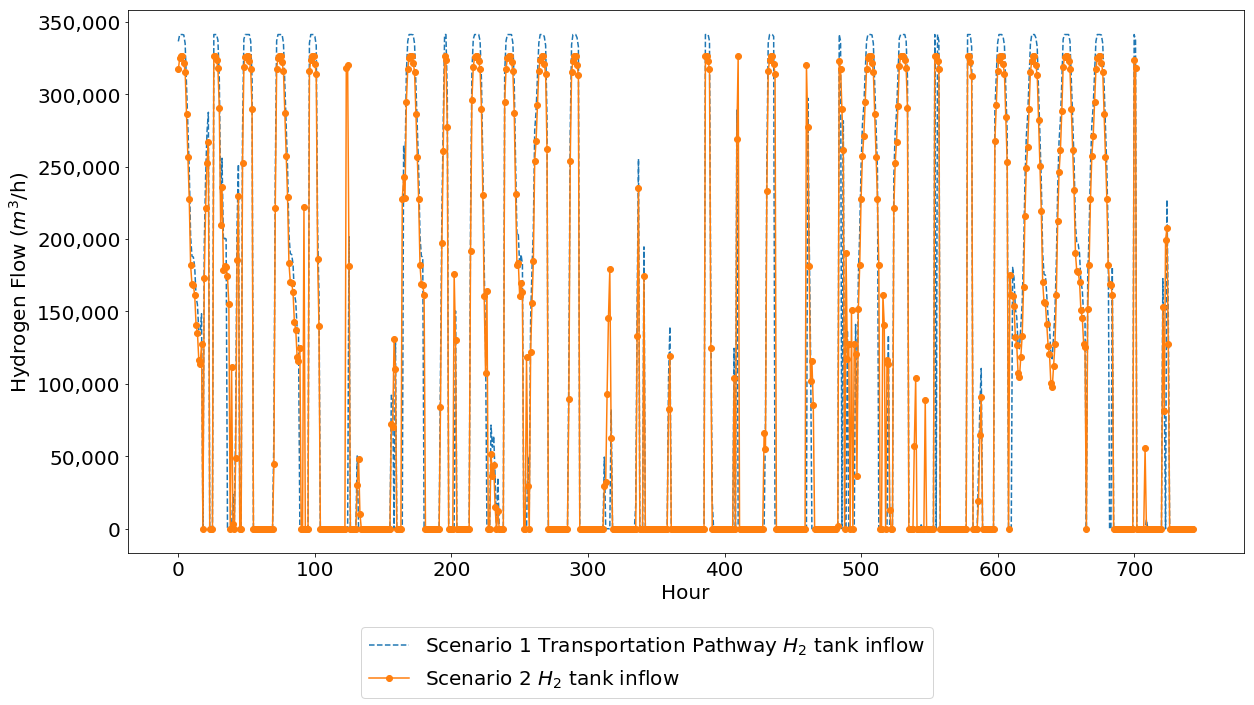

In [87]:
H2_tank_in_trans = create_var_df_from_result(trans_eq_5,'H2_tank_in_3_',hour_str='Y')['value'].tolist()
H2_tank_in_combined = create_var_df_from_result(equality_result_demand_factor_1_5,'H2_tank_in_',hour_str='Y')['value'].tolist()


fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.xlabel('Hour',fontsize=20)
plt.ylabel('Hydrogen Flow ($m^3$/h)', fontsize =20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.plot(list(range(0,744)), H2_tank_in_trans[0:744],linestyle='--')
plt.plot(list(range(0,744)), H2_tank_in_combined[0:744], marker='o')
plt.legend(['Scenario 1 Transportation Pathway $H_2$ tank inflow', 
            'Scenario 2 $H_2$ tank inflow'],loc='center left', bbox_to_anchor=(0.2, -0.2),prop={'size': 20})


plt.show()


# Cost breakdown

In [88]:

equality_result_demand_factor_1_5 = pd.read_csv('combined_result_equal_demand_factor_1.0_0.5.csv')



df = equality_result_demand_factor_1_5



'''
CAPEX
'''
#CAPEX electrolyzer
beta = var['value']['beta']
C_0 = var['value']['C_0']
mu = var['value']['mu']
N_electrolyzer = df[df['variable'].str.contains('N_electrolyzer')]['value'].tolist()[0]
CAPEX_electrolyzer = beta * 1000 * C_0 * N_electrolyzer ** mu


#CAPEX methanation reactor
gamma = var['value']['gamma']
k = var['value']['k']
C_upgrading = var['value']['C_upgrading']
RNG_max = df[df['variable'].str.contains('RNG_max')]['value'].tolist()[0]
alpha_RNG = df[df['variable'].str.contains('alpha_RNG')]['value'].tolist()[0]
CAPEX_reactor = gamma * RNG_max + k*alpha_RNG + C_upgrading * RNG_max


#CAPEX tank
CAPEX_tank = var['value']['CAPEX_tank'] # $
N_tank = df[df['variable'].str.contains('N_tank')]['value'].tolist()[0]
CAPEX_tank = CAPEX_tank * N_tank * 20 

#CAPEX Prestorage
CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
N_prestorage = df[df['variable'].str.contains('N_prestorage')]['value'].tolist()[0]
CAPEX_prestorage = CAPEX_prestorage * N_prestorage * 20 


#CAPEX Booster 
CAPEX_booster = var['value']['CAPEX_booster'] # $
N_booster = df[df['variable'].str.contains('N_booster')]['value'].tolist()[0]
CAPEX_booster = CAPEX_booster * N_booster * 20 


CAPEX_total = CAPEX_electrolyzer + CAPEX_reactor + CAPEX_tank + CAPEX_prestorage + CAPEX_booster

print('calculated CAPEX: ',CAPEX_total/(10**6))


model_capex = sum(df[df['variable'].str.contains('CAPEX')]['value'].tolist())
print('model CAPEX: ', model_capex/(10**6))



import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
CAPEX
'''
#Pie chart - count of segments
labels = ['CAPEX_electrolyzer', 'CAPEX_reactor', 'CAPEX_tank', 'CAPEX_prestorage', 'CAPEX_booster']
data = [CAPEX_electrolyzer, CAPEX_reactor, CAPEX_tank, CAPEX_prestorage, CAPEX_booster]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20,rotatelabels=True)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()


summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf_pct = summarydf.div(summarydf.sum()/100,1)
display(summarydf)
# display(summarydf_pct)

summarydf.to_clipboard(excel=True)









'''
OPEX
'''
#CO2 cost
C_CO2 = var['value']['C_CO2']
OPEX_CO2 = sum(create_var_df_from_result(df,'CO2_',hour_str='Y')['value'].tolist())  * C_CO2

#Electricity cost
TC = var['value']['TC']
sbg_list = np.array(create_var_df_from_result(df,'E_',hour_str='Y')['value'].tolist())
HOEP = np.array(list(input_df['HOEP']))
sbg_hoep = sbg_list * HOEP + sbg_list * TC
OPEX_sbg = np.sum(sbg_hoep)


#Water cost
C_H2O = var['value']['C_H2O']
WCR = var['value']['water_cons_rate']
H2_direct = sum(create_var_df_from_result(df,'H2_direct_',hour_str='Y')['value'].tolist())
H2_tank_in = sum(create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist())
OPEX_water = (H2_direct + H2_tank_in) * C_H2O * WCR


#methanation reactor cost
OPEX_upgrading = var['value']['OPEX_upgrading']
RNG_max = df[df['variable'].str.contains('RNG_max')]['value'].tolist()[0]
OPEX_reactor = OPEX_upgrading * RNG_max 


#Prestorage cost 
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3
ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

TC = var['value']['TC']
H2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist()
HOEP = list(input_df['HOEP'])
OPEX_prestorage = 0
for n in input_df.index:
    OPEX_prestorage = OPEX_prestorage + (ECF_prestorage * H2_tank_in_list[n]) * (HOEP[n] + TC)

    
#Booster cost 
#Electricity consumption rate for booster compressor - calculated using power equation
z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
R = var['value']['R'] #kJ/kmolK
T = var['value']['T'] #K
comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                heat_cap_ratio / (heat_cap_ratio - 1) * \
                (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                / 3600 #converting kJ to kWh ECF booster in kWh/kmol

#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

ECF_booster = ECF_booster / MW_H2 * density_H2 #kWh/m^3

TC = var['value']['TC']
H2_3_list = create_var_df_from_result(df,'H2_3_',hour_str='Y')['value'].tolist()
HOEP = list(input_df['HOEP'])
OPEX_booster = 0
for n in input_df.index:
    OPEX_booster = OPEX_booster + (ECF_booster *( H2_3_list[n])) * (HOEP[n] + TC)


OPEX_total = OPEX_CO2 + OPEX_sbg + OPEX_water + OPEX_prestorage + OPEX_reactor + OPEX_booster


print('calculated OPEX: ', OPEX_total/(10**6))

model_opex = sum(df[df['variable'].str.contains('OPEX')]['value'].tolist())
print('model OPEX: ', model_opex/(10**6))
# display(df[df['variable'].str.contains('OPEX')])


import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 


'''
OPEX
'''
#Pie chart - count of segments
labels = ['OPEX_CO2', 'OPEX_sbg', 'OPEX_water', 'OPEX_prestorage','OPEX_reactor', 'OPEX_booster']
data = [OPEX_CO2, OPEX_sbg, OPEX_water, OPEX_prestorage, OPEX_reactor, OPEX_booster]
# colors = cm.coolwarm(np.linspace(0,1,len(labels)))
# counts = pd.Series(data,index=labels)

# plt.figure(figsize=(30,20))
# counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20)
# plt.axis('equal')

# plt.ylabel('')

# #     plt.title(title,fontsize=60,loc='center') 

# #     plt.savefig(title+'_piechart.png')
# plt.show()



summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
summarydf_pct = summarydf.div(summarydf.sum()/100,1)
# display(summarydf_pct)
display(summarydf)


summarydf.to_clipboard(excel=True)


calculated CAPEX:  46788.999055683664
model CAPEX:  46788.9986791


,Values
Breakdown,
CAPEX_electrolyzer,3.444683e+08
CAPEX_reactor,7.002109e+06
CAPEX_tank,4.534813e+10
CAPEX_prestorage,7.052520e+08
CAPEX_booster,3.841423e+08


calculated OPEX:  69.48645398917475
model OPEX:  69.4864541


,Values
Breakdown,
OPEX_CO2,1.369246e+06
OPEX_sbg,5.521837e+07
OPEX_water,1.534171e+06
OPEX_prestorage,1.595581e+06
OPEX_reactor,2.538218e+05
OPEX_booster,9.515261e+06


# Emission Breakdown

In [89]:

equality_result_demand_factor_1_5 = pd.read_csv('combined_result_equal_demand_factor_1.0_0.5.csv')



df = equality_result_demand_factor_1_5





EMF = list(input_df['EMF(tonne/kWh)'])
EMF_NG = var['value']['EMF_NG']
EMF_comb = var['value']['EMF_combRNG']
EMF_nuc = var['value']['EMF_nuclear']
EMF_bio = var['value']['EMF_bioCO2']
EMF_electrolyzer = var['value']['EMF_electrolyzer']
EMF_reactor = var['value']['EMF_reactor']
ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2
EMF_vehicle = var['value']['emission_gasoline_v'] #tonne CO2/car/year
#Electricity consumption rate for booster compressor - calculated using power equation
z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
R = var['value']['R'] #kJ/kmolK
T = var['value']['T'] #K
comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
N_stage_booster = var['value']['N_stage_booster']

ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                heat_cap_ratio / (heat_cap_ratio - 1) * \
                (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                / 3600 #converting kJ to kWh ECF booster in kWh/kmol

            
# Unit Conversions
#converting the transportation constants to m^3
MW_H2 = var['value']['MW_H2'] #kg/kmol H2
density_H2 = var['value']['density_H2'] #kg/m^3

ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3
ECF_booster = ECF_booster / MW_H2 * density_H2 #kWh/m^3

#Emission Reduced is the difference between demand and replaced 
em_ng =  df[df['variable'].str.contains('em_ng')]['value'].tolist()[0]


#Emission Reduced 
em_offset_fcv = 100000 * EMF_vehicle


EMF_SMR=var['value']['EMF_SMR'] #kg CO2/kmol of H2
EMF_SMR=EMF_SMR*0.001/MW_H2*density_H2 #tonne CO2/m^3 of H2


#Emission Reduced 
em_smr = EMF_SMR * sum(industry_demand)


total_reduced = em_ng + em_offset_fcv + em_smr








#Emission Produced
em_comb_rng = EMF_comb * sum(create_var_df_from_result(df,'RNG_',hour_str='Y',exc_string='RNG_max')['value'].tolist())
E_list = create_var_df_from_result(df,'E_',hour_str='Y')['value'].tolist()
em_sbg = sum([EMF[x] * E_list[x] for x in range(0,8760)])
em_bio = EMF_bio * sum(create_var_df_from_result(df,'CO2_',hour_str='Y')['value'].tolist())
h2_direct = sum(create_var_df_from_result(df,'H2_direct_',hour_str='Y')['value'].tolist())
h2_tank_in = sum(create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist())
em_electrolyzer = EMF_electrolyzer * (h2_direct + h2_tank_in)
em_reactor = EMF_reactor * sum(create_var_df_from_result(df,'RNG_',hour_str='Y',exc_string='RNG_max')['value'].tolist())
h2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist()
em_prestorage = sum([EMF[x] * ECF_prestorage * h2_tank_in_list[x] for x in range(0,8760)])
h2_3 = create_var_df_from_result(df,'H2_3_',hour_str='Y')['value'].tolist()

em_booster = sum([EMF[x] * ECF_booster * (h2_3[x]) for x in range(0,8760)])

total_produced = em_comb_rng + em_sbg + em_bio + em_electrolyzer + em_reactor + em_prestorage + em_booster

print('calculated em_offset: ',(total_reduced - total_produced))
print('model em_offset: ', df[df['variable'].str.contains('em_offset')]['value'].tolist()[0])



labels = ['SMR', 'FCV', 'Replaced NG', 'Combustion RNG', 'Electricity', 'Biogenic CO2', 'Electrolyzer', 'Reactor', 'Prestorage','Booster']
data = [em_smr, em_offset_fcv, em_ng, em_comb_rng, em_sbg, em_bio, em_electrolyzer,
       em_reactor, em_prestorage, em_booster]


summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
summarydf.set_index('Breakdown',inplace=True)
# summarydf_pct = summarydf.div(summarydf.sum()/100,1)
display(summarydf)
# display(summarydf_pct)
summarydf.to_clipboard(excel=True)
print(round(summarydf['Values'][4:].sum()))







calculated em_offset:  470595.4089743515
model em_offset:  470595.41


,Values
Breakdown,
SMR,184575.937500
FCV,460000.000000
Replaced NG,28778.055000
Combustion RNG,90.394140
Electricity,173936.175840
Biogenic CO2,1796.156636
Electrolyzer,4722.218565
Reactor,121.799237
Prestorage,5346.967106


202668.0


# Total Demand Sensitivity Analysis

In [90]:
# df = equality_result_demand_factor_16_5

# H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
# H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
# H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
# #     I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')


# H2_gen = (H2_direct_df['value'].sum() + H2_tank_in_df['value'].sum())

# H2_sup = (H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())

# print(H2_sup)

# df = equality_result_demand_factor_1_5

# H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
# H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
# H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
# #     I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')

# H2_sup2 = (H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())


# print(H2_sup/(10**9))

In [91]:
import numpy as np


equality_result_demand_factor_1_5 = pd.read_csv('combined_result_equal_demand_factor_1.0_0.5.csv')
equality_result_demand_factor_11_5 = pd.read_csv('combined_result_equal_demand_factor_1.1_0.5.csv')
equality_result_demand_factor_12_5 = pd.read_csv('combined_result_equal_demand_factor_1.2_0.5.csv')
equality_result_demand_factor_13_5 = pd.read_csv('combined_result_equal_demand_factor_1.3_0.5.csv')
equality_result_demand_factor_14_5 = pd.read_csv('combined_result_equal_demand_factor_1.4_0.5.csv')
equality_result_demand_factor_15_5 = pd.read_csv('combined_result_equal_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_16_5 = pd.read_csv('combined_result_equal_demand_factor_1.6_0.5.csv')
equality_result_demand_factor_17_5 = pd.read_csv('combined_result_equal_demand_factor_1.7_0.5.csv')
equality_result_demand_factor_18_5 = pd.read_csv('combined_result_equal_demand_factor_1.8_0.5.csv')


index_label = ['1.0', '1.1','1.2','1.3','1.4','1.5','1.6','1.7','1.8']

em_list = []
cost_list = []
i = 0
for df in [equality_result_demand_factor_1_5,equality_result_demand_factor_11_5,
           equality_result_demand_factor_12_5,equality_result_demand_factor_13_5,
           equality_result_demand_factor_14_5,equality_result_demand_factor_15_5,
           equality_result_demand_factor_16_5,equality_result_demand_factor_17_5,
           equality_result_demand_factor_18_5]:
    i += 1
    em_list.append(create_var_df_from_result(df,'em_offset')['value'].tolist()[0])
    cost_list.append(create_var_df_from_result(df,'total_cost')['value'].tolist()[0])
    

final_df = pd.DataFrame({'emission offset' : em_list,'total cost' : cost_list})
final_df['cost/emoffset'] = final_df['total cost'] / final_df['emission offset'] 
final_df.index = index_label
display(final_df)
    
final_df.to_clipboard(excel=True)

,emission offset,total cost,cost/emoffset
1.0,470595.41,4.747122e+10,100874.798163
1.1,518211.67,5.538538e+10,106877.917280
1.2,566018.18,6.435305e+10,113694.321621
1.3,612473.22,7.372558e+10,120373.560170
1.4,658116.91,8.310840e+10,126282.126682
1.5,702795.21,9.250323e+10,131621.888829
1.6,745369.22,1.019174e+11,136734.167799
1.7,787526.27,1.179135e+11,149726.484680
1.8,829319.64,1.584021e+11,191002.434236


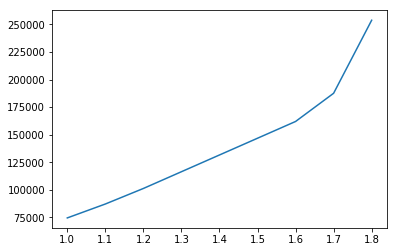

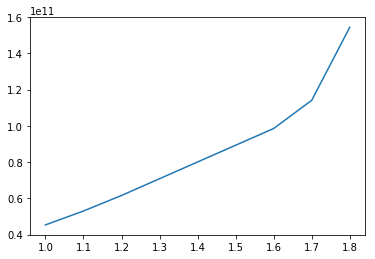

In [94]:
CAPEX_tank_list = []
N_tank_list = []
for df in [equality_result_demand_factor_1_5,equality_result_demand_factor_11_5,
           equality_result_demand_factor_12_5,equality_result_demand_factor_13_5,
          equality_result_demand_factor_14_5,equality_result_demand_factor_15_5,
          equality_result_demand_factor_16_5,equality_result_demand_factor_17_5,
          equality_result_demand_factor_18_5]:

    CAPEX_tank = var['value']['CAPEX_tank'] # $
    N_tank = df[df['variable'].str.contains('N_tank')]['value'].tolist()[0]
    CAPEX_tank = CAPEX_tank * N_tank * 20 
    CAPEX_tank_list.append(CAPEX_tank)
    N_tank_list.append(N_tank)
    
    
# plt.plot([1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8],CAPEX_tank_list)
plt.plot([1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8],N_tank_list)
plt.show()
plt.plot([1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8],CAPEX_tank_list)
plt.show()


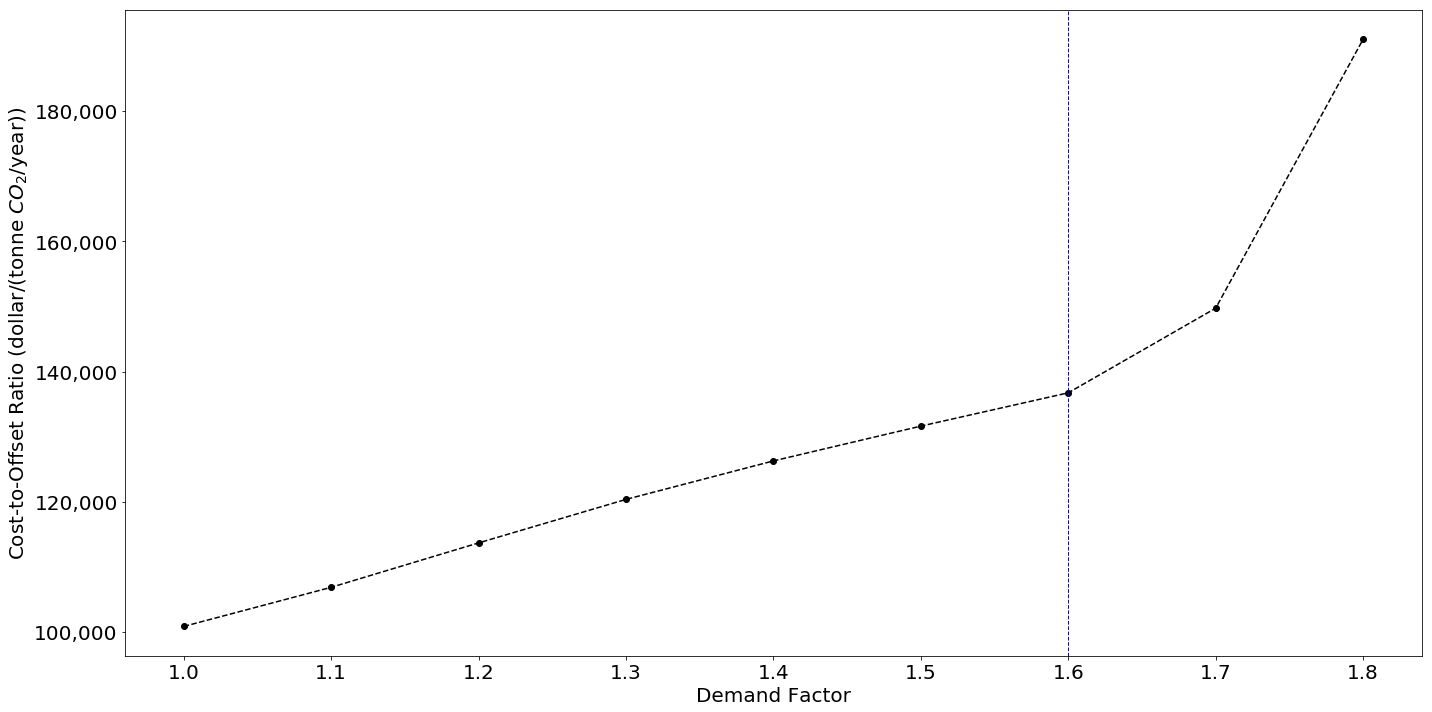

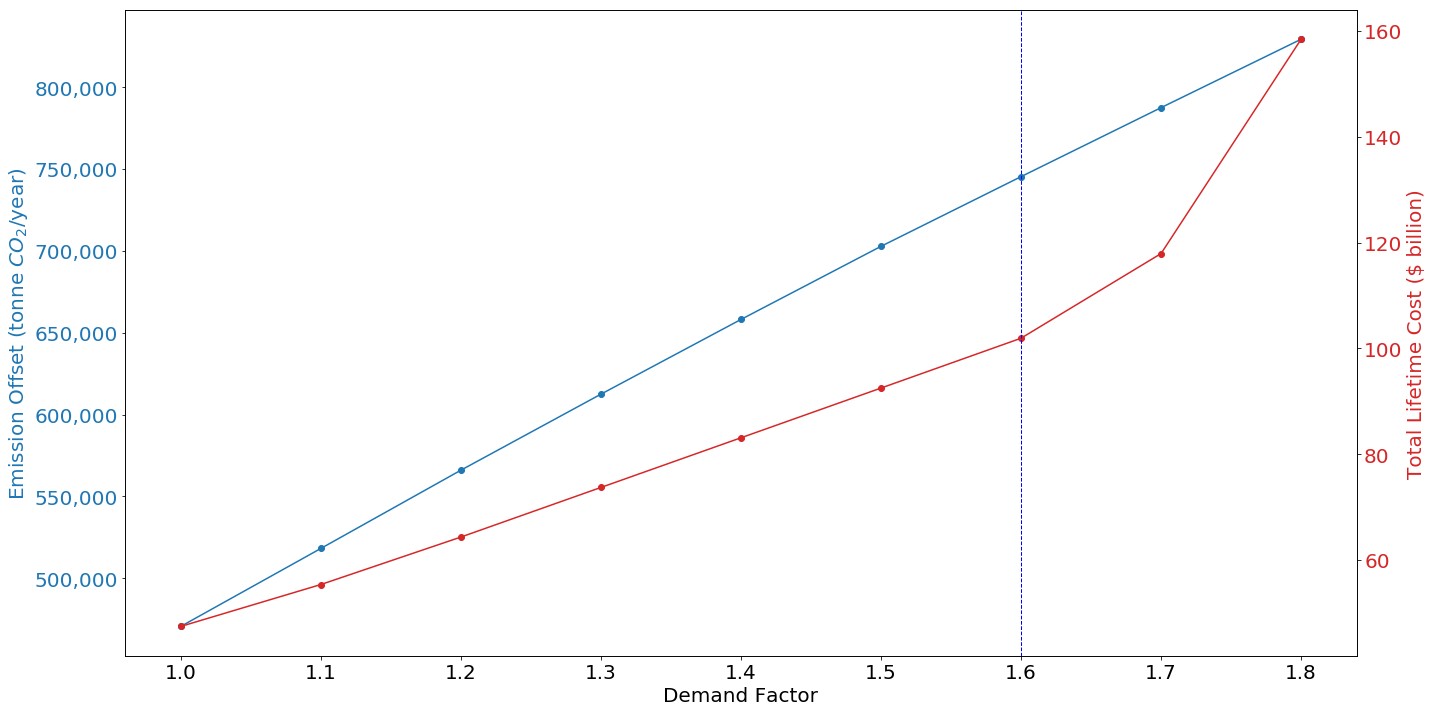

In [95]:
df = final_df
%matplotlib inline
import matplotlib.pyplot as plt
df.reset_index()

for col_name in ['cost/emoffset']:
#     fig, ax = plt.figure(figsize=(20,10),dpi=300)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.plot(df.index,df[col_name],linestyle='--', marker='o',color='k')
    plt.xlabel('Demand Factor',fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.ylabel('Cost-to-Offset Ratio (dollar/(tonne $CO_2$/year))',fontsize=20)
    plt.axvline(1.6,linewidth=1, color='b',linestyle='--')
    plt.tight_layout()
#     plt.savefig(y_col_name+'.png',dpi=300)


import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
xdata = df.index
ydata1 = df['emission offset']
ydata2 = df['total cost']

fig, ax1 = plt.subplots(figsize=(20,10))


color = 'tab:blue'
ax1.set_xlabel('Demand Factor', fontsize=20)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax1.set_ylabel('Emission Offset (tonne $CO_2$/year)', color=color, fontsize=20)
ax1.plot(xdata, ydata1, color=color,marker='o')
ax1.tick_params(axis='y', labelcolor=color)
plt.tick_params(axis='both', which='major', labelsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Total Lifetime Cost ($ billion)', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(xdata, ydata2/(10**9), color=color,marker='o')
ax2.tick_params(axis='y', labelcolor=color)
plt.tick_params(axis='both', which='major', labelsize=20)



plt.axvline(1.6,linewidth=1, color='b',linestyle='--')


    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [96]:
for df in [equality_result_demand_factor_1_5,equality_result_demand_factor_11_5,
           equality_result_demand_factor_12_5,equality_result_demand_factor_13_5,
          equality_result_demand_factor_14_5,equality_result_demand_factor_15_5,
          equality_result_demand_factor_16_5,equality_result_demand_factor_17_5,
          equality_result_demand_factor_18_5]:
    '''
    CAPEX
    '''
    #CAPEX electrolyzer
    beta = var['value']['beta']
    C_0 = var['value']['C_0']
    mu = var['value']['mu']
    N_electrolyzer = df[df['variable'].str.contains('N_electrolyzer')]['value'].tolist()[0]
    CAPEX_electrolyzer = beta * 1000 * C_0 * N_electrolyzer ** mu


    #CAPEX methanation reactor
    gamma = var['value']['gamma']
    k = var['value']['k']
    C_upgrading = var['value']['C_upgrading']
    RNG_max = df[df['variable'].str.contains('RNG_max')]['value'].tolist()[0]
    alpha_RNG = df[df['variable'].str.contains('alpha_RNG')]['value'].tolist()[0]
    CAPEX_reactor = gamma * RNG_max + k*alpha_RNG + C_upgrading * RNG_max


    #CAPEX tank
    CAPEX_tank = var['value']['CAPEX_tank'] # $
    N_tank = df[df['variable'].str.contains('N_tank')]['value'].tolist()[0]
    CAPEX_tank = CAPEX_tank * N_tank * 20 

    #CAPEX Prestorage
    CAPEX_prestorage = var['value']['CAPEX_prestorage'] # $
    N_prestorage = df[df['variable'].str.contains('N_prestorage')]['value'].tolist()[0]
    CAPEX_prestorage = CAPEX_prestorage * N_prestorage * 20 


    #CAPEX Booster 
    CAPEX_booster = var['value']['CAPEX_booster'] # $
    N_booster = df[df['variable'].str.contains('N_booster')]['value'].tolist()[0]
    CAPEX_booster = CAPEX_booster * N_booster * 20 


    CAPEX_total = CAPEX_electrolyzer + CAPEX_reactor + CAPEX_tank + CAPEX_prestorage + CAPEX_booster

    print('calculated CAPEX: ',CAPEX_total/(10**6))


    model_capex = sum(df[df['variable'].str.contains('CAPEX')]['value'].tolist())
    print('model CAPEX: ', model_capex/(10**6))



    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import numpy as np 


    '''
    CAPEX
    '''
    #Pie chart - count of segments
    labels = ['CAPEX_electrolyzer', 'CAPEX_reactor', 'CAPEX_tank', 'CAPEX_prestorage', 'CAPEX_booster']
    data = [CAPEX_electrolyzer, CAPEX_reactor, CAPEX_tank, CAPEX_prestorage, CAPEX_booster]
    # colors = cm.coolwarm(np.linspace(0,1,len(labels)))
    # counts = pd.Series(data,index=labels)

    # plt.figure(figsize=(30,20))
    # counts.plot(kind='pie', autopct='%1.2f%%', fontsize = 20,rotatelabels=True)
    # plt.axis('equal')

    # plt.ylabel('')

    # #     plt.title(title,fontsize=60,loc='center') 

    # #     plt.savefig(title+'_piechart.png')
    # plt.show()


    summarydf = pd.DataFrame({'Breakdown': labels, 'Values': data})
    summarydf.set_index('Breakdown',inplace=True)
    summarydf_pct = summarydf.div(summarydf.sum()/100,1)
#     display(summarydf)
    display(summarydf_pct)

#     summarydf.to_clipboard(excel=True)









    '''
    OPEX
    '''
    #CO2 cost
    C_CO2 = var['value']['C_CO2']
    OPEX_CO2 = sum(create_var_df_from_result(df,'CO2_',hour_str='Y')['value'].tolist())  * C_CO2

    #Electricity cost
    TC = var['value']['TC']
    sbg_list = np.array(create_var_df_from_result(df,'E_',hour_str='Y')['value'].tolist())
    HOEP = np.array(list(input_df['HOEP']))
    sbg_hoep = sbg_list * HOEP + sbg_list * TC
    OPEX_sbg = np.sum(sbg_hoep)


    #Water cost
    C_H2O = var['value']['C_H2O']
    WCR = var['value']['water_cons_rate']
    H2_direct = sum(create_var_df_from_result(df,'H2_direct_',hour_str='Y')['value'].tolist())
    H2_tank_in = sum(create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist())
    OPEX_water = (H2_direct + H2_tank_in) * C_H2O * WCR


    #methanation reactor cost
    OPEX_upgrading = var['value']['OPEX_upgrading']
    RNG_max = df[df['variable'].str.contains('RNG_max')]['value'].tolist()[0]
    OPEX_reactor = OPEX_upgrading * RNG_max 


    #Prestorage cost 
    ECF_prestorage = var['value']['ECF_prestorage'] # kWh/kmol H2
    MW_H2 = var['value']['MW_H2'] #kg/kmol H2
    density_H2 = var['value']['density_H2'] #kg/m^3
    ECF_prestorage = ECF_prestorage / MW_H2 * density_H2 #kWh/m^3

    TC = var['value']['TC']
    H2_tank_in_list = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')['value'].tolist()
    HOEP = list(input_df['HOEP'])
    OPEX_prestorage = 0
    for n in input_df.index:
        OPEX_prestorage = OPEX_prestorage + (ECF_prestorage * H2_tank_in_list[n]) * (HOEP[n] + TC)


    #Booster cost 
    #Electricity consumption rate for booster compressor - calculated using power equation
    z_booster = var['value']['z_booster'] #compressibility factor for booster compressor
    R = var['value']['R'] #kJ/kmolK
    T = var['value']['T'] #K
    comp_efficiency = var['value']['comp_efficiency']  #isentropic compressor efficiency
    heat_cap_ratio = var['value']['heat_cap_ratio'] #heat capacaity ratio of hydrogen
    P_in_booster = var['value']['P_in_booster'] #inlet pressure of booster compressor
    P_out_booster = var['value']['P_out_booster'] #outlet pressure of booster compressor
    N_stage_booster = var['value']['N_stage_booster']

    ECF_booster = z_booster * R * T * N_stage_booster / comp_efficiency * \
                    heat_cap_ratio / (heat_cap_ratio - 1) * \
                    (((P_out_booster / P_in_booster) ** ((heat_cap_ratio - 1) / N_stage_booster / heat_cap_ratio ))-1) \
                    / 3600 #converting kJ to kWh ECF booster in kWh/kmol

    #converting the transportation constants to m^3
    MW_H2 = var['value']['MW_H2'] #kg/kmol H2
    density_H2 = var['value']['density_H2'] #kg/m^3

    ECF_booster = ECF_booster / MW_H2 * density_H2 #kWh/m^3

    TC = var['value']['TC']
    H2_3_list = create_var_df_from_result(df,'H2_3_',hour_str='Y')['value'].tolist()
    HOEP = list(input_df['HOEP'])
    OPEX_booster = 0
    for n in input_df.index:
        OPEX_booster = OPEX_booster + (ECF_booster *( H2_3_list[n])) * (HOEP[n] + TC)


    OPEX_total = OPEX_CO2 + OPEX_sbg + OPEX_water + OPEX_prestorage + OPEX_reactor + OPEX_booster


    print('calculated OPEX: ', OPEX_total/(10**6))

    model_opex = sum(df[df['variable'].str.contains('OPEX')]['value'].tolist())
    print('model OPEX: ', model_opex/(10**6))
    # display(df[df['variable'].str.contains('OPEX')])


    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import numpy as np 


    '''
    OPEX
    '''
    #Pie chart - count of segments
    labels = ['OPEX_CO2', 'OPEX_sbg', 'OPEX_water', 'OPEX_prestorage','OPEX_reactor', 'OPEX_booster']
    data = [OPEX_CO2, OPEX_sbg, OPEX_water, OPEX_prestorage, OPEX_reactor, OPEX_booster]



    summarydf2 = pd.DataFrame({'Breakdown': labels, 'Values': data})
    summarydf2.set_index('Breakdown',inplace=True)
    summarydf_pct2 = summarydf2.div(summarydf2.sum()/100,1)
    display(summarydf_pct2)
# display(summarydf)






calculated CAPEX:  46788.999055683664
model CAPEX:  46788.9986791


,Values
Breakdown,
CAPEX_electrolyzer,0.736216
CAPEX_reactor,0.014965
CAPEX_tank,96.920505
CAPEX_prestorage,1.507303
CAPEX_booster,0.821010


calculated OPEX:  69.48645398917475
model OPEX:  69.4864541


,Values
Breakdown,
OPEX_CO2,1.970523
OPEX_sbg,79.466385
OPEX_water,2.207871
OPEX_prestorage,2.296247
OPEX_reactor,0.365282
OPEX_booster,13.693692


calculated CAPEX:  54632.607242896804
model CAPEX:  54632.60698


,Values
Breakdown,
CAPEX_electrolyzer,0.695312
CAPEX_reactor,0.013732
CAPEX_tank,97.050189
CAPEX_prestorage,1.467862
CAPEX_booster,0.772904


calculated OPEX:  76.67309355354546
model OPEX:  76.673094


,Values
Breakdown,
OPEX_CO2,1.964406
OPEX_sbg,79.547232
OPEX_water,2.201018
OPEX_prestorage,2.272008
OPEX_reactor,0.364149
OPEX_booster,13.651187


calculated CAPEX:  63534.72292740764
model CAPEX:  63534.723300900005


,Values
Breakdown,
CAPEX_electrolyzer,0.695708
CAPEX_reactor,0.012596
CAPEX_tank,96.946106
CAPEX_prestorage,1.620990
CAPEX_booster,0.724600


calculated OPEX:  83.35002749613646
model OPEX:  83.35002779999999


,Values
Breakdown,
OPEX_CO2,1.971320
OPEX_sbg,79.540578
OPEX_water,2.208764
OPEX_prestorage,2.214677
OPEX_reactor,0.365430
OPEX_booster,13.699231


calculated CAPEX:  72802.48515443597
model CAPEX:  72802.4847918


,Values
Breakdown,
CAPEX_electrolyzer,0.607144
CAPEX_reactor,0.011679
CAPEX_tank,97.293707
CAPEX_prestorage,1.402756
CAPEX_booster,0.684713


calculated OPEX:  94.02084139570296
model OPEX:  94.0208416


,Values
Breakdown,
OPEX_CO2,1.893219
OPEX_sbg,80.392661
OPEX_water,2.121256
OPEX_prestorage,2.085425
OPEX_reactor,0.350952
OPEX_booster,13.156486


calculated CAPEX:  82070.99473993108
model CAPEX:  82070.9946427


,Values
Breakdown,
CAPEX_electrolyzer,0.538578
CAPEX_reactor,0.010970
CAPEX_tank,97.561915
CAPEX_prestorage,1.233799
CAPEX_booster,0.654739


calculated OPEX:  105.66393405019701
model OPEX:  105.6639334


,Values
Breakdown,
OPEX_CO2,1.814190
OPEX_sbg,81.262154
OPEX_water,2.032709
OPEX_prestorage,1.947348
OPEX_reactor,0.336303
OPEX_booster,12.607296


calculated CAPEX:  91338.75696695942
model CAPEX:  91338.75713360001


,Values
Breakdown,
CAPEX_electrolyzer,0.483930
CAPEX_reactor,0.010404
CAPEX_tank,97.776490
CAPEX_prestorage,1.099140
CAPEX_booster,0.630035


calculated OPEX:  118.6062561526697
model OPEX:  118.6062532


,Values
Breakdown,
OPEX_CO2,1.731670
OPEX_sbg,82.142166
OPEX_water,1.940249
OPEX_prestorage,1.831065
OPEX_reactor,0.321006
OPEX_booster,12.033844


calculated CAPEX:  100606.41960351032
model CAPEX:  100606.419625


,Values
Breakdown,
CAPEX_electrolyzer,0.439352
CAPEX_reactor,0.009943
CAPEX_tank,97.951025
CAPEX_prestorage,0.989797
CAPEX_booster,0.609883


calculated OPEX:  133.53275834718022
model OPEX:  133.532757


,Values
Breakdown,
OPEX_CO2,1.640642
OPEX_sbg,83.115850
OPEX_water,1.838256
OPEX_prestorage,1.699861
OPEX_reactor,0.304131
OPEX_booster,11.401260


calculated CAPEX:  116452.92733836414
model CAPEX:  116452.925595


,Values
Breakdown,
CAPEX_electrolyzer,0.425243
CAPEX_reactor,0.009020
CAPEX_tank,97.986945
CAPEX_prestorage,1.018528
CAPEX_booster,0.560264


calculated OPEX:  148.7689604176898
model OPEX:  148.7689599


,Values
Breakdown,
OPEX_CO2,1.564654
OPEX_sbg,83.929026
OPEX_water,1.753115
OPEX_prestorage,1.589962
OPEX_reactor,0.290045
OPEX_booster,10.873198


calculated CAPEX:  156769.02075910318
model CAPEX:  156769.023966


,Values
Breakdown,
CAPEX_electrolyzer,0.315962
CAPEX_reactor,0.007019
CAPEX_tank,98.483500
CAPEX_prestorage,0.753024
CAPEX_booster,0.440495


calculated OPEX:  166.33177153784473
model OPEX:  166.3317727


,Values
Breakdown,
OPEX_CO2,1.481763
OPEX_sbg,84.831517
OPEX_water,1.660241
OPEX_prestorage,1.454626
OPEX_reactor,0.274680
OPEX_booster,10.297173


# Individual Demand Sensitivity

,N_electrolyzer,N_booster,N_prestorage,N_tank,total_cost,SBG_count_zero,Total SBG Available (10^8 kWh),emission_offset(tonne CO2/year),offset_max,cost/offset,E_count_zero,Total Electricity Used (10^8 kWh),Average Electricity Used (kWh),Average Utilization %,Overall Utilization %,% emission offset,H2_generated(m^3),H2_supplied(m^3),last_inventory(m^3),total_water_consumption(L)
Original phi = 0.5,1705.0,514.0,1386.0,74533.0,4.747122e+10,698,112.10062,470595.41,494473.0965,100874.798163,4655,56.557099,6.456290e+05,43.813490,50.452084,95.171085,1.221474e+09,1.221474e+09,7116842.1,4.885896e+08
RNG 1.5 phi = 0.5,1705.0,514.0,1380.0,76405.0,4.862861e+10,698,112.10062,476856.65,500866.9512,101977.418161,4601,57.266258,6.537244e+05,44.496561,51.084693,95.206252,1.236790e+09,1.236790e+09,7295591.5,4.947159e+08
RNG 2.0 phi = 0.5,1707.0,514.0,1375.0,78276.0,4.978615e+10,698,112.10062,482971.78,507254.5791,103082.944101,4549,57.975417,6.618198e+05,45.177322,51.717302,95.212897,1.252106e+09,1.252106e+09,7474245.4,5.008423e+08
HENG 1.5 phi = 0.5,1706.0,514.0,1386.0,74776.0,4.762050e+10,698,112.10062,475069.10,498984.6094,100239.093639,4651,56.649249,6.466809e+05,43.898770,50.534287,95.207165,1.223464e+09,1.223464e+09,7140045.2,4.893857e+08
HENG 2.0 phi = 0.5,1704.0,514.0,1384.0,75020.0,4.776931e+10,698,112.10062,479575.57,503496.0342,99607.465409,4639,56.741399,6.477329e+05,44.013559,50.616490,95.249126,1.225454e+09,1.225454e+09,7163343.7,4.901818e+08
Trans 1.5 phi = 0.5,2426.0,770.0,2004.0,137992.0,8.708401e+10,698,112.10062,610337.13,634136.2610,142681.812591,3388,81.372534,9.289102e+05,64.612096,72.588835,96.247000,1.757418e+09,1.757418e+09,13176275.0,7.029670e+08
Trans 2.0 phi = 0.5,2897.0,1027.0,2392.0,319919.0,1.989666e+11,698,112.10062,731270.19,741395.8840,272083.496252,1164,106.187969,1.212191e+06,94.072952,94.725586,98.634239,2.293361e+09,2.293361e+09,30547717.0,9.173444e+08
Indu 1.5 phi = 0.5,1705.0,514.0,1362.0,79735.0,5.066780e+10,698,112.10062,553797.14,578437.0907,91491.617310,4447,59.218904,6.760149e+05,46.413181,52.826563,95.740254,1.278962e+09,1.278962e+09,7613559.2,5.115846e+08
Indu 2.0 phi = 0.5,1802.0,514.0,1417.0,84915.0,5.389296e+10,698,112.10062,637520.11,662307.8231,84535.308227,4391,61.880710,7.064008e+05,48.253172,55.201042,96.257373,1.336449e+09,1.336449e+09,8108175.6,5.345796e+08


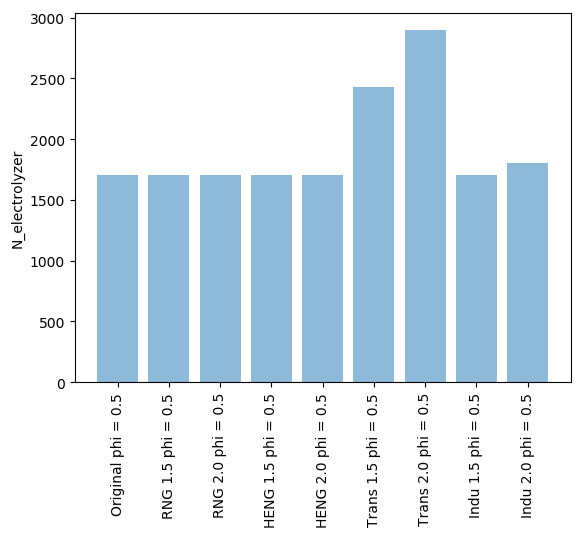

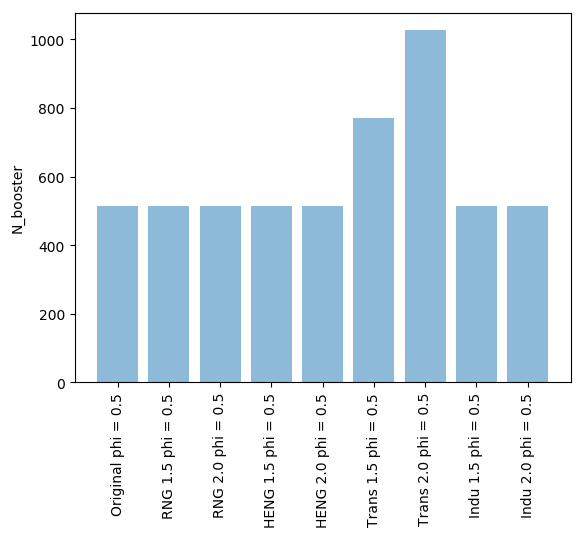

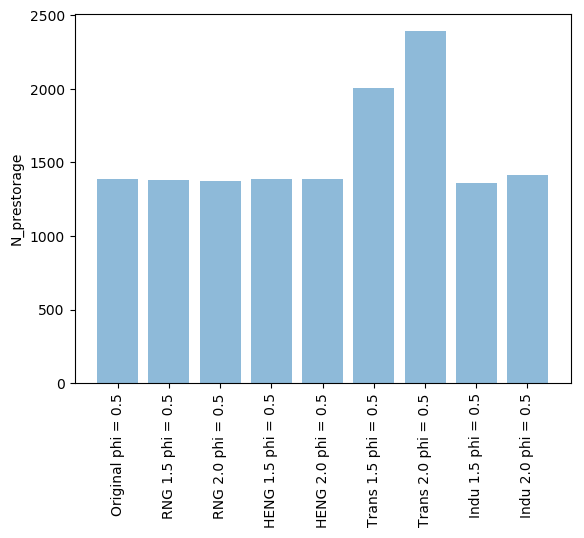

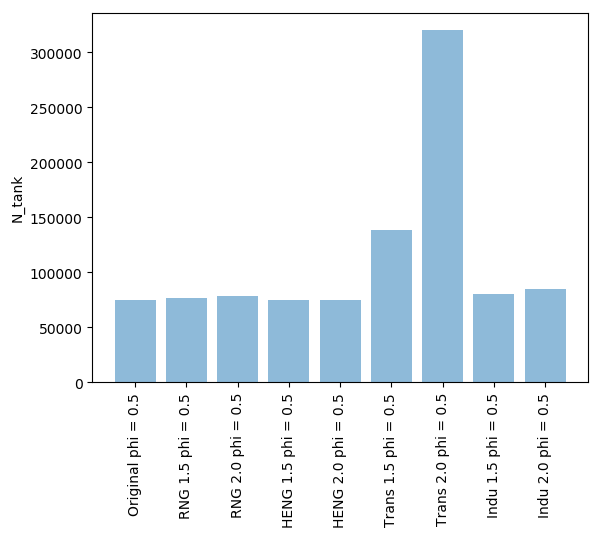

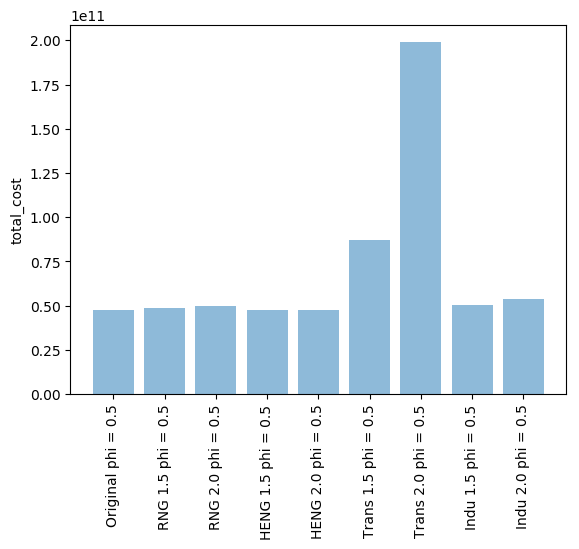

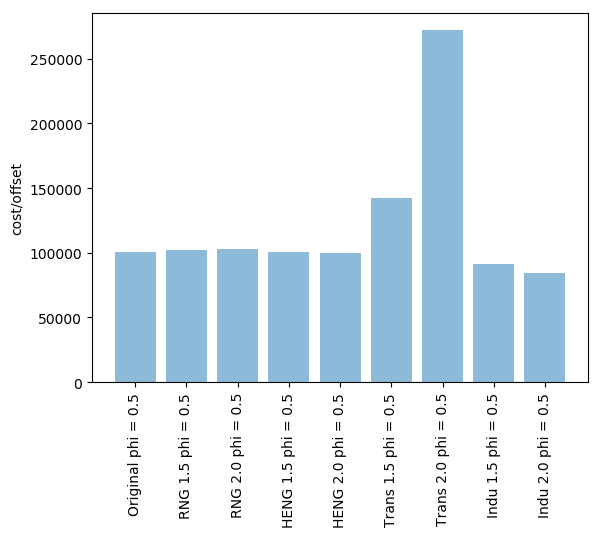

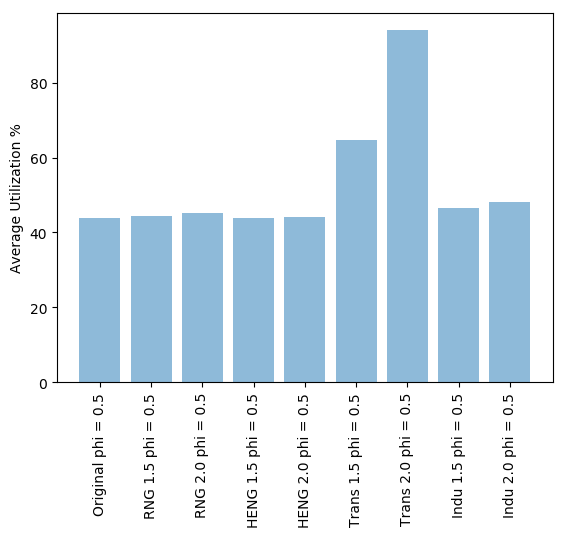

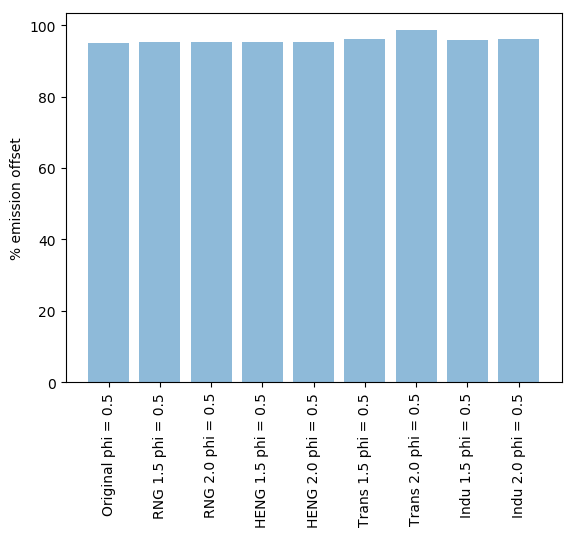

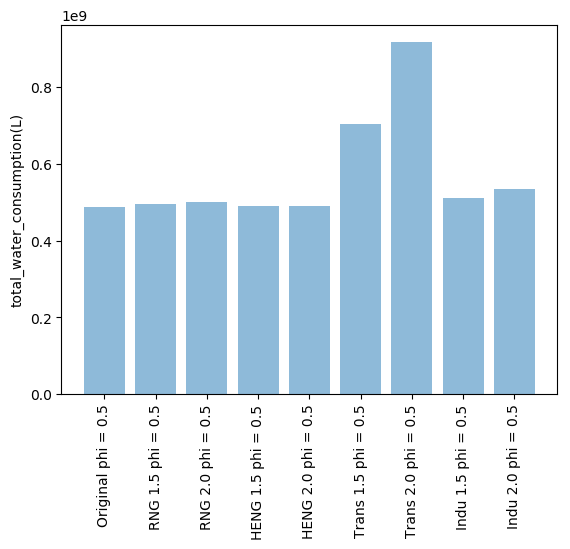

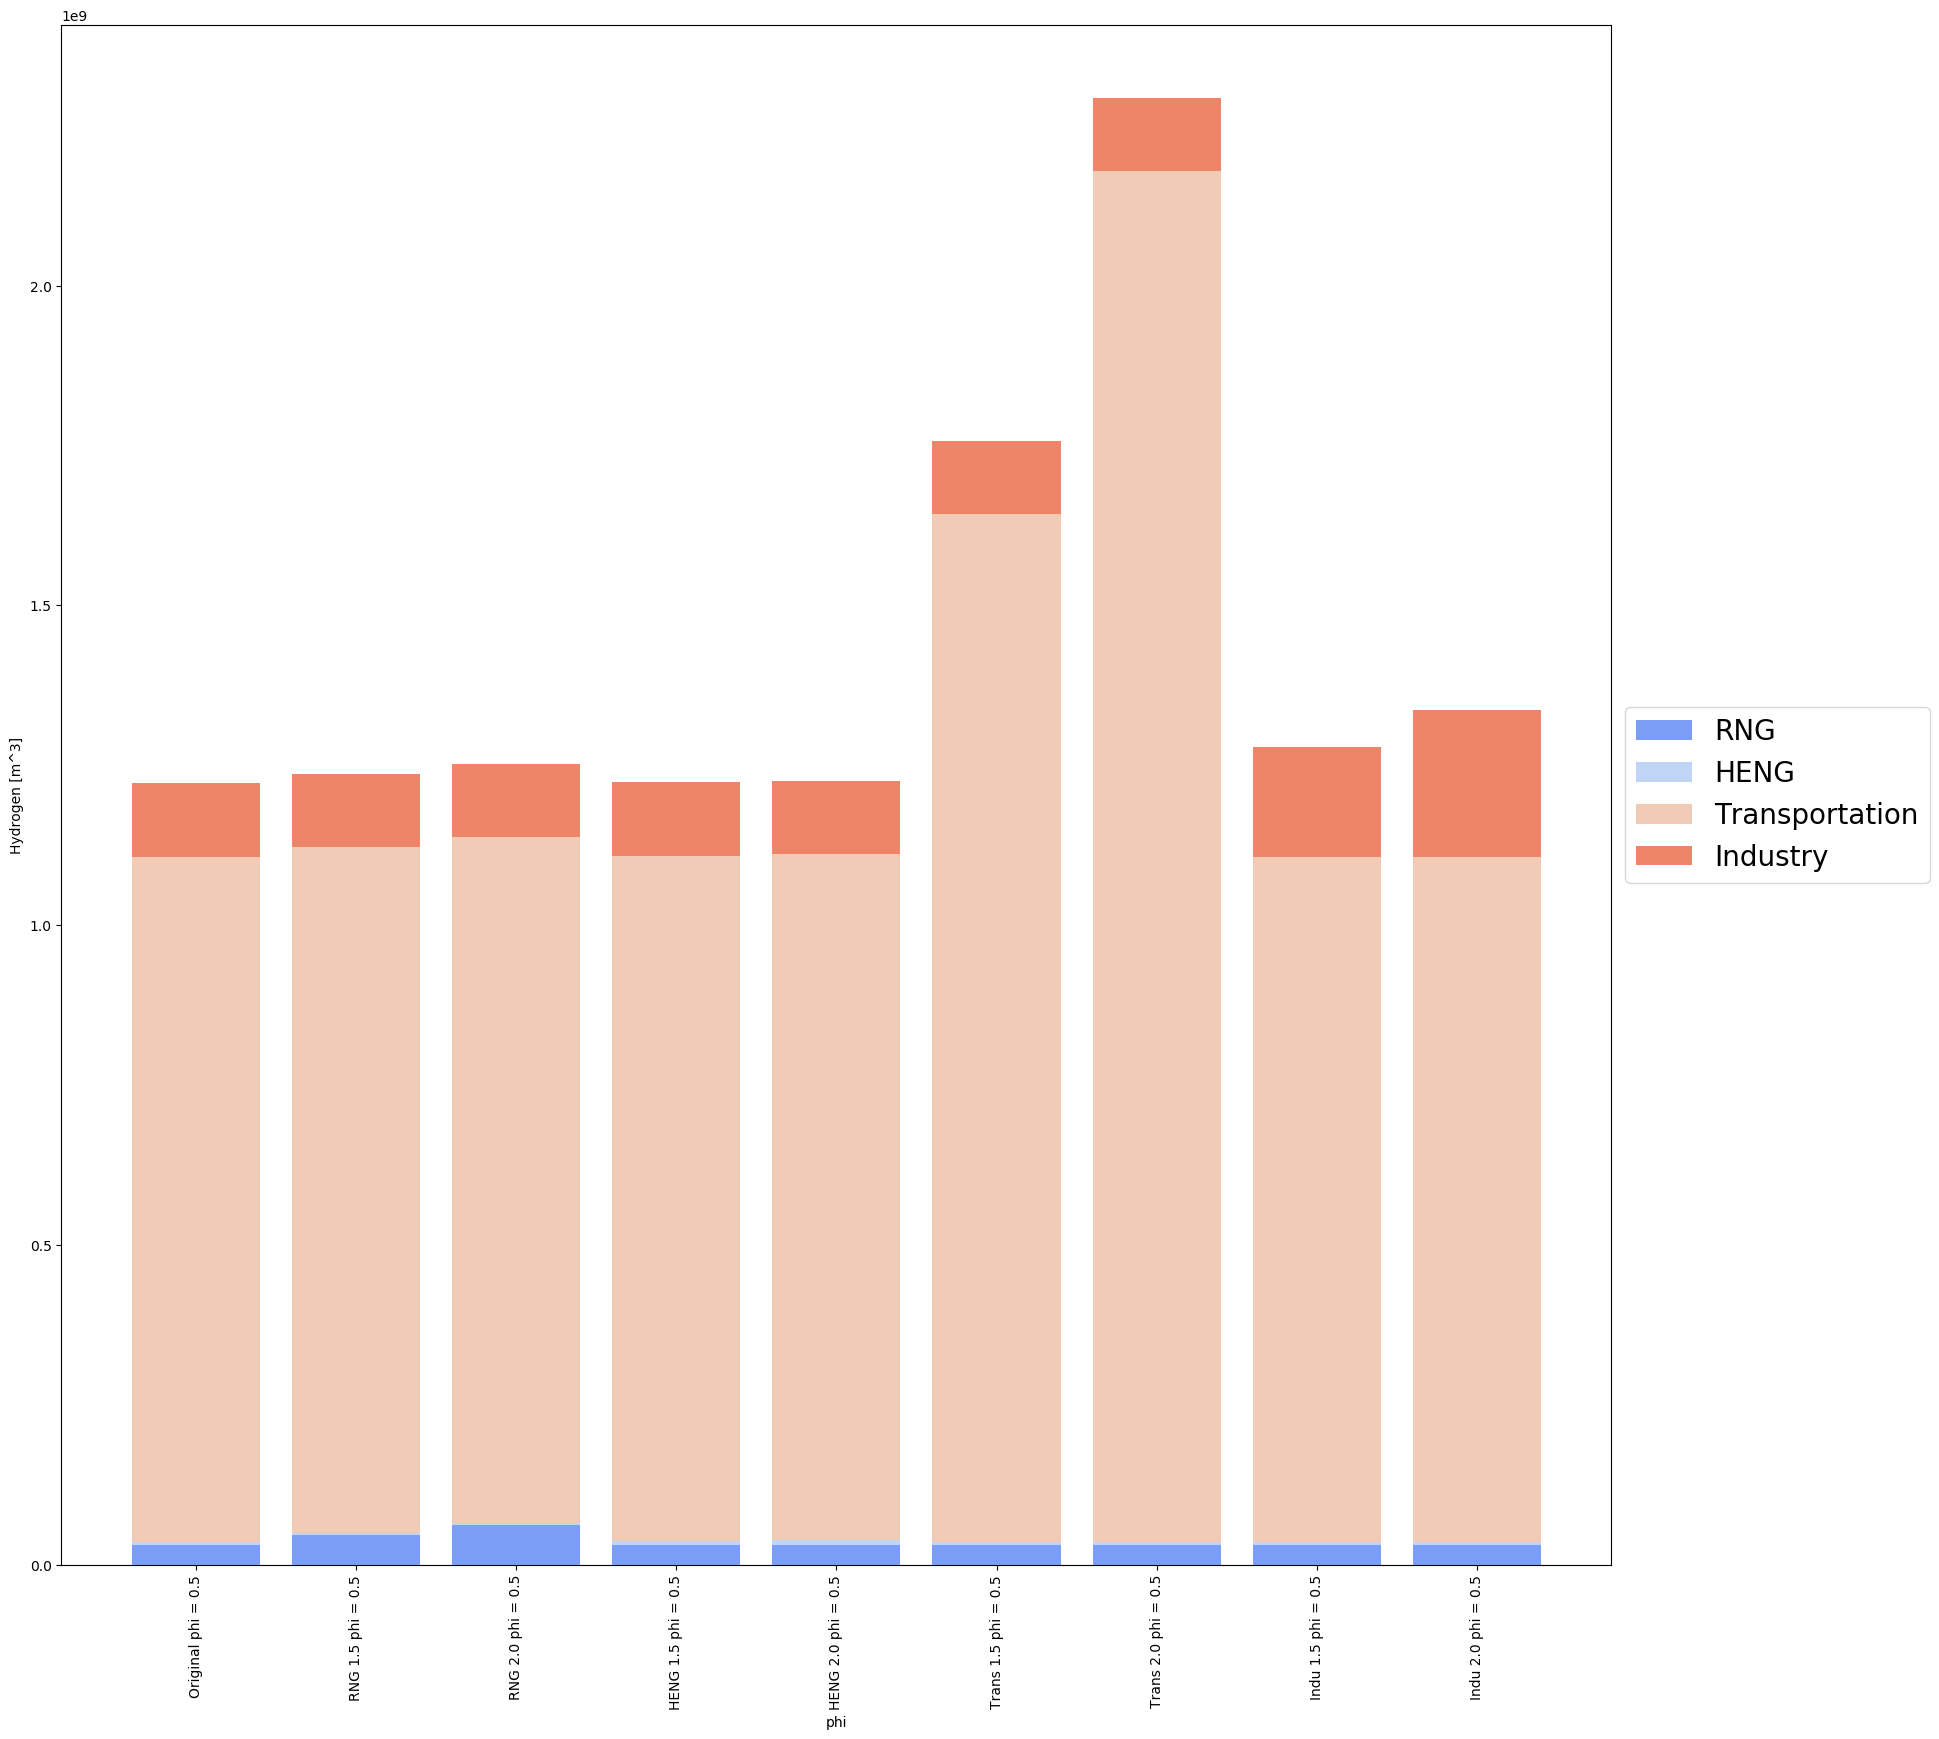

,HENG,Industry,RNG,Transportation
Data,,,,
Original phi = 0.5,3.980367e+06,1.149750e+08,3.063167e+07,1.071887e+09
RNG 1.5 phi = 0.5,3.980367e+06,1.149750e+08,4.594750e+07,1.071887e+09
RNG 2.0 phi = 0.5,3.980367e+06,1.149750e+08,6.126334e+07,1.071887e+09
HENG 1.5 phi = 0.5,5.970551e+06,1.149750e+08,3.063167e+07,1.071887e+09
HENG 2.0 phi = 0.5,7.960734e+06,1.149750e+08,3.063167e+07,1.071887e+09
Trans 1.5 phi = 0.5,3.980367e+06,1.149750e+08,3.063167e+07,1.607830e+09
Trans 2.0 phi = 0.5,3.980367e+06,1.149750e+08,3.063167e+07,2.143774e+09
Indu 1.5 phi = 0.5,3.980367e+06,1.724625e+08,3.063167e+07,1.071887e+09
Indu 2.0 phi = 0.5,3.980367e+06,2.299500e+08,3.063167e+07,1.071887e+09


,HENG,Industry,RNG,Transportation
Data,,,,
Original phi = 0.5,0.325866,9.412808,2.507763,87.753564
RNG 1.5 phi = 0.5,0.321831,9.296244,3.715061,86.666864
RNG 2.0 phi = 0.5,0.317894,9.182532,4.892825,85.606750
HENG 1.5 phi = 0.5,0.488004,9.397496,2.503683,87.610817
HENG 2.0 phi = 0.5,0.649615,9.382234,2.499617,87.468534
Trans 1.5 phi = 0.5,0.226490,6.542270,1.742993,91.488247
Trans 2.0 phi = 0.5,0.173560,5.013384,1.335667,93.477388
Indu 1.5 phi = 0.5,0.311219,13.484573,2.395042,83.809166
Indu 2.0 phi = 0.5,0.297832,17.206043,2.292019,80.204106


In [97]:
#Baseline - original demand 
equality_result_demand_factor_1_5 = pd.read_csv('combined_result_equal_demand_factor_1.0_0.5.csv')

equality_result_demand_factor_RNG_15_5 = pd.read_csv('combined_result_equal_RNG_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_RNG_20_5 = pd.read_csv('combined_result_equal_RNG_demand_factor_2.0_0.5.csv')

equality_result_demand_factor_HENG_15_5 = pd.read_csv('combined_result_equal_HENG_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_HENG_20_5 = pd.read_csv('combined_result_equal_HENG_demand_factor_2.0_0.5.csv')

equality_result_demand_factor_tran_15_5 = pd.read_csv('combined_result_equal_transportation_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_tran_20_5 = pd.read_csv('combined_result_equal_transportation_demand_factor_2.0_0.5.csv')

equality_result_demand_factor_indu_15_5 = pd.read_csv('combined_result_equal_industry_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_indu_20_5 = pd.read_csv('combined_result_equal_industry_demand_factor_2.0_0.5.csv')


import numpy as np

WCR = var['value']['water_cons_rate'] #water consumption rate L H2O/m^3 H2
TVM = var['value']['TVM'] #time money value
SBG = list(input_df['SBG(kWh)']) # SBG list
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 

i = 0
index_label = ['Original phi = 0.5',
               'RNG 1.5 phi = 0.5','RNG 2.0 phi = 0.5',
               'HENG 1.5 phi = 0.5','HENG 2.0 phi = 0.5',
               'Trans 1.5 phi = 0.5','Trans 2.0 phi = 0.5',
               'Indu 1.5 phi = 0.5','Indu 2.0 phi = 0.5']

for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost']:
    i += 1
    var_list = []
    for df in [equality_result_demand_factor_1_5, 
               equality_result_demand_factor_RNG_15_5, equality_result_demand_factor_RNG_20_5,
               equality_result_demand_factor_HENG_15_5, equality_result_demand_factor_HENG_20_5, 
               equality_result_demand_factor_tran_15_5, equality_result_demand_factor_tran_20_5,
               equality_result_demand_factor_indu_15_5,equality_result_demand_factor_indu_20_5]:
        col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
        var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
        var_list.append(var_value)
    
    temp_df = pd.DataFrame({col_name : var_list})
    if i == 1:   
        final_df = temp_df.copy()
    else:
        final_df = pd.concat([final_df,temp_df],axis=1)

#add SBG count zero column 
SBG_count_zero_list = [len(SBG) - np.count_nonzero(SBG)] * len(index_label)
SBG_sum_list = [sum(SBG) * (10**-8)] * len(index_label)
final_df = pd.concat([final_df,pd.DataFrame(SBG_count_zero_list,columns=['SBG_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(SBG_sum_list,columns=['Total SBG Available (10^8 kWh)'])],axis=1)


E_count_zero_list = []
E_sum_list = []
E_SBG_pct_list = []
E_mean_list = []
em_list = []
em_max_list = []

H2_gen_list = [] #total H2 generated using the total electricity consumed; H2 direct + H2 tank in
H2_sup_list = [] #total H2 supplied; H2 direct + H2 tank out 
H2_tank_inv_list = [] #last inventory in the tank
water_cons_list = [] #total water consumption

i = 0
for df in [equality_result_demand_factor_1_5, 
           equality_result_demand_factor_RNG_15_5, equality_result_demand_factor_RNG_20_5,
           equality_result_demand_factor_HENG_15_5, equality_result_demand_factor_HENG_20_5, 
           equality_result_demand_factor_tran_15_5, equality_result_demand_factor_tran_20_5,
           equality_result_demand_factor_indu_15_5,equality_result_demand_factor_indu_20_5]: 
    phi = create_var_df_from_result(df,'phi')['value'].tolist()[0]
    
    if phi == 1:
        em_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    else:
        em_list.append(create_var_df_from_result(df,'em_offset')['value'].tolist()[0])
        
        
    em_max_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    
    E_df = create_var_df_from_result(df,'E_',hour_str='Y')
    E_list = list(E_df['value'])
    E_count_zero_list.append(len(E_list) - np.count_nonzero(E_list))
    
    E_sum = sum(E_list) * (10**-8)
    E_sum_list.append(E_sum)
    
    E_mean = np.mean(E_list)
    E_mean_list.append(E_mean)
     
    #Average SBG utilization 
    #The calculation ignores when SBG is 0 
    pct_list = []
    for x,y in zip(E_list,SBG):
        if y == 0:
            pct_list.append(np.NAN)
        else:
            pct_list.append(( x / y * 100 ))

    E_SBG_pct_list.append(np.nanmean(pct_list))
    
        
    H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
    H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
    H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
    I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')


    H2_gen_list.append(H2_direct_df['value'].sum() + H2_tank_in_df['value'].sum())

    H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())


    H2_tank_inv_list.append(list(I_H2_df['value'])[-1])
    

water_cons_list = [x * WCR for x in H2_gen_list]

final_df = pd.concat([final_df,pd.DataFrame(em_list,columns=['em_offset'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(em_max_list,columns=['offset_max'])],axis=1)

final_df['cost/offset'] = final_df['total_cost'] / final_df['em_offset']
final_df = pd.concat([final_df,pd.DataFrame(E_count_zero_list,columns=['E_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_sum_list,columns=['Total Electricity Used (10^8 kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_mean_list,columns=['Average Electricity Used (kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_SBG_pct_list,columns=['Average Utilization %'])],axis=1)
final_df['Overall Utilization %'] = final_df['Total Electricity Used (10^8 kWh)'] /  final_df['Total SBG Available (10^8 kWh)'] * 100
final_df['% emission offset'] = final_df['em_offset'] / final_df['offset_max'] * 100
final_df = pd.concat([final_df,pd.DataFrame(H2_gen_list,columns=['H2_generated(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_sup_list,columns=['H2_supplied(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_tank_inv_list,columns=['last_inventory(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(water_cons_list,columns=['total_water_consumption(L)'])],axis=1)


final_df = final_df.rename(columns = {'em_offset':'emission_offset(tonne CO2/year)'})



final_df.index = index_label
pd.set_option("display.max_columns", 999)
display(final_df)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
col_name = 'N_electrolyzer'

for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost','cost/offset', 'Average Utilization %', '% emission offset','total_water_consumption(L)']:
    labels = final_df.index.tolist()
    x_label = np.arange(len(labels))
    variable_values = final_df[col_name]

    plt.bar(x_label, variable_values, align='center', alpha=0.5)
    plt.xticks(x_label, labels,rotation=90)
    plt.ylabel(col_name)
    # plt.title('Programming language usage')

    plt.show()

H2_1_list = []
H2_2_list = []
H2_3_list = []
H2_4_list = []

for df in [equality_result_demand_factor_1_5, 
           equality_result_demand_factor_RNG_15_5, equality_result_demand_factor_RNG_20_5,
           equality_result_demand_factor_HENG_15_5, equality_result_demand_factor_HENG_20_5, 
           equality_result_demand_factor_tran_15_5, equality_result_demand_factor_tran_20_5,
           equality_result_demand_factor_indu_15_5,equality_result_demand_factor_indu_20_5]:
    H2_1_df = create_var_df_from_result(df,'H2_1_',hour_str='Y')
    H2_1_list.append(H2_1_df['value'].sum())
    
    H2_2_df = create_var_df_from_result(df,'H2_2_',hour_str='Y')
    H2_2_list.append(H2_2_df['value'].sum())
    
    H2_3_df = create_var_df_from_result(df,'H2_3_',hour_str='Y')
    H2_3_list.append(H2_3_df['value'].sum())
    
    H2_4_df = create_var_df_from_result(df,'H2_4_',hour_str='Y')
    H2_4_list.append(H2_4_df['value'].sum())
    
    

import seaborn as sns 
import numpy as np

color_array = sns.color_palette("coolwarm",4)
label_list = ['RNG','HENG','Transportation','Industry']
ind = [x for x,_ in enumerate(final_df.index.tolist())]

plt.figure(figsize=(20,20))

plt.bar(ind, H2_1_list, width=0.8, label=label_list[0], color = color_array[0])
plt.bar(ind, H2_2_list, width=0.8, label=label_list[1], color = color_array[1], bottom = H2_1_list)
plt.bar(ind, H2_3_list, width=0.8, label=label_list[2], color = color_array[2], bottom = np.array(H2_1_list) + np.array(H2_2_list))
plt.bar(ind, H2_4_list, width=0.8, label=label_list[3], color = color_array[3], bottom = np.array(H2_1_list) + np.array(H2_2_list) + np.array(H2_3_list))


plt.xticks(ind, final_df.index.tolist(),rotation='vertical')
plt.ylabel('Hydrogen [m^3]')
plt.xlabel("phi")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
# plt.title(df.index.name)

# plt.savefig(df.index.name +'_multiple_stackedbar.png')

plt.show()
    

H2_summary = pd.DataFrame({'Data' : final_df.index.tolist(),'RNG' : H2_1_list, 'HENG' : H2_2_list, 'Transportation' : H2_3_list, 'Industry' : H2_4_list})
H2_summary.set_index('Data',inplace=True)
display(H2_summary)
H2_summary.div(H2_summary.sum(1)/100,0)

# Total cost & Emission Offset Analysis

,N_electrolyzer,N_booster,N_prestorage,N_tank,total_cost,SBG_count_zero,Total SBG Available (10^8 kWh),emission_offset(tonne CO2/year),offset_max,cost/offset,E_count_zero,Total Electricity Used (10^8 kWh),Average Electricity Used (kWh),Average Utilization %,Overall Utilization %,% emission offset,H2_generated(m^3),H2_supplied(m^3),last_inventory(m^3),total_water_consumption(L)
Original Demand,1705.0,514.0,1386.0,74533.0,4.747122e+10,698,112.10062,470595.41,494473.0965,100874.798163,4655,56.557099,6.456290e+05,43.813490,50.452084,95.171085,1.221474e+09,1.221474e+09,7116842.1,4.885896e+08
RNG x1.5 Demand,1705.0,514.0,1380.0,76405.0,4.862861e+10,698,112.10062,476856.65,500866.9512,101977.418161,4601,57.266258,6.537244e+05,44.496561,51.084693,95.206252,1.236790e+09,1.236790e+09,7295591.5,4.947159e+08
RNG x2.0 Demand,1707.0,514.0,1375.0,78276.0,4.978615e+10,698,112.10062,482971.78,507254.5791,103082.944101,4549,57.975417,6.618198e+05,45.177322,51.717302,95.212897,1.252106e+09,1.252106e+09,7474245.4,5.008423e+08
HENG x1.5 Demand,1706.0,514.0,1386.0,74776.0,4.762050e+10,698,112.10062,475069.10,498984.6094,100239.093639,4651,56.649249,6.466809e+05,43.898770,50.534287,95.207165,1.223464e+09,1.223464e+09,7140045.2,4.893857e+08
HENG x2.0 Demand,1704.0,514.0,1384.0,75020.0,4.776931e+10,698,112.10062,479575.57,503496.0342,99607.465409,4639,56.741399,6.477329e+05,44.013559,50.616490,95.249126,1.225454e+09,1.225454e+09,7163343.7,4.901818e+08
Transportation x1.5 Demand,2426.0,770.0,2004.0,137992.0,8.708401e+10,698,112.10062,610337.13,634136.2610,142681.812591,3388,81.372534,9.289102e+05,64.612096,72.588835,96.247000,1.757418e+09,1.757418e+09,13176275.0,7.029670e+08
Transportation x2.0 Demand,2897.0,1027.0,2392.0,319919.0,1.989666e+11,698,112.10062,731270.19,741395.8840,272083.496252,1164,106.187969,1.212191e+06,94.072952,94.725586,98.634239,2.293361e+09,2.293361e+09,30547717.0,9.173444e+08
Industry x1.5 Demand,1705.0,514.0,1362.0,79735.0,5.066780e+10,698,112.10062,553797.14,578437.0907,91491.617310,4447,59.218904,6.760149e+05,46.413181,52.826563,95.740254,1.278962e+09,1.278962e+09,7613559.2,5.115846e+08
Industry x2.0 Demand,1802.0,514.0,1417.0,84915.0,5.389296e+10,698,112.10062,637520.11,662307.8231,84535.308227,4391,61.880710,7.064008e+05,48.253172,55.201042,96.257373,1.336449e+09,1.336449e+09,8108175.6,5.345796e+08


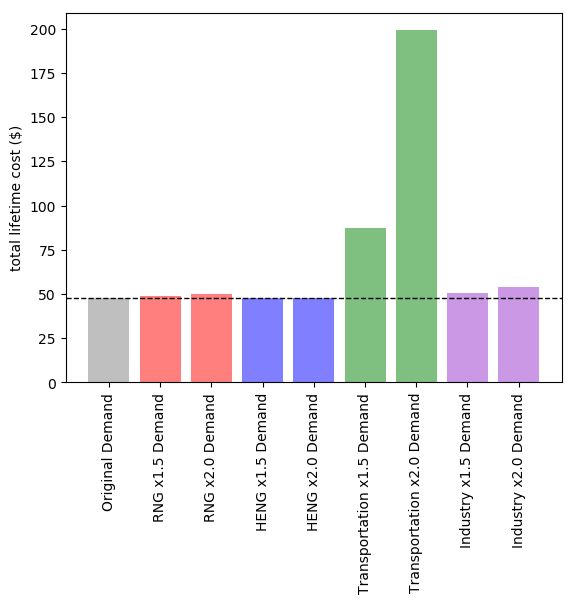

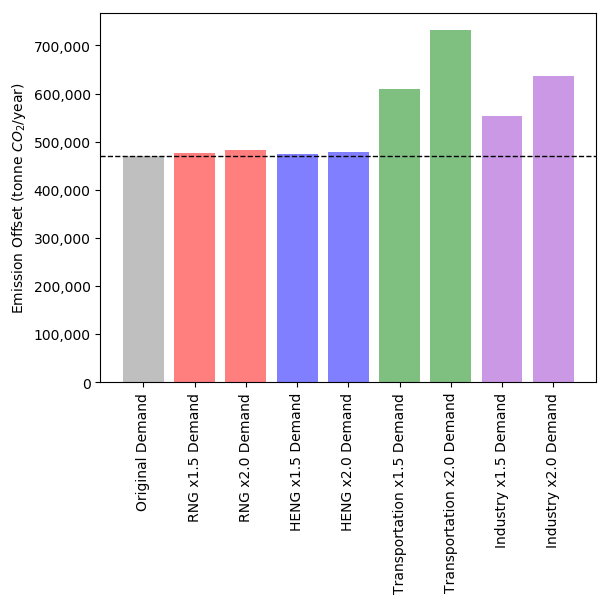

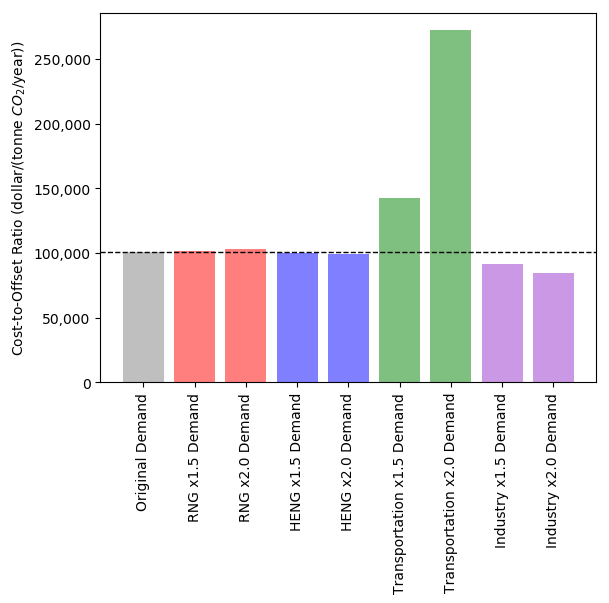

In [98]:
#Baseline - original demand 
equality_result_demand_factor_1_5 = pd.read_csv('combined_result_equal_demand_factor_1.0_0.5.csv')

equality_result_demand_factor_RNG_15_5 = pd.read_csv('combined_result_equal_RNG_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_RNG_20_5 = pd.read_csv('combined_result_equal_RNG_demand_factor_2.0_0.5.csv')

equality_result_demand_factor_HENG_15_5 = pd.read_csv('combined_result_equal_HENG_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_HENG_20_5 = pd.read_csv('combined_result_equal_HENG_demand_factor_2.0_0.5.csv')

equality_result_demand_factor_tran_15_5 = pd.read_csv('combined_result_equal_transportation_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_tran_20_5 = pd.read_csv('combined_result_equal_transportation_demand_factor_2.0_0.5.csv')

equality_result_demand_factor_indu_15_5 = pd.read_csv('combined_result_equal_industry_demand_factor_1.5_0.5.csv')
equality_result_demand_factor_indu_20_5 = pd.read_csv('combined_result_equal_industry_demand_factor_2.0_0.5.csv')


import numpy as np

WCR = var['value']['water_cons_rate'] #water consumption rate L H2O/m^3 H2
TVM = var['value']['TVM'] #time money value
SBG = list(input_df['SBG(kWh)']) # SBG list
NG_demand = list(input_df['NG_demand(m^3)'])
mobility_demand = list(input_df['mobility_demand(m^3)'])
industry_demand = list(input_df['industry_demand(m^3)']) 

i = 0
# index_label = ['Original Demand',
#                'RNG *1.5 Demand','RNG *2.0 Demand',
#                'HENG *1.5 Demand','HENG *2.0 Demand',
#                'Trans *1.5 Demand','Trans *2.0 Demand',
#                'Indus *1.5 Demand','Indus *2.0 Demand']

index_label = ['Original Demand',
               'RNG x1.5 Demand','RNG x2.0 Demand',
               'HENG x1.5 Demand','HENG x2.0 Demand',
               'Transportation x1.5 Demand','Transportation x2.0 Demand',
               'Industry x1.5 Demand','Industry x2.0 Demand']

for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost']:
    i += 1
    var_list = []
    for df in [equality_result_demand_factor_1_5, 
               equality_result_demand_factor_RNG_15_5, equality_result_demand_factor_RNG_20_5,
               equality_result_demand_factor_HENG_15_5, equality_result_demand_factor_HENG_20_5, 
               equality_result_demand_factor_tran_15_5, equality_result_demand_factor_tran_20_5,
               equality_result_demand_factor_indu_15_5,equality_result_demand_factor_indu_20_5]:
        col_name_2 = df[df['variable'].str.contains(col_name)]['variable'].tolist()[0]
        var_value = df.loc[df['variable']==col_name_2,'value'].tolist()[0]
        var_list.append(var_value)
    
    temp_df = pd.DataFrame({col_name : var_list})
    if i == 1:   
        final_df = temp_df.copy()
    else:
        final_df = pd.concat([final_df,temp_df],axis=1)

#add SBG count zero column 
SBG_count_zero_list = [len(SBG) - np.count_nonzero(SBG)] * len(index_label)
SBG_sum_list = [sum(SBG) * (10**-8)] * len(index_label)
final_df = pd.concat([final_df,pd.DataFrame(SBG_count_zero_list,columns=['SBG_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(SBG_sum_list,columns=['Total SBG Available (10^8 kWh)'])],axis=1)


E_count_zero_list = []
E_sum_list = []
E_SBG_pct_list = []
E_mean_list = []
em_list = []
em_max_list = []

H2_gen_list = [] #total H2 generated using the total electricity consumed; H2 direct + H2 tank in
H2_sup_list = [] #total H2 supplied; H2 direct + H2 tank out 
H2_tank_inv_list = [] #last inventory in the tank
water_cons_list = [] #total water consumption

i = 0
for df in [equality_result_demand_factor_1_5, 
           equality_result_demand_factor_RNG_15_5, equality_result_demand_factor_RNG_20_5,
           equality_result_demand_factor_HENG_15_5, equality_result_demand_factor_HENG_20_5, 
           equality_result_demand_factor_tran_15_5, equality_result_demand_factor_tran_20_5,
           equality_result_demand_factor_indu_15_5,equality_result_demand_factor_indu_20_5]: 
    phi = create_var_df_from_result(df,'phi')['value'].tolist()[0]
    
    if phi == 1:
        em_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    else:
        em_list.append(create_var_df_from_result(df,'em_offset')['value'].tolist()[0])
        
        
    em_max_list.append(create_var_df_from_result(df,'offset_max')['value'].tolist()[0])
    
    E_df = create_var_df_from_result(df,'E_',hour_str='Y')
    E_list = list(E_df['value'])
    E_count_zero_list.append(len(E_list) - np.count_nonzero(E_list))
    
    E_sum = sum(E_list) * (10**-8)
    E_sum_list.append(E_sum)
    
    E_mean = np.mean(E_list)
    E_mean_list.append(E_mean)
     
    #Average SBG utilization 
    #The calculation ignores when SBG is 0 
    pct_list = []
    for x,y in zip(E_list,SBG):
        if y == 0:
            pct_list.append(np.NAN)
        else:
            pct_list.append(( x / y * 100 ))

    E_SBG_pct_list.append(np.nanmean(pct_list))
    
        
    H2_direct_df = create_var_df_from_result(df,'H2_direct_',hour_str='Y')
    H2_tank_in_df = create_var_df_from_result(df,'H2_tank_in_',hour_str='Y')
    H2_tank_out_df = create_var_df_from_result(df,'H2_tank_out_',hour_str='Y')
    I_H2_df = create_var_df_from_result(df,'I_H2_',hour_str='Y')


    H2_gen_list.append(H2_direct_df['value'].sum() + H2_tank_in_df['value'].sum())

    H2_sup_list.append(H2_direct_df['value'].sum() + H2_tank_out_df['value'].sum())


    H2_tank_inv_list.append(list(I_H2_df['value'])[-1])
    

water_cons_list = [x * WCR for x in H2_gen_list]

final_df = pd.concat([final_df,pd.DataFrame(em_list,columns=['em_offset'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(em_max_list,columns=['offset_max'])],axis=1)

final_df['cost/offset'] = final_df['total_cost'] / final_df['em_offset']
final_df = pd.concat([final_df,pd.DataFrame(E_count_zero_list,columns=['E_count_zero'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_sum_list,columns=['Total Electricity Used (10^8 kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_mean_list,columns=['Average Electricity Used (kWh)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(E_SBG_pct_list,columns=['Average Utilization %'])],axis=1)
final_df['Overall Utilization %'] = final_df['Total Electricity Used (10^8 kWh)'] /  final_df['Total SBG Available (10^8 kWh)'] * 100
final_df['% emission offset'] = final_df['em_offset'] / final_df['offset_max'] * 100
final_df = pd.concat([final_df,pd.DataFrame(H2_gen_list,columns=['H2_generated(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_sup_list,columns=['H2_supplied(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(H2_tank_inv_list,columns=['last_inventory(m^3)'])],axis=1)
final_df = pd.concat([final_df,pd.DataFrame(water_cons_list,columns=['total_water_consumption(L)'])],axis=1)


final_df = final_df.rename(columns = {'em_offset':'emission_offset(tonne CO2/year)'})



final_df.index = index_label
pd.set_option("display.max_columns", 999)
display(final_df)

import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec



for col_name in ['total_cost','emission_offset(tonne CO2/year)','cost/offset']:

# for col_name in ['N_electrolyzer','N_booster','N_prestorage','N_tank','total_cost','emission_offset(tonne CO2/year)','cost/offset', 'Average Utilization %', '% emission offset','total_water_consumption(L)']:
    labels = final_df.index.tolist()
    x_label = np.arange(len(labels))
    variable_values = final_df[col_name]
    
    if col_name == 'total_cost':
        variable_values = [variable_values[x]/(10**9) for x in range(0,9)]
#     plt.bar(x_label, variable_values, align='center', alpha=0.5)
    
    
    fig, ax = plt.subplots(1, 1)

    
    plt.bar(x_label[0], variable_values[0], color = 'grey',alpha=0.5)
    plt.bar(x_label[1:3], variable_values[1:3], color = 'red',alpha=0.5)
    plt.bar(x_label[3:5], variable_values[3:5], color = 'blue',alpha=0.5)
    plt.bar(x_label[5:7], variable_values[5:7], color = 'green',alpha=0.5)
    plt.bar(x_label[7:9], variable_values[7:9], color = 'darkorchid',alpha=0.5)
    plt.axhline(y=variable_values[0],linewidth=1, color='k',linestyle='--')
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


    
    plt.xticks(x_label, labels,rotation=90)
    if col_name == 'total_cost':
        col_name2 = 'total lifetime cost ($)'
    elif col_name == 'emission_offset(tonne CO2/year)':
        col_name2 = 'Emission Offset (tonne $CO_2$/year)'
    elif col_name == 'cost/offset':
        col_name2 = 'Cost-to-Offset Ratio (dollar/(tonne $CO_2$/year))'
    else:
        colname2 =''
    plt.ylabel(col_name2)
    # plt.title('Programming language usage')

    plt.show()

# H2_1_list = []
# H2_2_list = []
# H2_3_list = []
# H2_4_list = []

# for df in [equality_result_demand_factor_1_5, 
#            equality_result_demand_factor_RNG_15_5, equality_result_demand_factor_RNG_20_5,
#            equality_result_demand_factor_HENG_15_5, equality_result_demand_factor_HENG_20_5, 
#            equality_result_demand_factor_tran_15_5, equality_result_demand_factor_tran_20_5,
#            equality_result_demand_factor_indu_15_5,equality_result_demand_factor_indu_20_5]:
#     H2_1_df = create_var_df_from_result(df,'H2_1_',hour_str='Y')
#     H2_1_list.append(H2_1_df['value'].sum())
    
#     H2_2_df = create_var_df_from_result(df,'H2_2_',hour_str='Y')
#     H2_2_list.append(H2_2_df['value'].sum())
    
#     H2_3_df = create_var_df_from_result(df,'H2_3_',hour_str='Y')
#     H2_3_list.append(H2_3_df['value'].sum())
    
#     H2_4_df = create_var_df_from_result(df,'H2_4_',hour_str='Y')
#     H2_4_list.append(H2_4_df['value'].sum())
    
    

# import seaborn as sns 
# import numpy as np

# color_array = sns.color_palette("coolwarm",4)
# label_list = ['RNG','HENG','Transportation','Industry']
# ind = [x for x,_ in enumerate(final_df.index.tolist())]

# plt.figure(figsize=(30,20),dpi=600)

# plt.bar(ind, H2_1_list, width=0.8, label=label_list[0], color = color_array[0])
# plt.bar(ind, H2_2_list, width=0.8, label=label_list[1], color = color_array[1], bottom = H2_1_list)
# plt.bar(ind, H2_3_list, width=0.8, label=label_list[2], color = color_array[2], bottom = np.array(H2_1_list) + np.array(H2_2_list))
# plt.bar(ind, H2_4_list, width=0.8, label=label_list[3], color = color_array[3], bottom = np.array(H2_1_list) + np.array(H2_2_list) + np.array(H2_3_list))


# plt.xticks(ind, final_df.index.tolist(),rotation='vertical',fontsize=30)
# plt.ylabel('Hydrogen [m^3]',fontsize=30)
# plt.xlabel("")
# plt.legend(loc='center left', bbox_to_anchor=(0.3, 0.8),prop={'size': 30})
# # plt.title(df.index.name)
# plt.tight_layout()
# plt.savefig('multiple_stackedbar.png',dpi=600)

# plt.show()
    

# H2_summary = pd.DataFrame({'Data' : final_df.index.tolist(),'RNG' : H2_1_list, 'HENG' : H2_2_list, 'Transportation' : H2_3_list, 'Industry' : H2_4_list})
# H2_summary.set_index('Data',inplace=True)
# display(H2_summary)
# H2_summary.div(H2_summary.sum(1)/100,0)